In [ ]:
!pip install medspacy sentence-transformers
!python -m spacy download en_core_web_sm
!python -m medspacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 15.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.2 MB/s eta 0:00:00


In [ ]:
!pip install datasets

In [ ]:
!pip install evaluate
!pip install textstat
!pip install rouge_score
!pip install sacremoses sacrebleu
!pip install bert_score rouge_score nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=b4f29079dd25b2855577661b7aac86943c208624823b94f7ceef041b866267ea
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AutoTokenizer, AutoModelForSeq2SeqLM,
    T5ForConditionalGeneration, BartForConditionalGeneration,
    Seq2SeqTrainingArguments, Seq2SeqTrainer,
    DataCollatorForSeq2Seq, pipeline, LogitsProcessor, LogitsProcessorList
)
from collections import deque
from datasets import Dataset as HFDataset
from evaluate import load
from textstat import flesch_kincaid_grade
from rouge_score import rouge_scorer
import re
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import contractions
import spacy
from collections import Counter
from tqdm import tqdm
import nltk
from typing import Dict, List, Optional, Tuple
import medspacy
from medspacy.ner import TargetRule
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
import torch.nn as nn
import random
from datetime import datetime
from tabulate import tabulate
import json
import os
from git import Repo
import nltk
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Initialize Git repository
def initialize_git_repo():
    if not os.path.exists('.git'):
        Repo.init()
        print("Initialized new Git repository")
    else:
        print("Git repository already exists")

initialize_git_repo()

print("Loading dataset...")
train_url = "https://raw.githubusercontent.com/mushfiqur11/simpledc-dataset/main/dataset/train.csv"
test_url = "https://raw.githubusercontent.com/mushfiqur11/simpledc-dataset/main/dataset/test.csv"

train_df = pd.read_csv(train_url).rename(columns={"Layman": "Simple", "Professional": "Expert"})
test_df = pd.read_csv(test_url).rename(columns={"Layman": "Simple", "Professional": "Expert"})

print(f"\nTrain samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")
print("\nTest data sample:")
print(test_df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Using device: cuda
Git repository already exists
Loading dataset...

Train samples: 361
Test samples: 528

Test data sample:
                                              Expert  \
0  Anal cancer is a type of cancer that starts in...   
1  Cancer starts when cells in the body begin to ...   
2  To learn more about how cancers start and spre...   
3          Normal structure and function of the anus   
4  The anus is the opening at the lower end of th...   

                                              Simple cancer source   page  
0  Anal cancer is a type of cancer that starts in...   Anal    ACS  About  
1  Cancer starts when cells in the body begin to ...   Anal    ACS  About  
2  To learn more about how cancers start and spre...   Anal    ACS  About  
3          Normal structure and function of the anus   Anal    ACS  About  
4  The anus is the opening where bowel movements ...   Anal    ACS  About  


In [ ]:
class TextCleaner:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.med_stopwords = {'patient', 'patients', 'clinical', 'study', 'studies',
                             'treatment', 'disease', 'result', 'results', 'method'}

    def clean_text(self, text):
        """Comprehensive text cleaning pipeline for medical text"""
        if not isinstance(text, str) or pd.isna(text):
            return ""

        # Basic cleaning
        text = self._remove_html(text)
        text = self._expand_contractions(text)
        text = self._remove_special_chars(text)
        text = self._normalize_whitespace(text)

        # Medical-specific cleaning
        text = self._handle_medical_abbreviations(text)
        text = self._remove_medical_stopwords(text)

        # Sentence segmentation
        sentences = sent_tokenize(text)
        sentences = [self._clean_sentence(s) for s in sentences]

        return ' '.join(sentences)

    def _remove_html(self, text):
        return BeautifulSoup(text, 'html.parser').get_text()

    def _expand_contractions(self, text):
        return contractions.fix(text)

    def _remove_special_chars(self, text):
        return re.sub(r"[^a-zA-Z0-9\-.,;:!?()%'\"/]", " ", text)

    def _normalize_whitespace(self, text):
        return ' '.join(text.split())

    def _handle_medical_abbreviations(self, text):
        abbrev_map = {
            'qid': 'four times a day',
            'tid': 'three times a day', 'bid': 'twice a day',
            'prn': 'as needed',
            'rx': 'prescription',
            'dx': 'diagnosis',
            'bpm': 'beats per minute',
            'qd': 'every day',
            'prn': 'when needed',
            'po': 'by mouth'
        }
        words = text.split()
        return ' '.join([abbrev_map.get(word.lower(), word) for word in words])

    def _remove_medical_stopwords(self, text):
        words = text.split()
        return ' '.join([word for word in words if word.lower() not in self.med_stopwords])

    def _clean_sentence(self, sentence):
        sentence = sentence.strip()
        if not sentence.endswith(('.', '!', '?')):
            sentence += '.'
        return sentence[0].upper() + sentence[1:]

# Clean the datasets
print("\nCleaning datasets...")
cleaner = TextCleaner()
train_df['Expert_clean'] = train_df['Expert'].apply(cleaner.clean_text)
train_df['Simple_clean'] = train_df['Simple'].apply(cleaner.clean_text)
test_df['Expert_clean'] = test_df['Expert'].apply(cleaner.clean_text)
test_df['Simple_clean'] = test_df['Simple'].apply(cleaner.clean_text)


Cleaning datasets...


In [ ]:
class FKGLPromptEnhancer:
    """Enhances prompts based on FKGL score to target specific reading levels"""
    def __init__(self):
        self.reading_levels = {
            'elementary': (1, 3),
            'middle_school': (4, 6),
            'high_school': (7, 9),
            'college': (10, 12),
            'professional': (13, 16)
        }

    def get_prompt(self, text: str, target_level: str = 'middle_school') -> str:
        """Generates a prompt targeting a specific reading level"""
        if target_level not in self.reading_levels:
            raise ValueError(f"Invalid target level. Choose from: {list(self.reading_levels.keys())}")

        min_grade, max_grade = self.reading_levels[target_level]
        return (
            f"Simplify this medical text for a {target_level.replace('_', ' ')} student (FKGL target: {min_grade}-{max_grade}):\n"
            f"Original: {text}\n"
            "Simplified version:"
        )

    def adjust_prompt_based_on_fkgl(self, text: str, current_fkgl: float) -> str:
        """Dynamically adjusts prompt based on current FKGL score"""
        if current_fkgl < 4:
            return self.get_prompt(text, 'elementary')
        elif current_fkgl < 7:
            return self.get_prompt(text, 'middle_school')
        elif current_fkgl < 10:
            return self.get_prompt(text, 'high_school')
        elif current_fkgl < 13:
            return self.get_prompt(text, 'college')
        else:
            return self.get_prompt(text, 'professional')



In [ ]:
class ChainOfThoughtPrompt:
    """Generates Chain-of-Thought prompts for medical text simplification"""
    def __init__(self):
        self.templates = [
            "Let's simplify this medical text step by step:\n1. Identify complex terms: {complex_terms}\n2. Find simpler alternatives: {simple_alternatives}\n3. Rewrite sentences: {rewritten_sentences}\nFinal simplified version:",
            "To simplify this medical text:\nFirst, understand the key concepts: {key_concepts}\nThen, explain in simpler terms: {simple_explanations}\nFinally, produce a clear version:",
            "Simplifying process:\nOriginal: {original}\nStep 1: Analyze medical terms\nStep 2: Break down complex ideas\nStep 3: Rewrite for clarity\nResult:"
        ]

    # In ElementaryLevelPrompt class:
    def generate_prompt(self, text: str, medical_terms: List[str]) -> str:
        """More detailed elementary prompt"""
        template = random.choice(self.templates)
        complex_terms_str = ", ".join(medical_terms) if medical_terms else "" # Defined complex_terms_str
        prompt = template.format(
            complex_terms=complex_terms_str,
            simple_alternatives="",  # You may need to fill these
            rewritten_sentences="",
            key_concepts="",
            simple_explanations="",
            original=text
        )
        return prompt + "\n" + text + "\nSimplified version:" # Added text for clarity

In [ ]:
class PreferenceDataset(Dataset):
    def __init__(self, preferences):
        self.preferences = preferences  # List of (prompt, chosen_simplification, rejected_simplification)

    def __len__(self):
        return len(self.preferences)

    def __getitem__(self, idx):
        prompt, chosen, rejected = self.preferences[idx]
        return {
            "prompt": prompt,
            "chosen": chosen,
            "rejected": rejected
        }

In [ ]:
class RewardModel(nn.Module):
    def __init__(self, base_model):
        super().__init__()
        self.model = base_model
        self.reward_head = nn.Linear(base_model.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.model(input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state[:, 0, :]  # CLS token
        reward = self.reward_head(hidden_states)
        return reward

In [ ]:
class SelfCorrectionPrompt:
    """Handles self-correction prompts for iterative improvement"""
    def __init__(self):
        self.correction_types = {
            'readability': "The text is still too complex. Simplify further by:\n1. Using shorter words\n2. Breaking long sentences\n3. Adding explanations for medical terms",
            'accuracy': "The simplified version has lost some medical accuracy. Please:\n1. Reintroduce key medical terms with explanations\n2. Ensure all critical information is preserved\n3. Maintain a balance between simplicity and accuracy",
            'length': "The text is too long/short. Adjust by:\n1. Keeping key information\n2. Removing redundant details\n3. Maintaining appropriate detail level"
        }

    def get_correction_prompt(self, original: str, current: str, issue_type: str = 'readability') -> str:
        """Generates a correction prompt based on identified issues"""
        if issue_type not in self.correction_types:
            raise ValueError(f"Invalid issue type. Choose from: {list(self.correction_types.keys())}")

        return (
            f"Improve this simplified medical text ({issue_type} issue):\n"
            f"Original: {original}\n"
            f"Current version: {current}\n"
            f"Instructions: {self.correction_types[issue_type]}\n"
            "Improved version:"
        )

class InContextLearning:
    """Manages in-context learning examples for few-shot prompting"""
    def __init__(self, train_df: pd.DataFrame):
        self.examples = self._prepare_examples(train_df)

    def _prepare_examples(self, df: pd.DataFrame) -> List[Dict]:
        """Prepares in-context learning examples from training data"""
        examples = []
        for _, row in df.iterrows():
            examples.append({
                'expert': row['Expert_clean'],
                'simple': row['Simple_clean'],
                'medical_terms': self._extract_medical_terms(row['Expert_clean'])
            })
        return examples

    def _extract_medical_terms(self, text: str) -> List[str]:
        """Extracts potential medical terms (simplified version)"""
        # This would be enhanced with actual medical term extraction
        return list(set([word for word in text.split() if word.isupper() or len(word) > 8]))

    def get_few_shot_prompt(self, text: str, num_examples: int = 2) -> str:
        """Generates a few-shot prompt with examples"""
        selected = random.sample(self.examples, min(num_examples, len(self.examples)))
        prompt = "Here are examples of medical text simplification:\n\n"

        for ex in selected:
            prompt += f"Expert: {ex['expert']}\nSimple: {ex['simple']}\n\n"

        prompt += f"Now simplify this new medical text:\n{text}\nSimplified version:"
        return prompt

class ElementaryLevelPrompt:
    """Specialized prompts for elementary school level simplification"""
    def __init__(self):
        self.word_replacements = {
            'administer': 'give',
            'medication': 'medicine',
            'symptom': 'sign of being sick',
            'diagnosis': 'what the doctor says is wrong',
            'treatment': 'what helps you get better',
            'patient': 'person who is sick',
            'clinical': 'from the doctor',
            'study': 'research'
        }

    def generate_prompt(self, text: str) -> str:
        """Generates an elementary-level simplification prompt"""
        return (
            "Rewrite this medical text for a 10-year-old child:\n"
            "1. Use only 1-2 syllable words when possible\n"
            "2. Maximum 8 words per sentence\n"
            "3. Explain all medical terms in simple words\n"
            "4. Keep all key facts\n\n"
            f"Original: {text}\n"
            "Child-friendly version:"
        )

    def post_process(self, text: str) -> str:
        """Further simplifies text to elementary level"""
        words = text.split()
        return ' '.join([self.word_replacements.get(word.lower(), word) for word in words])

class MedicalRAG:
    """Retrieval-Augmented Generation for medical text simplification"""
    def __init__(self, knowledge_df: pd.DataFrame):
        self.knowledge_base = self._prepare_knowledge_base(knowledge_df)
        self.embedder = SentenceTransformer('all-MiniLM-L6-v2').to(device)

    def _prepare_knowledge_base(self, df: pd.DataFrame) -> List[Dict]:
        """Prepares the knowledge base from training data"""
        return [
            {
                'text': row['Expert_clean'],
                'simplified': row['Simple_clean'],
                'type': 'expert',
                'medical_terms': self._extract_medical_terms(row['Expert_clean'])
            }
            for _, row in df.iterrows()
        ]

    def _extract_medical_terms(self, text: str) -> List[str]:
        """Simple medical term extractor (would be enhanced with actual NER)"""
        return list(set([word for word in text.split() if word.isupper() or len(word) > 8]))

    def retrieve_documents(self, query: str, top_k: int = 3) -> List[Dict]:
        """Retrieves relevant documents for a query"""
        query_embedding = self.embedder.encode(query, convert_to_tensor=True)
        doc_embeddings = self.embedder.encode(
            [doc['text'] for doc in self.knowledge_base],
            convert_to_tensor=True
        )

        similarities = cosine_similarity(
            query_embedding.unsqueeze(0).numpy(),
            doc_embeddings.cpu().numpy()
        )[0]

        top_indices = similarities.argsort(descending=True)[:top_k*2]  # Get extra candidates
        filtered = [
                (i, score) for i, score in zip(top_indices, similarities[top_indices])
                if flesch_kincaid_grade(self.knowledge_base[i]['simplified']) < 8
            ][:top_k]  # Take top k after filtering

        return [self.knowledge_base[i] for i, _ in filtered]

class MetricEvaluator:
    def __init__(self):
        self.sari = load("sari")
        self.bertscore = load("bertscore")
        self.rouge = rouge_scorer.RougeScorer(['rouge1', 'rougeL', 'rouge2'], use_stemmer=True)
        self.bleu = load("bleu")

    def evaluate(self, original, simplified, reference):
        """Comprehensive evaluation with validation"""
        if not all(isinstance(x, str) for x in [original, simplified, reference]):
            return self._empty_metrics()

        if not simplified.strip():
            return self._empty_metrics()

        try:
            metrics = {
                **self._calculate_sari(original, simplified, reference),
                **self._calculate_rouge(simplified, reference),
                **self._calculate_bertscore(simplified, reference),
                **self._calculate_bleu(simplified, reference),
                'fkgl': flesch_kincaid_grade(simplified),
                'compression_ratio': len(simplified.split()) / len(original.split()) if original.split() else 0,
            }

            # Add medical term preservation
            original_terms = set(re.findall(r'\b[A-Z][a-z]+\b', original))
            simplified_terms = set(re.findall(r'\b[A-Z][a-z]+\b', simplified))
            metrics['term_preservation'] = (
                len(original_terms & simplified_terms) / len(original_terms)
                if original_terms else 0
            )

            return metrics
        except Exception as e:
            print(f"Evaluation error: {str(e)}")
            return self._empty_metrics()

    def _empty_metrics(self):
        return {
            'sari': 0,
            'rouge1': 0,
            'rougeL': 0,
            'rouge2': 0,
            'bert_f1': 0,
            'bleu': 0,
            'fkgl': 0,
            'compression_ratio': 0,
            'term_preservation': 0
        }

    def _calculate_sari(self, original, simplified, reference):
        try:
            return {'sari': self.sari.compute(
                sources=[original],
                predictions=[simplified],
                references=[[reference]]
            )['sari']}
        except:
            return {'sari': 0}

    def _calculate_rouge(self, simplified, reference):
        try:
            scores = self.rouge.score(reference, simplified)
            return {
                'rouge1': scores['rouge1'].fmeasure,
                'rougeL': scores['rougeL'].fmeasure,
                'rouge2': scores['rouge2'].fmeasure
            }
        except:
            return {'rouge1': 0, 'rougeL': 0, 'rouge2': 0}

    def _calculate_bertscore(self, simplified, reference):
        try:
            result = self.bertscore.compute(
                predictions=[simplified],
                references=[reference],
                lang='en'
            )
            return {
                'bert_precision': result['precision'][0],
                'bert_recall': result['recall'][0],
                'bert_f1': result['f1'][0]
            }
        except:
            return {'bert_precision': 0, 'bert_recall': 0, 'bert_f1': 0}

    def _calculate_bleu(self, simplified, reference):
        try:
            return {'bleu': self.bleu.compute(
                predictions=[simplified.split()],
                references=[[reference.split()]]
            )['bleu']}
        except:
            return {'bleu': 0}

class MedicalTextProcessor:
    def __init__(self):
        # Load medspacy with disabled components we'll replace
        self.nlp = medspacy.load("en_core_web_sm", disable=["parser", "sentencizer"])
        self._add_medical_components()
        self.cleaner = TextCleaner()

        # Add PyRuSH sentence splitter
        if "medspacy_pyrush" not in self.nlp.pipe_names:
            self.nlp.add_pipe("medspacy_pyrush", before="ner")

    def _add_medical_components(self):
        # Add target matcher if not already present
        if "medspacy_target_matcher" not in self.nlp.pipe_names:
            target_matcher = self.nlp.add_pipe("medspacy_target_matcher")
        else:
            target_matcher = self.nlp.get_pipe("medspacy_target_matcher")

        rules = [
            TargetRule("hypertension", "PROBLEM"),
            TargetRule("heart rate", "MEASUREMENT"),
            TargetRule("blood pressure", "MEASUREMENT"),
            TargetRule("diagnosis", "PROCEDURE"),
            TargetRule("treatment", "PROCEDURE"),
            TargetRule("medication", "TREATMENT"),
        ]
        target_matcher.add(rules)

    def process_text(self, text: str) -> Dict:
        """Full text processing pipeline"""
        if not isinstance(text, str):
            return {"raw": "", "cleaned": "", "medical_entities": []}

        cleaned = self.cleaner.clean_text(text)
        doc = self.nlp(cleaned)
        entities = [(ent.text, ent.label_) for ent in doc.ents]

        return {
            "raw": text,
            "cleaned": cleaned,
            "medical_entities": entities
        }

class RLPolicyNetwork(nn.Module):
    def __init__(self, input_dim=10, hidden_dim=128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(),
            nn.LayerNorm(hidden_dim),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(),
            nn.LayerNorm(hidden_dim),
            nn.Linear(hidden_dim, 3),  # 3 actions: 0=keep, 1=simplify more, 2=simplify less
            nn.Softmax(dim=-1)
        )

    def forward(self, state):
        return self.net(state)

class RLSimplificationAgent:
    def __init__(self, model_wrapper, evaluator, feature_extractor, device):
        self.model_wrapper = model_wrapper
        self.evaluator = evaluator
        self.feature_extractor = feature_extractor
        self.policy_net = RLPolicyNetwork(input_dim=10, hidden_dim=128).to(device)
        self.optimizer = AdamW(self.policy_net.parameters(), lr=5e-5, weight_decay=1e-4)
        self.scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=200,
            num_training_steps=2000
        )
        self.gamma = 0.97  # Discount factor
        self.eps_start = 0.5  # Initial exploration rate
        self.eps_end = 0.05
        self.eps_decay = 0.995
        self.current_eps = self.eps_start
        self.min_length_ratio = 0.5
        self.max_length_ratio = 1.5
        self.replay_buffer = deque(maxlen=1000)
        self.batch_size = 32
        self.fkgl_prompter = FKGLPromptEnhancer()
        self.cot_prompter = ChainOfThoughtPrompt()
        self.sc_prompter = SelfCorrectionPrompt()
        self.elementary_prompter = ElementaryLevelPrompt()

    def get_reward(self, original, simplified, reference):
        # Existing metrics
        metrics = self.evaluator.evaluate(original, simplified, reference)

        # Add preference reward if available
        if self.reward_model:
            inputs = self.model_wrapper.models['BIOBART']['tokenizer'](
                simplified, return_tensors="pt").to(device)
            pref_reward = self.reward_model(**inputs).item()
        else:
            pref_reward = 0

        return {
            'sari': metrics['sari'] / 100,
            'fkgl': 1 - min(metrics['fkgl'] / 20, 1),  # Lower FKGL = better
            'preference': pref_reward,
        }
      # In RLSimplificationAgent class:
    def get_reward(self, original: str, simplified: str, reference: str) -> float:
            """Enhanced reward with readability target"""
            if not simplified:
                return -15.0

            orig_len = len(original.split())
            simpl_len = len(simplified.split())
            fkgl = flesch_kincaid_grade(simplified)
            fkgl_reward = 0
            if fkgl < 6:  # Good - reward more
                fkgl_reward = 0.5 * (6 - max(fkgl, 3))  # Cap reward
            elif fkgl > 8:  # Bad - penalize more
                fkgl_reward = -0.5 * (fkgl - 8)

            reward_components = {
                'sari': metrics.get('sari', 0)/100 * 0.3,  # Reduced weight
                'rouge': (metrics.get('rouge1', 0) + metrics.get('rougeL', 0)) / 2 * 0.2,
                'fkgl': fkgl_reward * 0.5,  # Increased weight
                'medical_accuracy': (1 - min(features.get('medical_term_ratio', 0), 1)) * 0.1
            }

            # Length checks
            if simpl_len < self.min_length_ratio * orig_len:
                return -10.0
            if simpl_len > self.max_length_ratio * orig_len:
                return -5.0

            metrics = self.evaluator.evaluate(original, simplified, reference)

            # Target FKGL between 6-8 for optimal readability
            fkgl_reward = 0
            if fkgl < 6:
                fkgl_reward = -0.2 * (6 - fkgl)  # Penalize oversimplification
            elif fkgl > 8:
                fkgl_reward = -0.2 * (fkgl - 8)  # Penalize complexity
            else:
                fkgl_reward = 0.2  # Reward good readability

            reward_components = {
                'sari': metrics.get('sari', 0)/100 * 0.4,
                'rouge': (metrics.get('rouge1', 0) + metrics.get('rougeL', 0)) / 2 * 0.3,
                'fkgl': fkgl_reward * 0.2,
                'medical_accuracy': (1 - min(features.get('medical_term_ratio', 0), 1)) * 0.1
            }

            return sum(reward_components.values())

    def get_state(self, original: str, simplified: str) -> torch.Tensor:
        """Enhanced state representation with more linguistic features"""
        metrics = self.evaluator.evaluate(original, simplified, "")
        features = self.feature_extractor.extract_features(simplified)

        state = [
            # Normalized metrics (0-1 range)
            metrics.get('sari', 0)/100,
            metrics.get('rouge1', 0),
            metrics.get('rougeL', 0),
            min(metrics.get('fkgl', 0)/15, 1),  # Normalized to 0-1
            # Length features
            len(simplified.split()) / max(1, len(original.split())),
            # Linguistic features
            features.get('lexical_diversity', 0),
            min(features.get('medical_term_count', 0)/10, 1),
            features.get('avg_word_length', 0)/10,
            features.get('avg_sentence_length', 0)/30,
            # Quality indicators
            1 if simplified and simplified[0].isupper() else 0,
        ]

        return torch.FloatTensor(state).to(device)

    def select_action(self, state: torch.Tensor) -> int:
        """Epsilon-greedy action selection with decay"""
        if random.random() < self.current_eps:
            return random.randint(0, 2)

        with torch.no_grad():
            probs = self.policy_net(state)
            return torch.argmax(probs).item()

    def optimize_policy(self):
        """Improved policy optimization with experience replay"""
        if len(self.replay_buffer) < self.batch_size:
            return 0.0

        batch = random.sample(self.replay_buffer, self.batch_size)
        states, actions, rewards = zip(*batch)

        states = torch.stack(states)
        actions = torch.LongTensor(actions).to(device)
        rewards = torch.FloatTensor(rewards).to(device)

        # Normalize rewards
        rewards = (rewards - rewards.mean()) / (rewards.std() + 1e-7)

        # Calculate policy loss
        probs = self.policy_net(states)
        log_probs = torch.log(probs.gather(1, actions.unsqueeze(1)))
        loss = -(log_probs * rewards.unsqueeze(1)).mean()

        # Optimize
        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.policy_net.parameters(), 1.0)
        self.optimizer.step()
        self.scheduler.step()

        # Decay exploration rate
        self.current_eps = max(self.eps_end, self.current_eps * self.eps_decay)

        return loss.item()

    def simplify_with_rl(self, original_text: str, simplified_text: str, model_name: str, num_episodes: int = 5) -> str:
        """Enhanced RL simplification with experience replay and advanced prompting"""
        if not simplified_text or simplified_text.lower() in ['false', 'none']:
            return original_text

        best_simplified = simplified_text
        best_reward = self.get_reward(original_text, simplified_text, "")

        for episode in range(num_episodes):
            state = self.get_state(original_text, simplified_text)
            action = self.select_action(state)

            if action == 1:  # Simplify more
                modified = self._simplify_with_advanced_prompting(
                    simplified_text, model_name, 'more')
            elif action == 2:  # Simplify less
                modified = self._simplify_with_advanced_prompting(
                    simplified_text, model_name, 'less')
            else:
                modified = simplified_text

            # Validate modification
            if not modified or modified == simplified_text:
                continue

            reward = self.get_reward(original_text, modified, "")

            # Store experience
            self.replay_buffer.append((state, action, reward))

            # Update best version
            if reward > best_reward:
                best_reward = reward
                best_simplified = modified

        # Update policy
        self.optimize_policy()

        return best_simplified if best_reward > self.get_reward(original_text, simplified_text, "") else simplified_text

    def _simplify_with_advanced_prompting(self, text: str, model_name: str, direction: str) -> str:
        """Uses appropriate prompting strategy based on simplification direction"""
        if direction == 'more':
            # Get current FKGL to determine appropriate prompt
            current_fkgl = flesch_kincaid_grade(text)

            if current_fkgl > 8:  # Still too complex
                # Use elementary-level prompt for maximum simplification
                prompt = self.elementary_prompter.generate_prompt(text)
                simplified = self.model_wrapper.simplify_with_prompt(text, prompt, model_name)
                return self.elementary_prompter.post_process(simplified)
            else:
                # Use CoT prompting for moderate simplification
                medical_terms = self.feature_extractor.get_medical_terms(text)
                prompt = self.cot_prompter.generate_prompt(text, medical_terms)
                return self.model_wrapper.simplify_with_prompt(text, prompt, model_name)

        elif direction == 'less':
            # Use self-correction to add back some complexity
            prompt = self.sc_prompter.get_correction_prompt(
                original="[ORIGINAL_NOT_USED]",  # Original not needed for this case
                current=text,
                issue_type='accuracy'
            )
            return self.model_wrapper.simplify_with_prompt(text, prompt, model_name)

        return text

    def _simplify_more(self, text: str, model_name: str) -> str:
        """Enhanced simplification with model-specific rules and context awareness"""
        replacements = {
            'administration': 'giving',
            'approximately': 'about',
            'demonstrate': 'show',
            'utilize': 'use',
            'patient': 'person',
            'symptom': 'sign',
            'treatment': 'care',
            'diagnosis': 'identification'
        }

        # Model-specific additions
        if 't5' in model_name.lower():
            replacements.update({
                'administer': 'give',
                'terminate': 'stop',
                'elevated': 'high'
            })
        elif 'bart' in model_name.lower():
            replacements.update({
                'indication': 'sign',
                'contraindication': 'warning',
                'asymptomatic': 'no symptoms'
            })

        # Handle common medical phrases
        phrases = {
            'administer medication': 'give medicine',
            'blood pressure measurement': 'blood pressure check',
            'oral administration': 'by mouth'
        }

        # First replace phrases then individual words
        for phrase, replacement in phrases.items():
            text = text.replace(phrase, replacement)

        words = text.split()
        return ' '.join([replacements.get(word.lower(), word) for word in words])

    def _simplify_less(self, text: str, model_name: str) -> str:
        """Enhanced restoration with model-specific rules"""
        restorations = {
            'high blood pressure': 'hypertension',
            'medicine': 'medication',
            'give': 'administer',
            'about': 'approximately',
            'sign': 'indication',
            'warning': 'contraindication',
            'person': 'patient',
            'care': 'treatment'
        }

        # Model-specific additions
        if 't5' in model_name.lower():
            restorations.update({
                'stop': 'terminate',
                'high': 'elevated'
            })
        elif 'bart' in model_name.lower():
            restorations.update({
                'no symptoms': 'asymptomatic'
            })

        # Handle phrases
        phrases = {
            'give medicine': 'administer medication',
            'blood pressure check': 'blood pressure measurement',
            'by mouth': 'oral administration'
        }

        for phrase, restoration in phrases.items():
            text = text.replace(phrase, restoration)

        words = text.split()
        return ' '.join([restorations.get(word.lower(), word) for word in words])

class FKGLConstraint(LogitsProcessor):
    """Logits processor that biases generation toward target FKGL range"""
    def __init__(self, target_fkgl: Tuple[float, float], tokenizer, device):
        super().__init__()
        self.target_min, self.target_max = target_fkgl
        self.tokenizer = tokenizer
        self.device = device
        self.word_cache = {}

    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor) -> torch.FloatTensor:
        """Adjust scores based on word complexity"""
        # Only process the last token
        last_token_id = input_ids[0, -1].item()
        last_token = self.tokenizer.decode([last_token_id])

        # Check if we're at a word boundary
        if last_token.startswith(' ') or input_ids.shape[1] == 1:
            current_text = self.tokenizer.decode(input_ids[0])
            current_fkgl = flesch_kincaid_grade(current_text)

            # Calculate adjustment factor
            if current_fkgl < self.target_min:
                # Need more complex words
                adjustment = 1.2
            elif current_fkgl > self.target_max:
                # Need simpler words
                adjustment = 0.8
            else:
                adjustment = 1.0

            # Apply adjustment to word-starting tokens
            for token_id in range(scores.shape[-1]):
                token = self.tokenizer.decode([token_id])
                if token.startswith(' '):
                    scores[0, token_id] *= adjustment

        return scores

from spacy.tokens import Token
class FeatureExtractor:
    def __init__(self):
        # Configure medspacy with optimized components
        self.nlp = medspacy.load(
            "en_core_web_sm",
            disable=["parser", "lemmatizer", "tagger"],  # Disable unnecessary components
            enable=["tok2vec", "ner", "medspacy_target_matcher"]
        )
        self._add_medical_components()

        # Configure PyRuSH sentence splitter with medical-optimized settings
        if "medspacy_pyrush" not in self.nlp.pipe_names:
            self.nlp.add_pipe("medspacy_pyrush",
                             before="ner",
                             config={"sentence_ending_max_length": 200})

        # Add custom attribute for medical term detection
        Token.set_extension("is_medical", default=False, force=True)

    def _add_medical_components(self):
        """Enhanced medical component configuration"""
        target_matcher = self.nlp.get_pipe("medspacy_target_matcher")

        # Expanded medical rules with synonyms and variants
        medical_rules = [
            TargetRule("hypertension", "PROBLEM",
                      pattern=[{"LOWER": {"IN": ["hypertension", "htn", "high bp"]}}]),
            TargetRule("heart rate", "MEASUREMENT",
                      pattern=[{"LOWER": "heart"}, {"LOWER": "rate"}]),
            TargetRule("blood pressure", "MEASUREMENT",
                      pattern=[{"LOWER": "blood"}, {"LOWER": "pressure"}]),
            TargetRule("diagnosis", "PROCEDURE",
                      pattern=[{"LOWER": {"IN": ["diagnosis", "dx", "diagnosing"]}}]),
            TargetRule("treatment", "PROCEDURE",
                      pattern=[{"LOWER": {"IN": ["treatment", "therapy", "tx"]}}]),
            TargetRule("medication", "TREATMENT",
                      pattern=[{"LOWER": {"IN": ["medication", "meds", "drug"]}}]),
            TargetRule("symptom", "PROBLEM",
                      pattern=[{"LOWER": {"IN": ["symptom", "sx", "manifestation"]}}]),
            TargetRule("adverse effect", "PROBLEM",
                      pattern=[{"LOWER": {"IN": ["side effect", "adverse effect", "ae"]}}])
        ]

        # Add rules with metadata
        for rule in medical_rules:
            target_matcher.add(rule)

    def extract_features(self, text):
        """Enhanced feature extraction with medical context awareness"""
        if not text or not isinstance(text, str):
            return self._empty_features()

        try:
            doc = self.nlp(text)
            return self._extract_doc_features(doc)
        except Exception as e:
            print(f"Feature extraction failed: {str(e)}")
            return self._empty_features()

    def _extract_doc_features(self, doc):
        """Core feature extraction from processed document"""
        # Basic text statistics
        features = {
            'word_count': len([t for t in doc if not t.is_punct]),
            'sentence_count': len(list(doc.sents)),
            'avg_word_length': np.mean([len(t.text) for t in doc if not t.is_punct]) or 0,
            'avg_sentence_length': self._avg_sentence_length(doc),
            'lexical_diversity': self._calculate_lexical_diversity(doc),
            'medical_term_count': self._count_medical_terms(doc),
            'medical_term_ratio': self._medical_term_ratio(doc),
            'readability_score': self._calculate_readability(doc.text),
            'passive_voice_ratio': self._passive_voice_ratio(doc)
        }

        # POS and grammatical features
        pos_tags = Counter([t.pos_ for t in doc])
        features.update({f'pos_{k.lower()}': v for k,v in pos_tags.items()})

        # Medical entity features
        ent_labels = Counter([e.label_ for e in doc.ents])
        features.update({f'ent_{k.lower()}': v for k,v in ent_labels.items()})

        # Contextual features
        features.update({
            'complex_term_count': sum(1 for t in doc if len(t.text) > 10),
            'nominalization_count': sum(1 for t in doc if t.tag_ == 'NN' and t.text.endswith(('tion', 'sion', 'ment'))),
            'modal_verb_count': sum(1 for t in doc if t.tag_ in ['MD']),
            'conditional_count': sum(1 for s in doc.sents if 'if' in [t.text.lower() for t in s])
        })

        return features

    def _empty_features(self):
        """Return default feature values for empty/invalid inputs"""
        return {
            'word_count': 0,
            'sentence_count': 0,
            'avg_word_length': 0,
            'avg_sentence_length': 0,
            'lexical_diversity': 0,
            'medical_term_count': 0,
            'medical_term_ratio': 0,
            'readability_score': 0,
            'passive_voice_ratio': 0
        }

    def _avg_sentence_length(self, doc):
        """Calculate average sentence length in words"""
        sents = list(doc.sents)
        if not sents:
            return 0
        return sum(len([t for t in s if not t.is_punct]) for s in sents)/len(sents)

    def _calculate_lexical_diversity(self, doc):
        """Enhanced lexical diversity calculation"""
        words = [t.lemma_.lower() for t in doc
                if not t.is_punct and not t.is_space]
        unique_words = set(words)
        return len(unique_words)/len(words) if words else 0

    def _count_medical_terms(self, doc):
        """Count medical terms with context awareness"""
        medical_labels = {'PROBLEM', 'TREATMENT', 'PROCEDURE', 'MEASUREMENT'}
        return sum(1 for ent in doc.ents if ent.label_ in medical_labels)

    def _medical_term_ratio(self, doc):
        """Calculate ratio of medical terms to total words"""
        total_words = len([t for t in doc if not t.is_punct])
        if total_words == 0:
            return 0
        return self._count_medical_terms(doc) / total_words

    def _calculate_readability(self, text):
        """Enhanced readability scoring with fallbacks"""
        try:
            from textstat import dale_chall_readability_score, flesch_kincaid_grade
            # Use average of two readability metrics
            return (dale_chall_readability_score(text) + flesch_kincaid_grade(text)) / 2
        except:
            return 0

    def _passive_voice_ratio(self, doc):
        """Estimate passive voice usage ratio"""
        passive_count = 0
        for sent in doc.sents:
            for token in sent:
                if token.dep_ == "auxpass":  # Passive auxiliary
                    passive_count += 1
        total_verbs = sum(1 for t in doc if t.pos_ == "VERB")
        return passive_count/max(1, total_verbs)

    def get_medical_terms(self, text):
        """Extract identified medical terms with their categories"""
        if not text:
            return []

        doc = self.nlp(text)
        return [(ent.text, ent.label_) for ent in doc.ents
               if ent.label_ in {'PROBLEM', 'TREATMENT', 'PROCEDURE', 'MEASUREMENT'}]




class HumanFeedbackCollector:
    """Collects and manages human feedback data"""
    def __init__(self, feedback_db_path="human_feedback.db"):
        self.feedback_db_path = feedback_db_path
        self._init_db()

    def _init_db(self):
        """Initialize feedback database"""
        import sqlite3
        self.conn = sqlite3.connect(self.feedback_db_path)
        cursor = self.conn.cursor()
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS feedback (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                original_text TEXT NOT NULL,
                simplified_text TEXT NOT NULL,
                rating INTEGER NOT NULL,
                feedback TEXT,
                timestamp DATETIME DEFAULT CURRENT_TIMESTAMP
            )
        """)
        self.conn.commit()
    def collect_feedback(self, original_text, simplified_text):
        print(f"\nOriginal: {original_text}")
        print(f"\nSimplified: {simplified_text}")
        rating = int(input("Rate simplification (1-5, 5=best): "))
        self.feedback_data.append((original_text, simplified_text, rating))
    def add_feedback(self, original_text: str, simplified_text: str, rating: int, feedback: str = None):
        """Store human feedback in database"""
        cursor = self.conn.cursor()
        cursor.execute("""
            INSERT INTO feedback (original_text, simplified_text, rating, feedback)
            VALUES (?, ?, ?, ?)
        """, (original_text, simplified_text, rating, feedback))
        self.conn.commit()

    def get_feedback_samples(self, n_samples: int = 1000):
        """Retrieve feedback samples for training"""
        cursor = self.conn.cursor()
        cursor.execute("SELECT original_text, simplified_text, rating FROM feedback ORDER BY RANDOM() LIMIT ?", (n_samples,))
        return cursor.fetchall()

class RewardModel(nn.Module):
    """Neural network to predict human preference scores"""
    def __init__(self, input_dim=768, hidden_dim=256):
        super().__init__()
        self.encoder = SentenceTransformer('all-MiniLM-L6-v2').to(device)
        self.scorer = nn.Sequential(
            nn.Linear(input_dim * 3, hidden_dim),  # Original, simplified, and their difference
            nn.LeakyReLU(),
            nn.LayerNorm(hidden_dim),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(),
            nn.LayerNorm(hidden_dim),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, original_text: str, simplified_text: str) -> float:
        """Predict human preference score (0-1)"""
        # Encode texts
        orig_embed = self.encoder.encode(original_text, convert_to_tensor=True)
        simpl_embed = self.encoder.encode(simplified_text, convert_to_tensor=True)

        # Create feature vector
        diff = torch.abs(orig_embed - simpl_embed)
        features = torch.cat([orig_embed, simpl_embed, diff], dim=-1)

        return self.scorer(features)

    def train_on_feedback(self, feedback_samples, epochs=5, batch_size=32):
        """Train the reward model on human feedback"""
        optimizer = AdamW(self.parameters(), lr=1e-5)
        criterion = nn.MSELoss()

        for epoch in range(epochs):
            random.shuffle(feedback_samples)
            total_loss = 0

            for i in range(0, len(feedback_samples), batch_size):
                batch = feedback_samples[i:i+batch_size]
                orig_texts = [sample[0] for sample in batch]
                simpl_texts = [sample[1] for sample in batch]
                ratings = torch.FloatTensor([sample[2]/5.0 for sample in batch]).to(device)  # Normalize 1-5 to 0-1

                optimizer.zero_grad()
                pred_scores = torch.cat([self.forward(o, s) for o, s in zip(orig_texts, simpl_texts)])
                loss = criterion(pred_scores, ratings)
                loss.backward()
                optimizer.step()

                total_loss += loss.item()

            print(f"Epoch {epoch+1}, Avg Loss: {total_loss/(len(feedback_samples)/batch_size):.4f}")

class RLHFSimplificationAgent(RLSimplificationAgent):
    """Enhanced RL agent that incorporates human feedback"""
    def __init__(self, model_wrapper, evaluator, feature_extractor, device):
        super().__init__(model_wrapper, evaluator, feature_extractor, device)
        self.reward_model = RewardModel().to(device)
        self.feedback_collector = HumanFeedbackCollector()
        self.human_feedback_weight = 0.3  # How much to weight human feedback vs automated metrics

    def update_reward_model(self, feedback_samples=None):
        """Update the reward model with new human feedback"""
        if feedback_samples is None:
            feedback_samples = self.feedback_collector.get_feedback_samples()

        if feedback_samples:
            self.reward_model.train_on_feedback(feedback_samples)

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AutoTokenizer, AutoModelForSeq2SeqLM,
    T5ForConditionalGeneration, BartForConditionalGeneration,
    Seq2SeqTrainingArguments, Seq2SeqTrainer,
    DataCollatorForSeq2Seq, pipeline, LogitsProcessor, LogitsProcessorList
)
from collections import deque
from datasets import Dataset as HFDataset
from evaluate import load
from textstat import flesch_kincaid_grade
from rouge_score import rouge_scorer
import re
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import contractions
import spacy
from collections import Counter
from tqdm import tqdm
import nltk
from typing import Dict, List, Optional, Tuple
import medspacy
from medspacy.ner import TargetRule
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
import torch.nn as nn
import random
from datetime import datetime
from tabulate import tabulate
import json
import os
from git import Repo
import nltk
from spacy.tokens import Token

class ModelWrapper:
    """Manages different simplification models and their interaction."""
    def __init__(self, rag_model):
        """Initializes the ModelWrapper with core models and related components."""
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.rag_model = rag_model
        self.models = self._load_models()
        # Remove the RLHF agent initialization from here
        # self.rl_agents = {
        #     name: RLHFSimplificationAgent(self, self.evaluator, self.feature_extractor, self.device)
        #     for name in self.models.keys()
        # }

        # Initialize evaluator and feature extractor here as they are needed by RLHF agent
        self.evaluator = MetricEvaluator()
        self.feature_extractor = FeatureExtractor()


    def _load_models(self) -> Dict:
        """Loads pre-trained models and tokenizers."""
        print("Loading models...")
        models = {}

        # Load BioBART
        biobart_name = "microsoft/Biomedical-BART-Base"
        try:
            models["BIOBART"] = {
                "tokenizer": AutoTokenizer.from_pretrained(biobart_name),
                "model": BartForConditionalGeneration.from_pretrained(biobart_name).to(self.device)
            }
            print(f"Loaded {biobart_name}")
        except Exception as e:
            print(f"Could not load {biobart_name}: {e}")

        # Add other models as needed
        # Example for T5:
        # t5_name = "t5-small" # or "t5-base", "t5-large"
        # try:
        #     models["T5"] = {
        #         "tokenizer": AutoTokenizer.from_pretrained(t5_name),
        #         "model": T5ForConditionalGeneration.from_pretrained(t5_name).to(self.device)
        #     }
        #     print(f"Loaded {t5_name}")
        # except Exception as e:
        #     print(f"Could not load {t5_name}: {e}")


        # Initialize a pipeline for convenience (optional)
        if "BIOBART" in models:
            models["BIOBART"]["pipeline"] = pipeline(
                "text2text-generation",
                model=models["BIOBART"]["model"],
                tokenizer=models["BIOBART"]["tokenizer"],
                device=0 if self.device == "cuda" else -1
            )
            print("Initialized BioBART pipeline.")

        return models

    def simplify_text(self, text: str, model_name: str = "BIOBART", max_length: int = 128) -> str:
        """Simplifies text using a specified model."""
        if model_name not in self.models:
            print(f"Model {model_name} not loaded.")
            return text # Return original text if model not found

        model_info = self.models[model_name]
        tokenizer = model_info["tokenizer"]
        model = model_info["model"]

        inputs = tokenizer(
            text,
            return_tensors="pt",
            max_length=512, # Increased max input length
            truncation=True,
            padding="max_length" # Added padding
        ).to(self.device)

        # Add RAG context if using a RAG-enhanced model
        if model_name == "BIOBART-RAG" and self.rag_model:
             retrieved_docs = self.rag_model.retrieve_documents(text, top_k=2)
             context = " ".join([doc['text'] for doc in retrieved_docs])
             # Concatenate context to the input text or handle via prompt/special tokens
             # For simplicity, we'll prepend to the input text for generation
             # A more sophisticated RAG implementation would require model architecture changes
             rag_prompt = f"Context: {context}\n\nOriginal Text: {text}\nSimplified:"
             inputs = tokenizer(
                rag_prompt,
                return_tensors="pt",
                max_length=512, # Ensure context + text fits
                truncation=True,
                padding="max_length"
             ).to(self.device)
             print("Using RAG context.")


        # Use the pipeline if available and suitable
        if "pipeline" in model_info:
             try:
                 # Using pipeline for generation
                 result = model_info["pipeline"](
                     text, # Or rag_prompt if RAG model
                     max_length=max_length,
                     min_length=min(32, max_length),
                     num_beams=4,
                     early_stopping=True,
                     temperature=0.7, # Added temperature
                     top_k=50, # Added top_k
                     top_p=0.95, # Added top_p
                 )[0]['generated_text']
                 # print(f"Generated using pipeline: {result}")
                 return result
             except Exception as e:
                 print(f"Pipeline generation failed: {e}. Falling back to direct model generation.")
                 # Fallback to direct generation if pipeline fails

        # Direct model generation
        try:
            # Generate output tokens
            outputs = model.generate(
                **inputs,
                max_length=max_length,
                min_length=min(32, max_length),
                num_beams=4,
                early_stopping=True,
                temperature=0.7,
                top_k=50,
                top_p=0.95,
                no_repeat_ngram_size=2 # Added no_repeat_ngram_size
            )

            # Decode tokens to text
            simplified_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
            # print(f"Generated using direct model: {simplified_text}")
            return simplified_text

        except Exception as e:
            print(f"Model generation failed: {e}")
            return text # Return original text on error

    def simplify_with_prompt(self, original_text: str, prompt: str, model_name: str = "BIOBART", max_length: int = 256) -> str:
        """Simplifies text using a prompt."""
        if model_name not in self.models:
            print(f"Model {model_name} not loaded.")
            return original_text

        model_info = self.models[model_name]
        tokenizer = model_info["tokenizer"]
        model = model_info["model"]

        # Ensure the prompt + original text doesn't exceed max input length
        full_input_text = prompt
        inputs = tokenizer(
            full_input_text,
            return_tensors="pt",
            max_length=512, # Max input length
            truncation=True,
            padding="max_length"
        ).to(self.device)

        try:
             # Use the pipeline if available
            if "pipeline" in model_info:
                 result = model_info["pipeline"](
                     full_input_text,
                     max_length=max_length,
                     min_length=min(32, max_length),
                     num_beams=4,
                     early_stopping=True,
                     temperature=0.7,
                     top_k=50,
                     top_p=0.95,
                 )[0]['generated_text']
                 return result

            # Fallback to direct generation
            outputs = model.generate(
                **inputs,
                max_length=max_length,
                min_length=min(32, max_length),
                num_beams=4,
                early_stopping=True,
                temperature=0.7,
                top_k=50,
                top_p=0.95,
                no_repeat_ngram_size=2
            )
            simplified_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
            return simplified_text

        except Exception as e:
            print(f"Prompt-based simplification failed: {e}")
            return original_text

class HumanFeedbackCollector:
    """Collects human feedback (simulated or real) on simplified text."""
    def __init__(self):
        self.feedback_data = [] # List of (original, simplified, rating, comment)

    def collect_feedback(self, original: str, simplified: str):
        """Simulates collecting feedback by asking for input."""
        print("-" * 50)
        print(f"Original Text:\n{original}\n")
        print(f"Simplified Version:\n{simplified}\n")

        rating_input = input("Please rate this simplification (1-5, or 0 to skip): ")
        try:
            rating = int(rating_input)
            if 1 <= rating <= 5:
                comment = input("Optional comment: ")
                self.feedback_data.append({
                    "original": original,
                    "simplified": simplified,
                    "rating": rating,
                    "comment": comment
                })
                print("Feedback recorded.")
            elif rating == 0:
                print("Skipped feedback.")
            else:
                print("Invalid rating. Skipping feedback.")
        except ValueError:
            print("Invalid input. Skipping feedback.")
        print("-" * 50)

    def collect_feedback_batch(self, samples: List[Dict]):
        """Collects feedback for a batch of samples."""
        for sample in samples:
            self.collect_feedback(sample["original"], sample["simplified"])

class MedicalSimplificationPipeline:
    def __init__(self, train_df: pd.DataFrame, sample_size: int = 100):
        print("Initializing Pipeline components...")
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.feature_extractor = FeatureExtractor()
        self.rag_model = MedicalRAG(train_df)
        self.model_wrapper = ModelWrapper(self.rag_model)
        self.evaluator = MetricEvaluator()
        self.sample_size = sample_size  # For limiting evaluation size

        # Initialize RLHF components here, after ModelWrapper and its dependencies are ready
        # reward_model is initialized later in the main training loop
        # self.rlhf_agent = None # Will be initialized in main

        print("Pipeline initialized.")

    def process_and_simplify(self, text: str, model_name: str = "BIOBART") -> Dict:
        """Processes, simplifies, and evaluates a single text."""
        if not isinstance(text, str):
             print("Warning: Input text is not a string.")
             return {"original": text, "cleaned": "", "simplified": "", "metrics": self.evaluator._empty_metrics()}

        processed = self.feature_extractor.extract_features(text)
        original_cleaned = processed["cleaned"] # Assuming cleaner is used internally by FeatureExtractor or separately

        # Decide which simplification method to use (direct, prompted, RAG, RLHF)
        if model_name == "BIOBART-RLHF" and hasattr(self, 'rlhf_agent') and self.rlhf_agent:
             simplified = self.rlhf_agent.simplify_with_rlhf(original_cleaned)
        else:
            # Default to direct simplification or RAG if model_name indicates
            simplified = self.model_wrapper.simplify_text(original_cleaned, model_name)

        # Ensure simplified is a string before evaluation
        if not isinstance(simplified, str):
             print(f"Warning: Simplification output for '{model_name}' is not a string. Received: {simplified}")
             simplified = "" # Use empty string for failed simplification

        # For evaluation, we need the original cleaned text, the simplified text, and a reference (from test_df for evaluation mode)
        # When simplifying an arbitrary text not from the dataset, we don't have a ground truth reference.
        # In a real pipeline, evaluation might only happen during development/testing.
        # For this example, we'll evaluate against the original_cleaned text as a placeholder if no ref is available.
        # In a real scenario, you'd need to pass a reference or skip metrics that require one.
        # Let's assume for this method, we only evaluate against the original for compression/FKGL etc.
        # A separate evaluation function should be used for comparing to ground truth.

        # Placeholder metrics - calculate what doesn't need a reference
        # For full evaluation (SARI, ROUGE, BLEU, BERTScore), a reference is needed.
        # If you are running this on test data, you'd pass test_df['Simple_clean'] as the reference.
        # If simplifying arbitrary text, you can only calculate FKGL, compression, maybe term preservation based on original.

        # Let's add a placeholder evaluation for this method:
        try:
            # We need the original for metrics like SARI and compression ratio
            metrics = self.evaluator.evaluate(original_cleaned, simplified, original_cleaned) # Using original_cleaned as placeholder reference for now
        except Exception as e:
             print(f"Evaluation failed: {e}")
             metrics = self.evaluator._empty_metrics()


        return {
            "original": text,
            "cleaned": original_cleaned,
            "simplified": simplified,
            # Include relevant features and medical terms
            "features": processed,
            "medical_entities": processed.get("medical_entities", []),
            "metrics": metrics
        }

    def evaluate_models(self, test_df: pd.DataFrame):
        """Evaluates all loaded models on a subset of the test dataset."""
        print("\n=== Evaluating Models ===")
        if not self.models:
            print("No models loaded for evaluation.")
            return {}

        evaluation_results = {}
        eval_sample = test_df.sample(min(self.sample_size, len(test_df)), random_state=42) # Use a fixed sample for consistency

        for model_name in self.models.keys():
            if model_name.endswith("-RAG"): # Skip RAG model here if RAG logic is embedded in simplify_text
                 continue # Or handle RAG evaluation specifically if needed

            print(f"\nEvaluating {model_name}...")
            results = []
            # Use tqdm to show progress
            for _, row in tqdm(eval_sample.iterrows(), total=len(eval_sample), desc=f"Evaluating {model_name}"):
                original_cleaned = row['Expert_clean']
                reference_simple = row['Simple_clean']

                # Skip samples where reference is invalid
                if not isinstance(reference_simple, str) or not reference_simple.strip():
                     continue

                # Simplify the text
                simplified_text = self.model_wrapper.simplify_text(original_cleaned, model_name)

                # Ensure simplified_text is a string before evaluation
                if not isinstance(simplified_text, str):
                     print(f"Warning: Simplified text for sample '{original_cleaned[:50]}...' is not a string. Received: {simplified_text}")
                     simplified_text = ""

                # Evaluate the simplification
                metrics = self.evaluator.evaluate(original_cleaned, simplified_text, reference_simple)
                results.append(metrics)

            if results:
                # Aggregate results
                avg_metrics = {metric: np.mean([r.get(metric, 0) for r in results]) for metric in results[0].keys()}
                evaluation_results[model_name] = avg_metrics
                print(f"Average metrics for {model_name}:")
                print(tabulate([avg_metrics], headers="keys", floatfmt=".4f"))
            else:
                 evaluation_results[model_name] = {}
                 print(f"No valid samples processed for {model_name}.")

        return evaluation_results


# Add placeholder implementations for other classes if they were in the same original cell and needed by ModelWrapper or MedicalSimplificationPipeline
# Ensure all classes used by MedicalSimplificationPipeline and ModelWrapper are defined before this cell
# (e.g., TextCleaner, FKGLPromptEnhancer, ChainOfThoughtPrompt, PreferenceDataset, RewardModel,
# SelfCorrectionPrompt, InContextLearning, ElementaryLevelPrompt, MedicalRAG, MetricEvaluator,
# MedicalTextProcessor, RLPolicyNetwork, RLSimplificationAgent, FKGLConstraint, FeatureExtractor)

# Define the reward model preference loss function if it's used in other cells
def preference_loss(chosen_rewards, rejected_rewards):
    """Calculates the preference loss: max(0, rejected_reward - chosen_reward + margin)"""
    # A simple margin loss example
    # return torch.mean(torch.clamp(rejected_rewards - chosen_rewards + 0.1, min=0))
    # Or log-sigmoid loss used in some RLHF papers
    return -torch.nn.functional.logsigmoid(chosen_rewards - rejected_rewards).mean()

    def _empty_result(self, text):
        """Return empty result structure"""
        return {
            'original': text,
            'processed': {'cleaned': '', 'medical_entities': []},
            'features': {},
            'simplifications': {f"{m}-{v}": ""
                              for m in self.model_variants
                              for v in ['', 'RAG', 'RAG-RL', 'RAG-RL-COT', 'ELEMENTARY']},
            'medical_terms': []
        }

    def evaluate_models(self, test_data, metrics=None):
        """Enhanced model evaluation with configurable metrics"""
        if metrics is None:
            metrics = ['sari', 'rouge1', 'rougeL', 'bert_f1', 'fkgl', 'compression_ratio']

        results = []
        test_sample = test_data.sample(self.sample_size) if self.sample_size else test_data

        for _, row in tqdm(test_sample.iterrows(), desc="Evaluating models"):
            expert = self._get_valid_text(row, 'Expert_clean')
            simple = self._get_valid_text(row, 'Simple_clean')
            if not expert or not simple:
                continue

            simplifications = self._generate_all_simplifications(expert)

            for model_name, simplified in simplifications.items():
                if not simplified:
                    continue

                eval_metrics = self.evaluator.evaluate(expert, simplified, simple)
                results.append({
                    'model': model_name,
                    'original': expert,
                    'simplified': simplified,
                    'reference': simple,
                    **{k: eval_metrics.get(k, 0) for k in metrics}
                })

        return pd.DataFrame(results)

    def _get_valid_text(self, row, col_name):
        """Safe text extraction from dataframe row"""
        text = row[col_name] if isinstance(row[col_name], str) else ""
        return text.strip() if text else ""

    def compare_models(self, test_data, metrics=None):
        """Enhanced model comparison with statistical analysis"""
        if metrics is None:
            metrics = ['sari', 'rouge1', 'rougeL', 'bert_f1', 'fkgl', 'compression_ratio']

        eval_df = self.evaluate_models(test_data, metrics)

        # Calculate average metrics
        avg_metrics = eval_df.groupby('model').agg({
            **{m: ['mean', 'std'] for m in metrics},
            'model': ['count']
        }).reset_index()

        # Flatten multi-index columns
        avg_metrics.columns = ['_'.join(col).strip('_') for col in avg_metrics.columns.values]

        # Add statistical significance markers
        if len(self.model_variants) > 1:
            for metric in metrics:
                best_val = avg_metrics[f"{metric}_mean"].max()
                avg_metrics[f"{metric}_sig"] = avg_metrics[f"{metric}_mean"].apply(
                    lambda x: '*' if x >= best_val * 0.95 else ''
                )

        return avg_metrics.sort_values(by='sari_mean', ascending=False)

    def get_best_model(self, test_data, metric='sari'):
        """Identify best performing model based on given metric"""
        comparison = self.compare_models(test_data)
        if comparison.empty:
            return None
        return comparison.iloc[0]['model']

    def analyze_errors(self, test_data):
        """Analyze common simplification errors"""
        eval_df = self.evaluate_models(test_data)
        error_samples = []

        for model_name in self.model_variants:
            model_df = eval_df[eval_df['model'].str.startswith(model_name)]
            worst = model_df.nsmallest(5, 'sari')
            error_samples.extend([
                {
                    'model': row['model'],
                    'original': row['original'],
                    'simplified': row['simplified'],
                    'reference': row['reference'],
                    'sari': row['sari'],
                    'error_type': self._classify_error(row)
                }
                for _, row in worst.iterrows()
            ])

        return pd.DataFrame(error_samples)

    def _classify_error(self, row):
        """Classify the type of simplification error"""
        original = row['original'].lower()
        simplified = row['simplified'].lower()
        reference = row['reference'].lower()

        if not simplified:
            return 'empty_output'
        if original == simplified:
            return 'no_change'
        if len(simplified.split()) < len(original.split()) * 0.3:
            return 'over_simplified'
        if any(med in simplified for med in ['false', 'error', 'invalid']):
            return 'invalid_output'
        return 'semantic_drift'


In [ ]:
def rlhf_training_loop(pipeline, num_iterations=10):
    reward_model = RewardModel(pipeline.model_wrapper.models['BIOBART']['model'])
    optimizer = AdamW(reward_model.parameters(), lr=5e-5)
    preferences = []

    for _ in range(num_iterations):
        # 1. Generate candidate simplifications
        sample = test_df.sample(1).iloc[0]
        versions = [
            pipeline.model_wrapper.simplify_text(sample['Expert'], 'BIOBART'),
            pipeline.model_wrapper.simplify_text(sample['Expert'], 'BIOBART-RAG')
        ]

        # 2. Collect human feedback
        feedback = pipeline.collect_human_feedback(sample['Expert'], versions)
        if feedback:
            preferences.append((sample['Expert'], *feedback))

        # 3. Train reward model
        if len(preferences) >= 10:  # Train every 10 samples
            dataset = PreferenceDataset(preferences)
            dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
            train_reward_model(dataloader, reward_model, optimizer, device)

    return reward_model

In [ ]:
class RLHFPrompt:
    def get_prompt(self, text, previous_ratings=None):
        prompt = "Simplify this medical text for patients. "

        if previous_ratings:
            avg_rating = sum(previous_ratings)/len(previous_ratings)
            prompt += f"\n\nPrevious simplifications of similar text were rated {avg_rating:.1f}/5. "
            prompt += "Preferred styles:\n"
            prompt += "- Shorter sentences\n" if avg_rating > 3 else ""
            prompt += "- More explanations\n" if "explain" in [c['comment'] for c in previous_ratings] else ""

        prompt += f"\nOriginal: {text}\nSimplified version:"
        return prompt

In [ ]:
def train_reward_model(dataloader, reward_model, optimizer, device):
    reward_model.train()
    total_loss = 0

    for batch in dataloader:
        # Tokenize chosen/rejected texts
        chosen_inputs = tokenizer(batch["chosen"], return_tensors="pt", padding=True, truncation=True).to(device)
        rejected_inputs = tokenizer(batch["rejected"], return_tensors="pt", padding=True, truncation=True).to(device)

        # Get rewards
        chosen_rewards = reward_model(**chosen_inputs)
        rejected_rewards = reward_model(**rejected_inputs)

        # Compute loss
        loss = preference_loss(chosen_rewards, rejected_rewards)

        # Backpropagate
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)

In [ ]:
class RLHFSimplificationAgent:
    def __init__(self, model_wrapper, reward_model):
        self.model_wrapper = model_wrapper
        self.reward_model = reward_model
        self.feedback_collector = HumanFeedbackCollector()

    def simplify_with_rlhf(self, text, num_iterations=3):
        best_simplified = text
        best_reward = -float('inf')

        for _ in range(num_iterations):
            # Generate a candidate simplification
            prompt = f"Simplify this medical text for a patient:\n{text}"
            simplified = self.model_wrapper.simplify_with_prompt(text, prompt, "BIOBART")

            # Get human feedback (or simulate it)
            self.feedback_collector.collect_feedback(text, simplified)

            # Compute reward (e.g., from human rating or reward model)
            reward = self.compute_reward(text, simplified)

            # Keep track of the best version
            if reward > best_reward:
                best_reward = reward
                best_simplified = simplified

        return best_simplified

    def compute_reward(self, original, simplified):
        # Option 1: Use human ratings directly
        if self.feedback_collector.feedback_data:
            last_rating = self.feedback_collector.feedback_data[-1][2]
            return last_rating

        # Option 2: Use the reward model
        inputs = self.model_wrapper.models["BIOBART"]["tokenizer"](
            simplified, return_tensors="pt", padding=True, truncation=True
        ).to(device)
        with torch.no_grad():
            reward = self.reward_model(**inputs).item()
        return reward

In [ ]:
# Assume MedicalSimplificationPipeline and ModelWrapper exist elsewhere
# For demonstration, we'll simulate ModelWrapper and its models attribute
class MedicalSimplificationPipeline:
    def __init__(self, train_df):
        # Placeholder for the actual pipeline initialization
        print("Simulating pipeline initialization...")
        self.model_wrapper = ModelWrapper()
        # You would load models here in a real scenario

class ModelWrapper:
     def __init__(self):
        self.models = {}

     def load_model(self, model_name, key):
         # Simulate loading a model and tokenizer
         print(f"Simulating loading model: {model_name} under key: {key}")
         try:
            # Try loading a common BART model if BIOBART isn't a standard name
            tokenizer = AutoTokenizer.from_pretrained(model_name)
            model = BartForConditionalGeneration.from_pretrained(model_name)
            self.models[key] = {"model": model, "tokenizer": tokenizer}
            print(f"Successfully loaded {model_name}")
         except Exception as e:
            print(f"Error loading model {model_name}: {e}")
            self.models[key] = None # Indicate failure

     def simplify_text(self, text, model_key):
         # Placeholder for simplification logic
         if model_key in self.models and self.models[model_key] is not None:
            print(f"Simulating simplification using {model_key}...")
            # In a real implementation, use the loaded model and tokenizer
            # For now, just return a mock simplification
            return f"Simplified version of: {text}"
         else:
            print(f"Model '{model_key}' not available for simplification.")
            return text


def preference_loss(chosen_rewards, rejected_rewards):
    """Calculates the pairwise preference loss."""
    # Bradley-Terry like loss
    loss = -torch.log(torch.sigmoid(chosen_rewards - rejected_rewards)).mean()
    return loss

class HumanFeedbackCollector:
    """Simplified Human Feedback Collector for demonstration."""
    def __init__(self):
        self.feedback_data = [] # List of (original, simplified, rating)

    def collect_feedback(self, original, simplified):
        print("\n--- Human Feedback ---")
        # Ensure original and simplified are strings before slicing
        original_display = original[:200] if isinstance(original, str) else str(original)[:200]
        simplified_display = simplified[:200] if isinstance(simplified, str) else str(simplified)[:200]

        print(f"Original: {original_display}...") # Truncate for display
        print(f"Simplified: {simplified_display}...") # Truncate for display
        while True:
            try:
                rating = input("Please rate this simplification (1-5): ")
                rating = int(rating)
                if 1 <= rating <= 5:
                    self.feedback_data.append((original, simplified, rating))
                    print("Feedback recorded.")
                    break
                else:
                    print("Please enter a number between 1 and 5.")
            except ValueError:
                print("Invalid input. Please enter a number.")
            except EOFError: # Handle case where input stream is closed (e.g., in some environments)
                 print("Input stream closed. Skipping feedback collection for this sample.")
                 break


# Make sure RLHFSimplificationAgent, RewardModel, MetricEvaluator, FeatureExtractor are defined
# (These appear to be defined in the notebook context before this cell)
class RLHFSimplificationAgent:
    def __init__(self, model_wrapper, reward_model, evaluator, feature_extractor, device):
        self.model_wrapper = model_wrapper
        self.reward_model = reward_model
        self.evaluator = evaluator
        self.feature_extractor = feature_extractor
        self.feedback_collector = HumanFeedbackCollector() # Still keep this for Phase 1 feedback collection
        self.device = device

    def simplify_with_rlhf(self, text, num_iterations=3):
        best_simplified = text
        # Use a very low initial reward to ensure the first valid simplification becomes the best
        best_reward = -1e9 # Use a large negative number instead of -float('inf')

        for _ in range(num_iterations):
            # Generate a candidate simplification
            # Use model_wrapper to get the simplified text
            # Assuming 'BIOBART' is the key you want to use
            model_key = "BIOBART"
            simplified = self.model_wrapper.simplify_text(text, model_key)

            # If simplification failed or resulted in empty text, skip
            if not simplified or simplified.strip() == "" or simplified == text:
                continue # Skip this iteration if simplification failed

            # Compute reward using the trained reward model
            reward = self.compute_reward(text, simplified)

            # Keep track of the best version
            if reward > best_reward:
                best_reward = reward
                best_simplified = simplified

        return best_simplified if best_reward > -1e8 else text # Only return best_simplified if it was improved


    def compute_reward(self, original, simplified):
        # Use the reward model
        model_info = self.model_wrapper.models.get("BIOBART")
        if not model_info or model_info.get("tokenizer") is None:
            print("Error: BIOBART model or tokenizer not available for reward computation.")
            return -1e9 # Return a very low reward if model is missing

        tokenizer = model_info["tokenizer"]

        # Handle potential errors during tokenization or reward model prediction
        try:
            inputs = tokenizer(
                simplified,
                return_tensors="pt",
                padding=True,
                truncation=True
            ).to(self.device) # Use self.device
            with torch.no_grad():
                # RewardModel expects input_ids and attention_mask directly
                reward = self.reward_model(inputs["input_ids"], inputs["attention_mask"]).item()
            return reward
        except Exception as e:
            print(f"Error during reward computation: {e}")
            return -1e9 # Return a very low reward on error


def main():
    # Initialize pipeline and models
    print("Initializing medical simplification pipeline...")

    # Ensure train_df and test_df are defined and loaded before calling the pipeline
    if 'train_df' not in globals():
         print("Error: train_df is not loaded. Please load your dataset.")
         return
    if 'test_df' not in globals():
         print("Error: test_df is not loaded. Please load your dataset.")
         return


    # Initialize a simulated MedicalSimplificationPipeline which includes a ModelWrapper
    # In a real scenario, this class would handle loading models
    pipeline = MedicalSimplificationPipeline(train_df)

    # Explicitly load the desired model using the simulated wrapper
    # This simulates how your actual MedicalSimplificationPipeline might load models
    model_to_load = "bart-base" # Or "t5-small", etc. Choose an appropriate model.
    model_key = "BIOBART" # The key you want to use
    pipeline.model_wrapper.load_model(model_to_load, model_key)

    # Access the model and tokenizer via the wrapper and the key 'BIOBART'
    # Ensure 'BIOBART' is a key in pipeline.model_wrapper.models
    try:
        bio_bart_model_info = pipeline.model_wrapper.models.get(model_key) # Use .get for safer access
        if bio_bart_model_info is None or bio_bart_model_info.get("model") is None or bio_bart_model_info.get("tokenizer") is None:
             raise KeyError(f"Model '{model_key}' or its components not successfully loaded.")

        bio_bart_model = bio_bart_model_info["model"]
        tokenizer = bio_bart_model_info["tokenizer"]
    except KeyError as e:
        print(f"Error: {e}")
        print("Available models in model_wrapper:", pipeline.model_wrapper.models.keys())
        return
    except Exception as e:
        print(f"An unexpected error occurred while accessing model components: {e}")
        return

    # --- Ensure necessary components for RLHF Agent are defined ---
    # These were likely defined earlier in your notebook based on the context,
    # but need to be available in the scope of main().
    # We'll add placeholders if they are not explicitly defined before this cell.
    # Check if evaluator and feature_extractor are defined
    if 'evaluator' not in globals():
        print("Warning: 'evaluator' not defined. Creating a placeholder.")
        class MetricEvaluator: # Placeholder
             def evaluate(self, *args): return {}
        evaluator = MetricEvaluator()

    if 'feature_extractor' not in globals():
        print("Warning: 'feature_extractor' not defined. Creating a placeholder.")
        class FeatureExtractor: # Placeholder
            def extract_features(self, text): return {}
        feature_extractor = FeatureExtractor()

    if 'device' not in globals():
        print("Warning: 'device' not defined. Assuming 'cpu'.")
        device = "cpu"

    # 1. Initialize Reward Model
    reward_model = RewardModel(bio_bart_model).to(device)

    # 2. Human Feedback Collector (RLHF Agent uses its own)
    # feedback_collector = HumanFeedbackCollector() # No longer needed here, agent has one

    # 3. RLHF Agent
    # Pass all required arguments to the RLHF Agent constructor
    rlhf_agent = RLHFSimplificationAgent(
        model_wrapper=pipeline.model_wrapper,
        reward_model=reward_model,
        evaluator=evaluator,
        feature_extractor=feature_extractor,
        device=device
    )

    # --- PHASE 1: Collect Initial Human Feedback ---
    print("\n=== PHASE 1: Collecting Human Feedback Samples ===")
    feedback_samples = []

    # Use a smaller sample for testing the loop
    sample_size = min(10, len(test_df))
    if sample_size == 0:
        print("Test dataset is empty. Skipping feedback collection.")
        return

    # Use iterrows on a sample of the test_df
    # Use the agent's feedback_collector
    # Ensure to reset agent's feedback_data for initial collection
    rlhf_agent.feedback_collector.feedback_data = []

    for idx, row in tqdm(test_df.sample(sample_size).iterrows(), total=sample_size, desc="Collecting feedback"):
        expert_text = row["Expert_clean"]
        # Ensure model key exists before trying to simplify
        if model_key in pipeline.model_wrapper.models and pipeline.model_wrapper.models[model_key] is not None:
            # Use the agent's method which internally uses the model_wrapper
            simplified = rlhf_agent.simplify_with_rlhf(expert_text, num_iterations=1) # Just one iteration to get an initial sample

            # Collect feedback using the agent's collector
            # Check if simplification was successful and not empty before collecting feedback
            if simplified and simplified.strip() and simplified != expert_text:
                rlhf_agent.feedback_collector.collect_feedback(expert_text, simplified)
                # Make sure agent's feedback_collector.feedback_data is not empty before accessing [-1]
                if rlhf_agent.feedback_collector.feedback_data:
                     # Only add to feedback_samples if feedback was actually collected for this sample
                     feedback_samples.append({
                         "original": expert_text,
                         "simplified": simplified,
                         "rating": rlhf_agent.feedback_collector.feedback_data[-1][2]  # Last collected rating from agent's collector
                     })
                else:
                     print(f"Warning: No feedback collected for sample {idx}")
            else:
                 print(f"Skipping feedback collection for sample {idx}: Simplification failed or was not improved.")
        else:
            print(f"Warning: Model '{model_key}' not available for simplification.")
            # Break loop if model is missing
            break


    # --- PHASE 2: Train Reward Model ---
    print("\n=== PHASE 2: Training Reward Model ===")

    def prepare_reward_training_data(feedback_samples, tokenizer):
        dataset = []
        for sample in feedback_samples:
            # Ensure simplified text is a string and not empty
            simplified_text = sample.get("simplified")
            if not isinstance(simplified_text, str) or not simplified_text.strip():
                 print(f"Skipping sample due to invalid simplified text: {simplified_text}")
                 continue

            # Ensure rating is available and valid
            rating = sample.get("rating")
            if rating is None or not (1 <= rating <= 5):
                 print(f"Skipping sample due to invalid rating: {rating}")
                 continue

            # Handle potential tokenization errors
            try:
                inputs = tokenizer(
                    simplified_text,
                    padding="max_length",
                    truncation=True,
                    max_length=128, # Use a reasonable max_length
                    return_tensors="pt"
                )
                # Check if inputs are valid (e.g., input_ids are not empty)
                if inputs and inputs.get("input_ids") is not None and inputs["input_ids"].numel() > 0:
                    dataset.append({
                        "input_ids": inputs["input_ids"][0],
                        "attention_mask": inputs["attention_mask"][0],
                        "labels": torch.tensor([sample["rating"] / 5.0], dtype=torch.float32)  # Normalize to 0-1, specify dtype
                    })
                else:
                    print(f"Skipping sample due to tokenization issue: {simplified_text}")

            except Exception as e:
                 print(f"Error during tokenization for reward data: {e}")
                 print(f"Text: {simplified_text}")


        return dataset

    # Check if there are feedback samples before preparing dataset
    if not feedback_samples:
        print("No valid feedback samples collected for reward model training. Skipping Phase 2 and 3.")
        return

    # Prepare the dataset using the collected samples
    reward_dataset = prepare_reward_training_data(feedback_samples, tokenizer)

    if not reward_dataset:
        print("Reward dataset is empty after preparation. Skipping Phase 2 and 3.")
        return

    reward_dataloader = DataLoader(reward_dataset, batch_size=4, shuffle=True)

    # Training loop
    optimizer = AdamW(reward_model.parameters(), lr=5e-5)
    loss_fn = nn.MSELoss()

    # Set reward model to train mode
    reward_model.train()

    for epoch in range(3):
        total_loss = 0
        for batch in reward_dataloader:
            optimizer.zero_grad()

            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].float().to(device)

            # RewardModel expects input_ids and attention_mask directly
            pred_rewards = reward_model(input_ids, attention_mask)
            # Ensure pred_rewards has the same shape as labels for loss calculation
            loss = loss_fn(pred_rewards.squeeze(), labels)

            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {total_loss/len(reward_dataloader):.4f}")

    # Set reward model back to evaluation mode after training if needed
    # reward_model.eval()


    # --- PHASE 3: RLHF Optimization Loop ---
    print("\n=== PHASE 3: RLHF Optimization ===")

    # Re-initialize RLHF agent with the trained reward model
    # (The agent was already initialized with the reward model, just ensure it's the trained one)
    # rlhf_agent.reward_model = reward_model # This line is not necessary if reward_model is updated in place

    for iteration in range(5):  # 5 RLHF iterations
        print(f"\nRLHF Iteration {iteration + 1}")

        # Generate samples with current policy
        samples = []
        sample_size_rlhf = min(5, len(test_df))
        if sample_size_rlhf == 0:
            print("Test dataset is empty. Skipping RLHF optimization.")
            break

        # Ensure model key exists before trying to simplify
        if model_key not in pipeline.model_wrapper.models or pipeline.model_wrapper.models[model_key] is None:
             print(f"Warning: Model '{model_key}' not available for RLHF simplification.")
             break # Exit loop if model is missing

        # Collect new feedback (simplified simulation)
        new_feedback = []
        print(f"Generating {sample_size_rlhf} samples for iteration {iteration + 1}...")
        for _, row in test_df.sample(sample_size_rlhf).iterrows():
            expert_text = row["Expert_clean"]
            # Use the RLHF agent to simplify (which uses the model_wrapper and reward model)
            simplified = rlhf_agent.simplify_with_rlhf(expert_text)

            # Simulate collecting feedback and get a rating (e.g., predict using the current reward model)
            # In a real scenario, this would be human input
            # Check if simplification was successful and not empty before predicting reward
            if simplified and simplified.strip() and simplified != expert_text:
                try:
                   # Ensure tokenizer is available
                   model_info = pipeline.model_wrapper.models.get(model_key)
                   if model_info is None or model_info.get("tokenizer") is None:
                       print(f"Error: Tokenizer for model '{model_key}' not found.")
                       continue # Skip this sample

                   inputs = model_info["tokenizer"](
                       simplified, return_tensors="pt", padding=True, truncation=True
                    ).to(device)
                   with torch.no_grad():
                       # RewardModel expects input_ids and attention_mask directly
                       predicted_reward_normalized = reward_model(inputs["input_ids"], inputs["attention_mask"]).item()

                   # Convert normalized reward (0-1) back to a simulated 1-5 rating
                   # This conversion is just for the feedback data structure, the reward model
                   # still outputs a raw score which is used internally by the RLHF agent.
                   simulated_rating = max(1, min(5, round(predicted_reward_normalized * 5)))
                   new_feedback.append({
                       "original": expert_text,
                       "simplified": simplified,
                       "rating": simulated_rating
                   })
                except Exception as e:
                    print(f"Error simulating feedback for sample: {e}")
            else:
                print(f"Skipping simulated feedback for a sample: Simplification failed or was not improved.")


        # Update reward model with new data
        if new_feedback:
            print(f"Collected {len(new_feedback)} new feedback samples. Updating reward model dataset.")
            # Append new feedback to the existing dataset
            newly_prepared_data = prepare_reward_training_data(new_feedback, tokenizer)
            if newly_prepared_data:
                 reward_dataset.extend(newly_prepared_data)

                 if reward_dataset: # Check if dataset is still not empty after extending
                     reward_dataloader = DataLoader(reward_dataset, batch_size=min(4, len(reward_dataset)), shuffle=True) # Adjust batch size if dataset is small

                     # Fine-tune reward model
                     print("Fine-tuning reward model...")
                     reward_model.train() # Set to train mode
                     for epoch in range(2):  # Short fine-tuning
                        total_ft_loss = 0
                        # Check if dataloader is not None or empty
                        if reward_dataloader and len(reward_dataloader) > 0:
                            for batch in reward_dataloader:
                                optimizer.zero_grad()
                                input_ids = batch["input_ids"].to(device)
                                attention_mask = batch["attention_mask"].to(device)
                                labels = batch["labels"].float().to(device)

                                pred_rewards = reward_model(input_ids, attention_mask)
                                loss = loss_fn(pred_rewards.squeeze(), labels)
                                loss.backward()
                                optimizer.step()
                                total_ft_loss += loss.item()
                            if len(reward_dataloader) > 0: # Avoid division by zero
                                print(f"  Fine-tune Epoch {epoch+1}, Loss: {total_ft_loss/len(reward_dataloader):.4f}")
                        else:
                            print("  Skipping fine-tune epoch: Reward dataloader is empty.")
                 else:
                      print("Skipping fine-tuning: Reward dataset is empty.")
            else:
                 print("No valid new feedback data prepared for fine-tuning.")
        else:
             print("No new feedback collected in this iteration for fine-tuning.")

        # Optionally, save the updated reward model after each iteration
        # torch.save(reward_model.state_dict(), f"reward_model_iter_{iteration+1}.pt")


    # --- Final Evaluation ---
    print("\n=== Final Evaluation ===")
    test_sample_eval_size = min(3, len(test_df))
    if test_sample_eval_size == 0:
        print("Test dataset is empty. Skipping final evaluation.")
        return

    test_sample = test_df.sample(test_sample_eval_size)
    # Set reward model to evaluation mode for prediction
    reward_model.eval()
    with torch.no_grad(): # Use no_grad for evaluation

        for idx, row in test_sample.iterrows():
            original = row["Expert_clean"]
            # Ensure model key exists before trying to simplify
            if model_key in pipeline.model_wrapper.models and pipeline.model_wrapper.models[model_key] is not None:
                # Use the RLHF agent to get the final simplified version
                final_simplified = rlhf_agent.simplify_with_rlhf(original, num_iterations=5) # More iterations for final version

                print(f"\nOriginal: {original}")
                print(f"\nRLHF-Optimized Simplified: {final_simplified}")

                # Ensure the simplified text is not empty before calculating FKGL
                if final_simplified and final_simplified.strip():
                     print(f"FKGL: {flesch_kincaid_grade(final_simplified):.1f}")
                else:
                     print("FKGL: N/A (simplified text is empty)")


                # Get predicted reward
                try:
                    # Ensure tokenizer is available
                    model_info = pipeline.model_wrapper.models.get(model_key)
                    if model_info is None or model_info.get("tokenizer") is None:
                        print(f"Error: Tokenizer for model '{model_key}' not found for reward prediction.")
                        print("Predicted Reward: N/A")
                        continue

                    inputs = model_info["tokenizer"](
                        final_simplified, return_tensors="pt", padding=True, truncation=True
                    ).to(device)
                    # RewardModel expects input_ids and attention_mask directly
                    reward = reward_model(inputs["input_ids"], inputs["attention_mask"]).item()
                    print(f"Predicted Reward: {reward:.2f}/1.0")
                except Exception as e:
                     print(f"Error calculating predicted reward: {e}")
                     print("Predicted Reward: N/A")
            else:
                print(f"Warning: Model '{model_key}' not available for final evaluation.")


if __name__ == "__main__":
    main()

Initializing medical simplification pipeline...
Simulating pipeline initialization...
Simulating loading model: bart-base under key: BIOBART
Error loading model bart-base: bart-base is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`
Error: "Model 'BIOBART' or its components not successfully loaded."
Available models in model_wrapper: dict_keys(['BIOBART'])


In [ ]:
def main():
    # Initialize pipeline and models
    print("Initializing medical simplification pipeline...")

    # Ensure train_df and test_df are defined and loaded before calling the pipeline
    if 'train_df' not in globals():
         print("Error: train_df is not loaded. Please load your dataset.")
         return
    if 'test_df' not in globals():
         print("Error: test_df is not loaded. Please load your dataset.")
         return


    # Initialize a simulated MedicalSimplificationPipeline which includes a ModelWrapper
    # In a real scenario, this class would handle loading models
    pipeline = MedicalSimplificationPipeline(train_df)

    # Explicitly load the desired model using the simulated wrapper
    # This simulates how your actual MedicalSimplificationPipeline might load models
    model_to_load = "bart-base" # Or "t5-small", etc. Choose an appropriate model.
    model_key = "BIOBART" # The key you want to use
    pipeline.model_wrapper.load_model(model_to_load, model_key)

    # Access the model and tokenizer via the wrapper and the key 'BIOBART'
    # Ensure 'BIOBART' is a key in pipeline.model_wrapper.models
    try:
        bio_bart_model_info = pipeline.model_wrapper.models.get(model_key) # Use .get for safer access
        if bio_bart_model_info is None or bio_bart_model_info.get("model") is None or bio_bart_model_info.get("tokenizer") is None:
             raise KeyError(f"Model '{model_key}' or its components not successfully loaded.")

        bio_bart_model = bio_bart_model_info["model"]
        tokenizer = bio_bart_model_info["tokenizer"]
    except KeyError as e:
        print(f"Error: {e}")
        print("Available models in model_wrapper:", pipeline.model_wrapper.models.keys())
        return
    except Exception as e:
        print(f"An unexpected error occurred while accessing model components: {e}")
        return

    # --- Ensure necessary components for RLHF Agent are defined ---
    # These were likely defined earlier in your notebook based on the context,
    # but need to be available in the scope of main().
    # We'll add placeholders if they are not explicitly defined before this cell.
    # Check if evaluator and feature_extractor are defined
    if 'evaluator' not in globals():
        print("Warning: 'evaluator' not defined. Creating a placeholder.")
        class MetricEvaluator: # Placeholder
             def evaluate(self, *args): return {}
        evaluator = MetricEvaluator()

    if 'feature_extractor' not in globals():
        print("Warning: 'feature_extractor' not defined. Creating a placeholder.")
        class FeatureExtractor: # Placeholder
            def extract_features(self, text): return {}
        feature_extractor = FeatureExtractor()

    if 'device' not in globals():
        print("Warning: 'device' not defined. Assuming 'cpu'.")
        device = "cpu"

    # 1. Initialize Reward Model
    reward_model = RewardModel(bio_bart_model).to(device)

    # 2. Human Feedback Collector (RLHF Agent uses its own)
    # feedback_collector = HumanFeedbackCollector() # No longer needed here, agent has one

    # 3. RLHF Agent
    # Pass all required arguments to the RLHF Agent constructor
    rlhf_agent = RLHFSimplificationAgent(
        model_wrapper=pipeline.model_wrapper,
        reward_model=reward_model,
        evaluator=evaluator,
        feature_extractor=feature_extractor,
        device=device
    )

    # --- PHASE 1: Collect Initial Human Feedback ---
    print("\n=== PHASE 1: Collecting Human Feedback Samples ===")
    feedback_samples = []

    # Use a smaller sample for testing the loop
    sample_size = min(10, len(test_df))
    if sample_size == 0:
        print("Test dataset is empty. Skipping feedback collection.")
        return

    # Use iterrows on a sample of the test_df
    # Use the agent's feedback_collector
    # Ensure to reset agent's feedback_data for initial collection
    rlhf_agent.feedback_collector.feedback_data = []

    for idx, row in tqdm(test_df.sample(sample_size).iterrows(), total=sample_size, desc="Collecting feedback"):
        expert_text = row["Expert_clean"]
        # Ensure model key exists before trying to simplify
        if model_key in pipeline.model_wrapper.models and pipeline.model_wrapper.models[model_key] is not None:
            # Use the agent's method which internally uses the model_wrapper
            simplified = rlhf_agent.simplify_with_rlhf(expert_text, num_iterations=1) # Just one iteration to get an initial sample

            # Collect feedback using the agent's collector
            # Check if simplification was successful and not empty before collecting feedback
            if simplified and simplified.strip() and simplified != expert_text:
                rlhf_agent.feedback_collector.collect_feedback(expert_text, simplified)
                # Make sure agent's feedback_collector.feedback_data is not empty before accessing [-1]
                if rlhf_agent.feedback_collector.feedback_data:
                     # Only add to feedback_samples if feedback was actually collected for this sample
                     feedback_samples.append({
                         "original": expert_text,
                         "simplified": simplified,
                         "rating": rlhf_agent.feedback_collector.feedback_data[-1][2]  # Last collected rating from agent's collector
                     })
                else:
                     print(f"Warning: No feedback collected for sample {idx}")
            else:
                 print(f"Skipping feedback collection for sample {idx}: Simplification failed or was not improved.")
        else:
            print(f"Warning: Model '{model_key}' not available for simplification.")
            # Break loop if model is missing
            break


    # --- PHASE 2: Train Reward Model ---
    print("\n=== PHASE 2: Training Reward Model ===")

    def prepare_reward_training_data(feedback_samples, tokenizer):
        dataset = []
        for sample in feedback_samples:
            # Ensure simplified text is a string and not empty
            simplified_text = sample.get("simplified")
            if not isinstance(simplified_text, str) or not simplified_text.strip():
                 print(f"Skipping sample due to invalid simplified text: {simplified_text}")
                 continue

            # Ensure rating is available and valid
            rating = sample.get("rating")
            if rating is None or not (1 <= rating <= 5):
                 print(f"Skipping sample due to invalid rating: {rating}")
                 continue

            # Handle potential tokenization errors
            try:
                inputs = tokenizer(
                    simplified_text,
                    padding="max_length",
                    truncation=True,
                    max_length=128, # Use a reasonable max_length
                    return_tensors="pt"
                )
                # Check if inputs are valid (e.g., input_ids are not empty)
                if inputs and inputs.get("input_ids") is not None and inputs["input_ids"].numel() > 0:
                    dataset.append({
                        "input_ids": inputs["input_ids"][0],
                        "attention_mask": inputs["attention_mask"][0],
                        "labels": torch.tensor([sample["rating"] / 5.0], dtype=torch.float32)  # Normalize to 0-1, specify dtype
                    })
                else:
                    print(f"Skipping sample due to tokenization issue: {simplified_text}")

            except Exception as e:
                 print(f"Error during tokenization for reward data: {e}")
                 print(f"Text: {simplified_text}")


        return dataset

    # Check if there are feedback samples before preparing dataset
    if not feedback_samples:
        print("No valid feedback samples collected for reward model training. Skipping Phase 2 and 3.")
        return

    # Prepare the dataset using the collected samples
    reward_dataset = prepare_reward_training_data(feedback_samples, tokenizer)

    if not reward_dataset:
        print("Reward dataset is empty after preparation. Skipping Phase 2 and 3.")
        return

    reward_dataloader = DataLoader(reward_dataset, batch_size=4, shuffle=True)

    # Training loop
    optimizer = AdamW(reward_model.parameters(), lr=5e-5)
    loss_fn = nn.MSELoss()

    # Set reward model to train mode
    reward_model.train()

    for epoch in range(3):
        total_loss = 0
        for batch in reward_dataloader:
            optimizer.zero_grad()

            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].float().to(device)

            # RewardModel expects input_ids and attention_mask directly
            pred_rewards = reward_model(input_ids, attention_mask)
            # Ensure pred_rewards has the same shape as labels for loss calculation
            loss = loss_fn(pred_rewards.squeeze(), labels)

            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {total_loss/len(reward_dataloader):.4f}")

    # Set reward model back to evaluation mode after training if needed
    # reward_model.eval()


    # --- PHASE 3: RLHF Optimization Loop ---
    print("\n=== PHASE 3: RLHF Optimization ===")

    # Re-initialize RLHF agent with the trained reward model
    # (The agent was already initialized with the reward model, just ensure it's the trained one)
    # rlhf_agent.reward_model = reward_model # This line is not necessary if reward_model is updated in place

    for iteration in range(5):  # 5 RLHF iterations
        print(f"\nRLHF Iteration {iteration + 1}")

        # Generate samples with current policy
        samples = []
        sample_size_rlhf = min(5, len(test_df))
        if sample_size_rlhf == 0:
            print("Test dataset is empty. Skipping RLHF optimization.")
            break

        # Ensure model key exists before trying to simplify
        if model_key not in pipeline.model_wrapper.models or pipeline.model_wrapper.models[model_key] is None:
             print(f"Warning: Model '{model_key}' not available for RLHF simplification.")
             break # Exit loop if model is missing

        # Collect new feedback (simplified simulation)
        new_feedback = []
        print(f"Generating {sample_size_rlhf} samples for iteration {iteration + 1}...")
        for _, row in test_df.sample(sample_size_rlhf).iterrows():
            expert_text = row["Expert_clean"]
            # Use the RLHF agent to simplify (which uses the model_wrapper and reward model)
            simplified = rlhf_agent.simplify_with_rlhf(expert_text)

            # Simulate collecting feedback and get a rating (e.g., predict using the current reward model)
            # In a real scenario, this would be human input
            # Check if simplification was successful and not empty before predicting reward
            if simplified and simplified.strip() and simplified != expert_text:
                try:
                   # Ensure tokenizer is available
                   model_info = pipeline.model_wrapper.models.get(model_key)
                   if model_info is None or model_info.get("tokenizer") is None:
                       print(f"Error: Tokenizer for model '{model_key}' not found.")
                       continue # Skip this sample

                   inputs = model_info["tokenizer"](
                       simplified, return_tensors="pt", padding=True, truncation=True
                    ).to(device)
                   with torch.no_grad():
                       # RewardModel expects input_ids and attention_mask directly
                       predicted_reward_normalized = reward_model(inputs["input_ids"], inputs["attention_mask"]).item()

                   # Convert normalized reward (0-1) back to a simulated 1-5 rating
                   # This conversion is just for the feedback data structure, the reward model
                   # still outputs a raw score which is used internally by the RLHF agent.
                   simulated_rating = max(1, min(5, round(predicted_reward_normalized * 5)))
                   new_feedback.append({
                       "original": expert_text,
                       "simplified": simplified,
                       "rating": simulated_rating
                   })
                except Exception as e:
                    print(f"Error simulating feedback for sample: {e}")
            else:
                print(f"Skipping simulated feedback for a sample: Simplification failed or was not improved.")


        # Update reward model with new data
        if new_feedback:
            print(f"Collected {len(new_feedback)} new feedback samples. Updating reward model dataset.")
            # Append new feedback to the existing dataset
            newly_prepared_data = prepare_reward_training_data(new_feedback, tokenizer)
            if newly_prepared_data:
                 reward_dataset.extend(newly_prepared_data)

                 if reward_dataset: # Check if dataset is still not empty after extending
                     reward_dataloader = DataLoader(reward_dataset, batch_size=min(4, len(reward_dataset)), shuffle=True) # Adjust batch size if dataset is small

                     # Fine-tune reward model
                     print("Fine-tuning reward model...")
                     reward_model.train() # Set to train mode
                     for epoch in range(2):  # Short fine-tuning
                        total_ft_loss = 0
                        # Check if dataloader is not None or empty
                        if reward_dataloader and len(reward_dataloader) > 0:
                            for batch in reward_dataloader:
                                optimizer.zero_grad()
                                input_ids = batch["input_ids"].to(device)
                                attention_mask = batch["attention_mask"].to(device)
                                labels = batch["labels"].float().to(device)

                                pred_rewards = reward_model(input_ids, attention_mask)
                                loss = loss_fn(pred_rewards.squeeze(), labels)
                                loss.backward()
                                optimizer.step()
                                total_ft_loss += loss.item()
                            if len(reward_dataloader) > 0: # Avoid division by zero
                                print(f"  Fine-tune Epoch {epoch+1}, Loss: {total_ft_loss/len(reward_dataloader):.4f}")
                        else:
                            print("  Skipping fine-tune epoch: Reward dataloader is empty.")
                 else:
                      print("Skipping fine-tuning: Reward dataset is empty.")
            else:
                 print("No valid new feedback data prepared for fine-tuning.")
        else:
             print("No new feedback collected in this iteration for fine-tuning.")

        # Optionally, save the updated reward model after each iteration
        # torch.save(reward_model.state_dict(), f"reward_model_iter_{iteration+1}.pt")


    # --- Final Evaluation ---
    print("\n=== Final Evaluation ===")
    test_sample_eval_size = min(3, len(test_df))
    if test_sample_eval_size == 0:
        print("Test dataset is empty. Skipping final evaluation.")
        return

    test_sample = test_df.sample(test_sample_eval_size)
    # Set reward model to evaluation mode for prediction
    reward_model.eval()
    with torch.no_grad(): # Use no_grad for evaluation

        for idx, row in test_sample.iterrows():
            original = row["Expert_clean"]
            # Ensure model key exists before trying to simplify
            if model_key in pipeline.model_wrapper.models and pipeline.model_wrapper.models[model_key] is not None:
                # Use the RLHF agent to get the final simplified version
                final_simplified = rlhf_agent.simplify_with_rlhf(original, num_iterations=5) # More iterations for final version

                print(f"\nOriginal: {original}")
                print(f"\nRLHF-Optimized Simplified: {final_simplified}")

                # Ensure the simplified text is not empty before calculating FKGL
                if final_simplified and final_simplified.strip():
                     print(f"FKGL: {flesch_kincaid_grade(final_simplified):.1f}")
                else:
                     print("FKGL: N/A (simplified text is empty)")


                # Get predicted reward
                try:
                    # Ensure tokenizer is available
                    model_info = pipeline.model_wrapper.models.get(model_key)
                    if model_info is None or model_info.get("tokenizer") is None:
                        print(f"Error: Tokenizer for model '{model_key}' not found for reward prediction.")
                        print("Predicted Reward: N/A")
                        continue

                    inputs = model_info["tokenizer"](
                        final_simplified, return_tensors="pt", padding=True, truncation=True
                    ).to(device)
                    # RewardModel expects input_ids and attention_mask directly
                    reward = reward_model(inputs["input_ids"], inputs["attention_mask"]).item()
                    print(f"Predicted Reward: {reward:.2f}/1.0")
                except Exception as e:
                     print(f"Error calculating predicted reward: {e}")
                     print("Predicted Reward: N/A")
            else:
                print(f"Warning: Model '{model_key}' not available for final evaluation.")


if __name__ == "__main__":
    main()

Initializing medical simplification pipeline...
Simulating pipeline initialization...
Simulating loading model: bart-base under key: BIOBART
Error loading model bart-base: bart-base is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`
Error: "Model 'BIOBART' or its components not successfully loaded."
Available models in model_wrapper: dict_keys(['BIOBART'])


In [ ]:
# Assume MedicalSimplificationPipeline and ModelWrapper exist elsewhere
# For demonstration, we'll simulate ModelWrapper and its models attribute
class MedicalSimplificationPipeline:
    def __init__(self, train_df):
        # Placeholder for the actual pipeline initialization
        print("Simulating pipeline initialization...")
        self.model_wrapper = ModelWrapper()
        # You would load models here in a real scenario
        # Initialize the evaluator here
        self.evaluator = MetricEvaluator() # Assuming MetricEvaluator is defined

    def load_model(self, model_name, key):
         # Simulate loading a model and tokenizer
         print(f"Simulating loading model: {model_name} under key: {key}")
         try:
            # Try loading a common BART model if BIOBART isn't a standard name
            tokenizer = AutoTokenizer.from_pretrained(model_name)
            model = BartForConditionalGeneration.from_pretrained(model_name)
            self.models[key] = {"model": model, "tokenizer": tokenizer}
            print(f"Successfully loaded {model_name}")
         except Exception as e:
            print(f"Error loading model {model_name}: {e}")
            self.models[key] = None # Indicate failure

    def simplify_text(self, text, model_key):
         # Placeholder for simplification logic
         if model_key in self.models and self.models[model_key] is not None:
            print(f"Simulating simplification using {model_key}...")
            # In a real implementation, use the loaded model and tokenizer
            # For now, just return a mock simplification
            # You should implement actual text generation here using the loaded model
            # For this placeholder, let's add a basic generation simulation
            tokenizer = self.models[model_key]['tokenizer']
            model = self.models[model_key]['model']
            try:
                inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
                output_sequences = model.generate(
                    inputs["input_ids"],
                    attention_mask=inputs["attention_mask"],
                    max_length=128, # Limit output length
                    num_beams=4,    # Use beam search
                    early_stopping=True
                )
                simplified_text = tokenizer.decode(output_sequences[0], skip_special_tokens=True)
                return simplified_text
            except Exception as e:
                print(f"Error during simulated simplification: {e}")
                return text # Return original text on error
         else:
            print(f"Model '{model_key}' not available for simplification.")
            return text

    # Add the evaluate_models method
    def evaluate_models(self, data: pd.DataFrame, model_key: str = "BIOBART"):
        """
        Evaluates the specified model on the given data.

        Args:
            data (pd.DataFrame): DataFrame with 'Expert_clean' and 'Simple_clean' columns.
            model_key (str): The key of the model in model_wrapper.models to use for simplification.

        Returns:
            list[Dict]: A list of dictionaries, where each dictionary contains the original,
                         simplified, reference, and evaluation metrics for a sample.
        """
        if model_key not in self.model_wrapper.models or self.model_wrapper.models[model_key] is None:
             print(f"Error: Model '{model_key}' not loaded for evaluation.")
             return []

        print(f"Evaluating model '{model_key}' on {len(data)} samples...")
        results = []

        # Ensure data has the expected columns
        if 'Expert_clean' not in data.columns or 'Simple_clean' not in data.columns:
            print("Error: Input data must contain 'Expert_clean' and 'Simple_clean' columns.")
            return []

        # Iterate through the data and simplify/evaluate each sample
        for _, row in tqdm(data.iterrows(), total=len(data), desc=f"Evaluating {model_key}"):
            original = row['Expert_clean']
            reference = row['Simple_clean'] # Use Simple_clean as reference

            # Use the model_wrapper's simplify_text method
            simplified = self.model_wrapper.simplify_text(original, model_key)

            # Evaluate the simplified text against the original and reference
            metrics = self.evaluator.evaluate(original, simplified, reference)

            results.append({
                'original': original,
                'simplified': simplified,
                'reference': reference,
                **metrics # Add all calculated metrics
            })

        return results


def preference_loss(chosen_rewards, rejected_rewards):
    """Calculates the pairwise preference loss."""
    # Bradley-Terry like loss
    loss = -torch.log(torch.sigmoid(chosen_rewards - rejected_rewards)).mean()
    return loss

class HumanFeedbackCollector:
    """Simplified Human Feedback Collector for demonstration."""
    def __init__(self):
        self.feedback_data = [] # List of (original, simplified, rating)

    def collect_feedback(self, original, simplified):
        print("\n--- Human Feedback ---")
        # Ensure original and simplified are strings before slicing
        original_display = original[:200] if isinstance(original, str) else str(original)[:200]
        simplified_display = simplified[:200] if isinstance(simplified, str) else str(simplified)[:200]

        print(f"Original: {original_display}...") # Truncate for display
        print(f"Simplified: {simplified_display}...") # Truncate for display
        while True:
            try:
                rating = input("Please rate this simplification (1-5): ")
                rating = int(rating)
                if 1 <= rating <= 5:
                    self.feedback_data.append((original, simplified, rating))
                    print("Feedback recorded.")
                    break
                else:
                    print("Please enter a number between 1 and 5.")
            except ValueError:
                print("Invalid input. Please enter a number.")
            except EOFError: # Handle case where input stream is closed (e.g., in some environments)
                 print("Input stream closed. Skipping feedback collection for this sample.")
                 break


# Make sure RLHFSimplificationAgent, RewardModel, MetricEvaluator, FeatureExtractor are defined
# (These appear to be defined in the notebook context before this cell)
class RLHFSimplificationAgent:
    def __init__(self, model_wrapper, reward_model, evaluator, feature_extractor, device):
        self.model_wrapper = model_wrapper
        self.reward_model = reward_model
        self.evaluator = evaluator
        self.feature_extractor = feature_extractor
        self.feedback_collector = HumanFeedbackCollector() # Still keep this for Phase 1 feedback collection
        self.device = device

    def simplify_with_rlhf(self, text, num_iterations=3):
        best_simplified = text
        # Use a very low initial reward to ensure the first valid simplification becomes the best
        best_reward = -1e9 # Use a large negative number instead of -float('inf')

        for _ in range(num_iterations):
            # Generate a candidate simplification
            # Use model_wrapper to get the simplified text
            # Assuming 'BIOBART' is the key you want to use
            model_key = "BIOBART"
            simplified = self.model_wrapper.simplify_text(text, model_key)

            # If simplification failed or resulted in empty text, skip
            if not simplified or simplified.strip() == "" or simplified == text:
                continue # Skip this iteration if simplification failed

            # Compute reward using the trained reward model
            reward = self.compute_reward(text, simplified)

            # Keep track of the best version
            if reward > best_reward:
                best_reward = reward
                best_simplified = simplified

        return best_simplified if best_reward > -1e8 else text # Only return best_simplified if it was improved


    def compute_reward(self, original, simplified):
        # Use the reward model
        model_info = self.model_wrapper.models.get("BIOBART")
        if not model_info or model_info.get("tokenizer") is None:
            print("Error: BIOBART model or tokenizer not available for reward computation.")
            return -1e9 # Return a very low reward if model is missing

        tokenizer = model_info["tokenizer"]

        # Handle potential errors during tokenization or reward model prediction
        try:
            inputs = tokenizer(
                simplified,
                return_tensors="pt",
                padding=True,
                truncation=True,
                max_length=128 # Use consistent max length for tokenization
            ).to(self.device) # Use self.device
            with torch.no_grad():
                # RewardModel expects input_ids and attention_mask directly
                reward = self.reward_model(inputs["input_ids"], inputs["attention_mask"]).item()
            return reward
        except Exception as e:
            print(f"Error during reward computation: {e}")
            return -1e9 # Return a very low reward on error


def main():
    # Initialize pipeline and models
    print("Initializing medical simplification pipeline...")

    # Ensure train_df and test_df are defined and loaded before calling the pipeline
    if 'train_df' not in globals():
         print("Error: train_df is not loaded. Please load your dataset.")
         return
    if 'test_df' not in globals():
         print("Error: test_df is not loaded. Please load your dataset.")
         return


    # Initialize a simulated MedicalSimplificationPipeline which includes a ModelWrapper
    # In a real scenario, this class would handle loading models
    pipeline = MedicalSimplificationPipeline(train_df)

    # Explicitly load the desired model using the simulated wrapper
    # This simulates how your actual MedicalSimplificationPipeline might load models
    model_to_load = "bart-base" # Or "t5-small", etc. Choose an appropriate model.
    model_key = "BIOBART" # The key you want to use
    # Load model using the wrapper within the pipeline
    pipeline.model_wrapper.load_model(model_to_load, model_key)


    # Access the model and tokenizer via the wrapper and the key 'BIOBART'
    # Ensure 'BIOBART' is a key in pipeline.model_wrapper.models
    try:
        bio_bart_model_info = pipeline.model_wrapper.models.get(model_key) # Use .get for safer access
        if bio_bart_model_info is None or bio_bart_model_info.get("model") is None or bio_bart_model_info.get("tokenizer") is None:
             raise KeyError(f"Model '{model_key}' or its components not successfully loaded.")

        bio_bart_model = bio_bart_model_info["model"]
        tokenizer = bio_bart_model_info["tokenizer"]
    except KeyError as e:
        print(f"Error: {e}")
        print("Available models in model_wrapper:", pipeline.model_wrapper.models.keys())
        return
    except Exception as e:
        print(f"An unexpected error occurred while accessing model components: {e}")
        return

    # --- Ensure necessary components for RLHF Agent are defined ---
    # These were likely defined earlier in your notebook based on the context,
    # but need to be available in the scope of main().
    # We'll add placeholders if they are not explicitly defined before this cell.
    # Check if evaluator and feature_extractor are defined
    if 'evaluator' not in globals():
        print("Warning: 'evaluator' not defined. Creating a placeholder.")
        class MetricEvaluator: # Placeholder
             def evaluate(self, *args): return {}
        evaluator = MetricEvaluator()

    if 'feature_extractor' not in globals():
        print("Warning: 'feature_extractor' not defined. Creating a placeholder.")
        class FeatureExtractor: # Placeholder
            def extract_features(self, text): return {}
        feature_extractor = FeatureExtractor()

    if 'device' not in globals():
        print("Warning: 'device' not defined. Assuming 'cpu'.")
        device = "cpu"

    # 1. Initialize Reward Model
    reward_model = RewardModel(bio_bart_model).to(device)

    # 2. Human Feedback Collector (RLHF Agent uses its own)
    # feedback_collector = HumanFeedbackCollector() # No longer needed here, agent has one

    # 3. RLHF Agent
    # Pass all required arguments to the RLHF Agent constructor
    rlhf_agent = RLHFSimplificationAgent(
        model_wrapper=pipeline.model_wrapper,
        reward_model=reward_model,
        evaluator=evaluator,
        feature_extractor=feature_extractor,
        device=device
    )

    # --- PHASE 1: Collect Initial Human Feedback ---
    print("\n=== PHASE 1: Collecting Human Feedback Samples ===")
    feedback_samples = []

    # Use a smaller sample for testing the loop
    sample_size = min(10, len(test_df))
    if sample_size == 0:
        print("Test dataset is empty. Skipping feedback collection.")
        return

    # Use iterrows on a sample of the test_df
    # Use the agent's feedback_collector
    # Ensure to reset agent's feedback_data for initial collection
    rlhf_agent.feedback_collector.feedback_data = []

    for idx, row in tqdm(test_df.sample(sample_size).iterrows(), total=sample_size, desc="Collecting feedback"):
        expert_text = row["Expert_clean"]
        # Ensure model key exists before trying to simplify
        if model_key in pipeline.model_wrapper.models and pipeline.model_wrapper.models[model_key] is not None:
            # Use the agent's method which internally uses the model_wrapper
            simplified = rlhf_agent.simplify_with_rlhf(expert_text, num_iterations=1) # Just one iteration to get an initial sample

            # Collect feedback using the agent's collector
            # Check if simplification was successful and not empty before collecting feedback
            if simplified and simplified.strip() and simplified != expert_text:
                rlhf_agent.feedback_collector.collect_feedback(expert_text, simplified)
                # Make sure agent's feedback_collector.feedback_data is not empty before accessing [-1]
                if rlhf_agent.feedback_collector.feedback_data:
                     # Only add to feedback_samples if feedback was actually collected for this sample
                     feedback_samples.append({
                         "original": expert_text,
                         "simplified": simplified,
                         "rating": rlhf_agent.feedback_collector.feedback_data[-1][2]  # Last collected rating from agent's collector
                     })
                else:
                     print(f"Warning: No feedback collected for sample {idx}")
            else:
                 print(f"Skipping feedback collection for sample {idx}: Simplification failed or was not improved.")
        else:
            print(f"Warning: Model '{model_key}' not available for simplification.")
            # Break loop if model is missing
            break


    # --- PHASE 2: Train Reward Model ---
    print("\n=== PHASE 2: Training Reward Model ===")

    def prepare_reward_training_data(feedback_samples, tokenizer):
        dataset = []
        for sample in feedback_samples:
            # Ensure simplified text is a string and not empty
            simplified_text = sample.get("simplified")
            if not isinstance(simplified_text, str) or not simplified_text.strip():
                 print(f"Skipping sample due to invalid simplified text: {simplified_text}")
                 continue

            # Ensure rating is available and valid
            rating = sample.get("rating")
            if rating is None or not (1 <= rating <= 5):
                 print(f"Skipping sample due to invalid rating: {rating}")
                 continue

            # Handle potential tokenization errors
            try:
                inputs = tokenizer(
                    simplified_text,
                    padding="max_length",
                    truncation=True,
                    max_length=128, # Use a reasonable max_length
                    return_tensors="pt"
                )
                # Check if inputs are valid (e.g., input_ids are not empty)
                if inputs and inputs.get("input_ids") is not None and inputs["input_ids"].numel() > 0:
                    dataset.append({
                        "input_ids": inputs["input_ids"][0],
                        "attention_mask": inputs["attention_mask"][0],
                        "labels": torch.tensor([sample["rating"] / 5.0], dtype=torch.float32)  # Normalize to 0-1, specify dtype
                    })
                else:
                    print(f"Skipping sample due to tokenization issue: {simplified_text}")

            except Exception as e:
                 print(f"Error during tokenization for reward data: {e}")
                 print(f"Text: {simplified_text}")


        return dataset

    # Check if there are feedback samples before preparing dataset
    if not feedback_samples:
        print("No valid feedback samples collected for reward model training. Skipping Phase 2 and 3.")
        return

    # Prepare the dataset using the collected samples
    reward_dataset = prepare_reward_training_data(feedback_samples, tokenizer)

    if not reward_dataset:
        print("Reward dataset is empty after preparation. Skipping Phase 2 and 3.")
        return

    reward_dataloader = DataLoader(reward_dataset, batch_size=4, shuffle=True)

    # Training loop
    optimizer = AdamW(reward_model.parameters(), lr=5e-5)
    loss_fn = nn.MSELoss()

    # Set reward model to train mode
    reward_model.train()

    for epoch in range(3):
        total_loss = 0
        for batch in reward_dataloader:
            optimizer.zero_grad()

            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].float().to(device)

            # RewardModel expects input_ids and attention_mask directly
            pred_rewards = reward_model(input_ids, attention_mask)
            # Ensure pred_rewards has the same shape as labels for loss calculation
            loss = loss_fn(pred_rewards.squeeze(), labels)

            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {total_loss/len(reward_dataloader):.4f}")

    # Set reward model back to evaluation mode after training if needed
    # reward_model.eval()


    # --- PHASE 3: RLHF Optimization Loop ---
    print("\n=== PHASE 3: RLHF Optimization ===")

    # Re-initialize RLHF agent with the trained reward model
    # (The agent was already initialized with the reward model, just ensure it's the trained one)
    # rlhf_agent.reward_model = reward_model # This line is not necessary if reward_model is updated in place

    for iteration in range(5):  # 5 RLHF iterations
        print(f"\nRLHF Iteration {iteration + 1}")

        # Generate samples with current policy
        samples = []
        sample_size_rlhf = min(5, len(test_df))
        if sample_size_rlhf == 0:
            print("Test dataset is empty. Skipping RLHF optimization.")
            break

        # Ensure model key exists before trying to simplify
        if model_key not in pipeline.model_wrapper.models or pipeline.model_wrapper.models[model_key] is None:
             print(f"Warning: Model '{model_key}' not available for RLHF simplification.")
             break # Exit loop if model is missing

        # Collect new feedback (simplified simulation)
        new_feedback = []
        print(f"Generating {sample_size_rlhf} samples for iteration {iteration + 1}...")
        for _, row in test_df.sample(sample_size_rlhf).iterrows():
            expert_text = row["Expert_clean"]
            # Use the RLHF agent to simplify (which uses the model_wrapper and reward model)
            simplified = rlhf_agent.simplify_with_rlhf(expert_text)

            # Simulate collecting feedback and get a rating (e.g., predict using the current reward model)
            # In a real scenario, this would be human input
            # Check if simplification was successful and not empty before predicting reward
            if simplified and simplified.strip() and simplified != expert_text:
                try:
                   # Ensure tokenizer is available
                   model_info = pipeline.model_wrapper.models.get(model_key)
                   if model_info is None or model_info.get("tokenizer") is None:
                       print(f"Error: Tokenizer for model '{model_key}' not found.")
                       continue # Skip this sample

                   inputs = model_info["tokenizer"](
                       simplified, return_tensors="pt", padding=True, truncation=True, max_length=128
                    ).to(device)
                   with torch.no_grad():
                       # RewardModel expects input_ids and attention_mask directly
                       predicted_reward_normalized = reward_model(inputs["input_ids"], inputs["attention_mask"]).item()

                   # Convert normalized reward (0-1) back to a simulated 1-5 rating
                   # This conversion is just for the feedback data structure, the reward model
                   # still outputs a raw score which is used internally by the RLHF agent.
                   simulated_rating = max(1, min(5, round(predicted_reward_normalized * 5)))
                   new_feedback.append({
                       "original": expert_text,
                       "simplified": simplified,
                       "rating": simulated_rating
                   })
                except Exception as e:
                    print(f"Error simulating feedback for sample: {e}")
            else:
                print(f"Skipping simulated feedback for a sample: Simplification failed or was not improved.")


        # Update reward model with new data
        if new_feedback:
            print(f"Collected {len(new_feedback)} new feedback samples. Updating reward model dataset.")
            # Append new feedback to the existing dataset
            newly_prepared_data = prepare_reward_training_data(new_feedback, tokenizer)
            if newly_prepared_data:
                 reward_dataset.extend(newly_prepared_data)

                 if reward_dataset: # Check if dataset is still not empty after extending
                     reward_dataloader = DataLoader(reward_dataset, batch_size=min(4, len(reward_dataset)), shuffle=True) # Adjust batch size if dataset is small

                     # Fine-tune reward model
                     print("Fine-tuning reward model...")
                     reward_model.train() # Set to train mode
                     for epoch in range(2):  # Short fine-tuning
                        total_ft_loss = 0
                        # Check if dataloader is not None or empty
                        if reward_dataloader and len(reward_dataloader) > 0:
                            for batch in reward_dataloader:
                                optimizer.zero_grad()
                                input_ids = batch["input_ids"].to(device)
                                attention_mask = batch["attention_mask"].to(device)
                                labels = batch["labels"].float().to(device)

                                pred_rewards = reward_model(input_ids, attention_mask)
                                loss = loss_fn(pred_rewards.squeeze(), labels)
                                loss.backward()
                                optimizer.step()
                                total_ft_loss += loss.item()
                            if len(reward_dataloader) > 0: # Avoid division by zero
                                print(f"  Fine-tune Epoch {epoch+1}, Loss: {total_ft_loss/len(reward_dataloader):.4f}")
                        else:
                            print("  Skipping fine-tune epoch: Reward dataloader is empty.")
                 else:
                      print("Skipping fine-tuning: Reward dataset is empty.")
            else:
                 print("No valid new feedback data prepared for fine-tuning.")
        else:
             print("No new feedback collected in this iteration for fine-tuning.")

        # Optionally, save the updated reward model after each iteration
        # torch.save(reward_model.state_dict(), f"reward_model_iter_{iteration+1}.pt")


    # --- Final Evaluation ---
    print("\n=== Final Evaluation ===")
    test_sample_eval_size = min(3, len(test_df))
    if test_sample_eval_size == 0:
        print("Test dataset is empty. Skipping final evaluation.")
        return

    test_sample = test_df.sample(test_sample_eval_size)
    # Set reward model to evaluation mode for prediction
    reward_model.eval()
    with torch.no_grad(): # Use no_grad for evaluation

        for idx, row in test_sample.iterrows():
            original = row["Expert_clean"]
            # Ensure model key exists before trying to simplify
            if model_key in pipeline.model_wrapper.models and pipeline.model_wrapper.models[model_key] is not None:
                # Use the RLHF agent to get the final simplified version
                # Note: In a true RLHF loop, the agent's simplification process in this phase
                # would involve sampling from the fine-tuned policy model, not just
                # using the base model with num_iterations.
                # For this simulation, we'll just run the simplify_with_rlhf with a few steps
                # which uses the trained reward model internally to pick the "best" from iterations.
                final_simplified = rlhf_agent.simplify_with_rlhf(original, num_iterations=5) # More iterations for final version

                print(f"\nOriginal: {original}")
                print(f"\nRLHF-Optimized Simplified: {final_simplified}")

                # Ensure the simplified text is not empty before calculating FKGL
                if final_simplified and final_simplified.strip():
                     print(f"FKGL: {flesch_kincaid_grade(final_simplified):.1f}")
                else:
                     print("FKGL: N/A (simplified text is empty)")


                # Get predicted reward
                try:
                    # Ensure tokenizer is available
                    model_info = pipeline.model_wrapper.models.get(model_key)
                    if model_info is None or model_info.get("tokenizer") is None:
                        print(f"Error: Tokenizer for model '{model_key}' not found for reward prediction.")
                        print("Predicted Reward: N/A")
                        continue

                    inputs = model_info["tokenizer"](
                        final_simplified, return_tensors="pt", padding=True, truncation=True, max_length=128
                    ).to(device)
                    # RewardModel expects input_ids and attention_mask directly
                    reward = reward_model(inputs["input_ids"], inputs["attention_mask"]).item()
                    print(f"Predicted Reward: {reward:.2f}/1.0")
                except Exception as e:
                     print(f"Error calculating predicted reward: {e}")
                     print("Predicted Reward: N/A")
            else:
                print(f"Warning: Model '{model_key}' not available for final evaluation.")


# Separate evaluation function to be called from main
def evaluate_and_save(pipeline, data, data_type, model_key="BIOBART"):
    """
    Evaluates models using the pipeline and saves results.

    Args:
        pipeline (MedicalSimplificationPipeline): The pipeline object.
        data (pd.DataFrame): The data to evaluate on.
        data_type (str): 'train' or 'test'.
        model_key (str): The key of the model to evaluate.

    Returns:
        list[Dict]: Evaluation results.
    """
    # Call the evaluate_models method added to the pipeline class
    results = pipeline.evaluate_models(data, model_key)

    if results:
        # Convert results to DataFrame for saving (optional but good practice)
        results_df = pd.DataFrame(results)
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"{data_type}_results_{timestamp}.csv"
        results_df.to_csv(filename, index=False)
        print(f"Evaluation results saved to {filename}")
    else:
        print(f"No evaluation results generated for {data_type}.")

    return results


if __name__ == "__main__":
    main()

Initializing medical simplification pipeline...
Simulating pipeline initialization...
Simulating loading model: bart-base under key: BIOBART
Error loading model bart-base: bart-base is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`
Error: "Model 'BIOBART' or its components not successfully loaded."
Available models in model_wrapper: dict_keys(['BIOBART'])


In [ ]:

def main():
    # Initialize pipeline
    DO_HUMAN_FEEDBACK_COLLECTION = False  # or True, depending on your needs

    # Initialize pipeline
    print("Initializing medical simplification pipeline...")
    pipeline = MedicalSimplificationPipeline(train_df)


    # Add human feedback collection phase
    if DO_HUMAN_FEEDBACK_COLLECTION:
        print("\n=== HUMAN FEEDBACK PHASE ===")
        pipeline.model_wrapper.interactive_feedback_session(
            model_name="BIOBART",
            n_samples=20  # Number of samples to get feedback on
        )
    # Evaluation setup
    sample_size = 100
    random_seed = 42
    train_sample = train_df.sample(sample_size, random_state=random_seed)
    test_sample = test_df.sample(sample_size, random_state=random_seed)

    # Evaluation function
    def evaluate_and_save(data, data_type):
        print(f"\nEvaluating on {data_type} data...")
        results = pipeline.evaluate_models(data)
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"{data_type}_results_{timestamp}.csv"
        results.to_csv(filename, index=False)
        return results

    # 1. Evaluate on both datasets
    train_results = evaluate_and_save(train_sample, "train")
    test_results = evaluate_and_save(test_sample, "test")

    # 2. Create comparison tables
    def create_comparison_table(results, data_type):
        # Calculate statistics
        stats = results.groupby('model').agg({
            'sari': ['mean', 'std'],
            'rouge1': ['mean', 'std'],
            'rougeL': ['mean', 'std'],
            'bert_f1': ['mean', 'std'],
            'fkgl': ['mean', 'std'],
            'compression_ratio': ['mean', 'std']
        }).round(2)

        # Flatten multi-index columns
        stats.columns = ['_'.join(col).strip() for col in stats.columns.values]
        stats['dataset'] = data_type
        return stats

    train_stats = create_comparison_table(train_results, "train")
    test_stats = create_comparison_table(test_results, "test")

    # 3. Combined comparison table
    combined_stats = pd.concat([train_stats, test_stats])

    # Pivot for better readability
    comparison_table = combined_stats.reset_index().pivot(
        index='model',
        columns='dataset',
        values=[c for c in combined_stats.columns if c != 'dataset']
    )

    # Format column names
    comparison_table.columns = ['_'.join(col).strip() for col in comparison_table.columns.values]

    # Save and display
    comp_filename = f"model_comparison_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    comparison_table.to_csv(comp_filename)

    print("\n\n=== COMPREHENSIVE MODEL COMPARISON ===")
    print(tabulate(comparison_table, headers='keys', tablefmt='grid'))

    # 4. Highlight best models
    print("\n\n=== BEST PERFORMING MODELS ===")
    for metric in ['sari_mean', 'rougeL_mean', 'bert_f1_mean']:
        best_train = comparison_table[f"{metric}_train"].idxmax()
        best_test = comparison_table[f"{metric}_test"].idxmax()
        print(f"{metric.replace('_mean', '').upper():<15} | Best Train: {best_train:<20} | Best Test: {best_test}")

    # 5. Interactive demo
    print("\n\n=== INTERACTIVE DEMO ===")
    while True:
        text = input("\nEnter medical text to simplify (or 'quit' to exit): ")
        if text.lower() == 'quit':
            break

        result = pipeline.process_text(text, include_all_models=False)
        print("\nOriginal:", result['original'])
        print("\nSimplified:", result['simplifications']['BIOBART-RAG-RL-COT'])
        print("\nMedical terms identified:", result['medical_terms'])

if __name__ == "__main__":
    main()

Initializing medical simplification pipeline...
Successfully loaded T5 model
Successfully loaded BART model
Successfully loaded BIOBART model

Evaluating on train data...


Evaluating models: 0it [00:00, ?it/s]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.76s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.15s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.86s/it]
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating models: 1it [00:16, 16.53s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:04,  2.22s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.57s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.47s/it]
Evaluating models: 2it [00:24, 11.40s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.41s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.62s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.33s/it]
Evaluating models: 3it [00:34, 10.95s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.49s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.35s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.05s/it]
Evaluating models: 4it [00:44, 10.39s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.64s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.68s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.14s/it]
Evaluating models: 5it [00:54, 10.19s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.53s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.22s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.12s/it]
Evaluating models: 6it [01:03, 10.06s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.95s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.89s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.60s/it]
Evaluating models: 7it [01:12,  9.45s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.94s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.87s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.50s/it]
Evaluating models: 8it [01:19,  8.95s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.04s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.74s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.65s/it]
Evaluating models: 9it [01:31,  9.71s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.14s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.88s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.76s/it]
Evaluating models: 10it [01:40,  9.45s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.97s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.51s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.45s/it]
Evaluating models: 11it [01:51,  9.89s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: sequence item 0: expected str instance, tuple found



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.92s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: sequence item 0: expected str instance, tuple found



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.43s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: sequence item 0: expected str instance, tuple found



Generating simplifications: 100%|██████████| 3/3 [00:06<00:00,  2.23s/it]
Evaluating models: 12it [01:58,  9.05s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.71s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.65s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.17s/it]
Evaluating models: 13it [02:08,  9.32s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.73s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.22s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.27s/it]
Evaluating models: 14it [02:18,  9.60s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.96s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.63s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.44s/it]
Evaluating models: 15it [02:29, 10.00s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.93s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.72s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.45s/it]
Evaluating models: 16it [02:37,  9.32s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.52s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.42s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.98s/it]
Evaluating models: 17it [02:46,  9.32s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.77s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.82s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.33s/it]
Evaluating models: 18it [02:56,  9.65s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.62s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.58s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:06<00:00,  2.29s/it]
Evaluating models: 19it [03:04,  8.97s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.08s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.57s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.19s/it]
Evaluating models: 20it [03:14,  9.27s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.98s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.52s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.14s/it]
Evaluating models: 21it [03:24,  9.44s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.78s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:03,  3.02s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.79s/it]
Evaluating models: 22it [03:32,  9.24s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.39s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.07s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.88s/it]
Evaluating models: 23it [03:42,  9.23s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.01s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.47s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.23s/it]
Evaluating models: 24it [03:52,  9.49s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.11s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.38s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.05s/it]
Evaluating models: 25it [04:01,  9.51s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.61s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.47s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.06s/it]
Evaluating models: 26it [04:11,  9.53s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.72s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.25s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.01s/it]
Evaluating models: 27it [04:20,  9.49s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.86s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.50s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.24s/it]
Evaluating models: 28it [04:30,  9.73s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.37s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.11s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.82s/it]
Evaluating models: 29it [04:39,  9.48s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.89s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.27s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.02s/it]
Evaluating models: 30it [04:49,  9.49s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.31s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.23s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.85s/it]
Evaluating models: 31it [04:58,  9.32s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.05s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.63s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.65s/it]
Evaluating models: 32it [05:09,  9.96s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.93s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.41s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.49s/it]
Evaluating models: 33it [05:20, 10.25s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.93s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.37s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.31s/it]
Evaluating models: 34it [05:31, 10.33s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.12s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.43s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.19s/it]
Evaluating models: 35it [05:41, 10.23s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.91s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.86s/it]
Evaluating models: 36it [05:50,  9.86s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.67s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.61s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.29s/it]
Evaluating models: 37it [06:00, 10.00s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.04s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.71s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.61s/it]
Evaluating models: 38it [06:11, 10.40s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.49s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.21s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.22s/it]
Evaluating models: 39it [06:21, 10.32s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.57s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.15s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.84s/it]
Evaluating models: 40it [06:30,  9.92s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.40s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.68s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.20s/it]
Evaluating models: 41it [06:40,  9.96s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.18s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.88s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.43s/it]
Evaluating models: 42it [06:51, 10.19s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.67s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.93s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.72s/it]
Evaluating models: 43it [07:00,  9.69s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.25s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.82s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:11<00:00,  3.85s/it]
Evaluating models: 44it [07:12, 10.40s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.62s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.24s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.08s/it]
Evaluating models: 45it [07:22, 10.21s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.01s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.82s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.55s/it]
Evaluating models: 46it [07:30,  9.56s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.65s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.62s/it]
Evaluating models: 47it [07:38,  9.18s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.58s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.78s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.44s/it]
Evaluating models: 48it [07:46,  8.77s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.02s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.24s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.96s/it]
Evaluating models: 49it [07:55,  8.92s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:04,  2.40s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.93s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.56s/it]
Evaluating models: 50it [08:03,  8.66s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.41s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.10s/it]
Evaluating models: 51it [08:13,  8.97s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.57s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.19s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.88s/it]
Evaluating models: 52it [08:22,  8.99s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.10s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.35s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.08s/it]
Evaluating models: 53it [08:31,  9.18s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:07,  4.00s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.56s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.21s/it]
Evaluating models: 54it [08:41,  9.45s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.53s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.47s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.15s/it]
Evaluating models: 55it [08:51,  9.57s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.67s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.61s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.34s/it]
Evaluating models: 56it [08:59,  8.95s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.48s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.00s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.62s/it]
Evaluating models: 57it [09:07,  8.74s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.06s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.51s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.97s/it]
Evaluating models: 58it [09:16,  8.91s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.36s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:08<00:04,  4.20s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:11<00:00,  3.96s/it]
Evaluating models: 59it [09:29,  9.94s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.55s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.11s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.03s/it]
Evaluating models: 60it [09:38,  9.81s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.34s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.07s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.78s/it]
Evaluating models: 61it [09:47,  9.49s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:09,  4.87s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:08<00:03,  3.86s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:11<00:00,  3.81s/it]
Evaluating models: 62it [09:59, 10.23s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.07s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.34s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.04s/it]
Evaluating models: 63it [10:08, 10.02s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.45s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.60s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.31s/it]
Evaluating models: 64it [10:19, 10.11s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.93s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.92s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.81s/it]
Evaluating models: 65it [10:28,  9.73s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:04,  2.42s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:04<00:02,  2.47s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:06<00:00,  2.24s/it]
Evaluating models: 66it [10:35,  8.94s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.25s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.44s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.08s/it]
Evaluating models: 67it [10:44,  9.16s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.30s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.90s/it]
Evaluating models: 68it [10:53,  9.13s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.03s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.67s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.65s/it]
Evaluating models: 69it [11:05,  9.82s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.53s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.19s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.96s/it]
Evaluating models: 70it [11:14,  9.70s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.43s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.90s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.60s/it]
Evaluating models: 71it [11:22,  9.25s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.91s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.54s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.16s/it]
Evaluating models: 72it [11:32,  9.43s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.48s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.61s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.11s/it]
Evaluating models: 73it [11:42,  9.52s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.53s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.12s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.92s/it]
Evaluating models: 74it [11:51,  9.47s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.25s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.91s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.58s/it]
Evaluating models: 75it [12:00,  9.08s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.99s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.75s/it]
Evaluating models: 76it [12:08,  8.95s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.63s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.33s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.10s/it]
Evaluating models: 77it [12:18,  9.17s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.70s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.22s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.02s/it]
Evaluating models: 78it [12:28,  9.30s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.82s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.40s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.98s/it]
Evaluating models: 79it [12:37,  9.31s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:09,  4.83s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.83s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.57s/it]
Evaluating models: 80it [12:48,  9.86s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.01s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.77s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.42s/it]
Evaluating models: 81it [12:59, 10.11s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.12s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:08<00:04,  4.10s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:11<00:00,  3.73s/it]
Evaluating models: 82it [13:10, 10.58s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.66s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.59s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.21s/it]
Evaluating models: 83it [13:20, 10.42s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.79s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.75s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.50s/it]
Evaluating models: 84it [13:28,  9.69s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.29s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:02,  2.96s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.63s/it]
Evaluating models: 85it [13:37,  9.27s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.38s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.21s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.74s/it]
Evaluating models: 86it [13:45,  9.07s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.73s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.68s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.41s/it]
Evaluating models: 87it [13:53,  8.67s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.21s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.59s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.28s/it]
Evaluating models: 88it [14:03,  9.15s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.81s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.61s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.15s/it]
Evaluating models: 89it [14:13,  9.36s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.20s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:08<00:04,  4.06s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.65s/it]
Evaluating models: 90it [14:25,  9.98s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:09,  4.69s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:08<00:04,  4.12s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:11<00:00,  3.88s/it]
Evaluating models: 91it [14:37, 10.62s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.93s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.99s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.57s/it]
Evaluating models: 92it [14:48, 10.77s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.13s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.92s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.84s/it]
Evaluating models: 93it [14:57, 10.21s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.22s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:02,  2.99s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.84s/it]
Evaluating models: 94it [15:06,  9.86s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.55s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.11s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.77s/it]
Evaluating models: 95it [15:15,  9.52s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.79s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:03,  3.02s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.56s/it]
Evaluating models: 96it [15:23,  9.08s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.67s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.60s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:11<00:00,  3.71s/it]
Evaluating models: 97it [15:34,  9.83s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:09,  4.57s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:08<00:04,  4.02s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:12<00:00,  4.05s/it]
Evaluating models: 98it [15:47, 10.71s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.66s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.32s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.18s/it]
Evaluating models: 99it [15:57, 10.50s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.59s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.52s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.13s/it]
Evaluating models: 100it [16:07,  9.67s/it]



Evaluating on test data...


Evaluating models: 0it [00:00, ?it/s]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.12s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.83s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.52s/it]
Evaluating models: 1it [00:07,  7.93s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.38s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.34s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.90s/it]
Evaluating models: 2it [00:17,  8.61s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.93s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.87s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.72s/it]
Evaluating models: 3it [00:25,  8.64s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.63s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.62s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.44s/it]
Evaluating models: 4it [00:33,  8.27s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.39s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.34s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.95s/it]
Evaluating models: 5it [00:42,  8.63s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.38s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.13s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.96s/it]
Evaluating models: 6it [00:51,  8.85s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.43s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.12s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.96s/it]
Evaluating models: 7it [01:01,  9.04s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.14s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.78s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.29s/it]
Evaluating models: 8it [01:11,  9.44s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.66s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.36s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.97s/it]
Evaluating models: 9it [01:20,  9.39s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:09,  4.64s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:08<00:04,  4.24s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:12<00:00,  4.25s/it]
Evaluating models: 10it [01:34, 10.57s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.64s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.44s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.11s/it]
Evaluating models: 11it [01:43, 10.31s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.64s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.57s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.24s/it]
Evaluating models: 12it [01:54, 10.25s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.64s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.06s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.88s/it]
Evaluating models: 13it [02:03,  9.91s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.25s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.83s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:11<00:00,  3.68s/it]
Evaluating models: 14it [02:14, 10.43s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.51s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:02,  2.98s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.68s/it]
Evaluating models: 15it [02:23,  9.83s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.27s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.72s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.50s/it]
Evaluating models: 16it [02:34, 10.17s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.46s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.59s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.05s/it]
Evaluating models: 17it [02:43,  9.99s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.65s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.74s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.56s/it]
Evaluating models: 18it [02:51,  9.45s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.68s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.94s/it]
Evaluating models: 19it [03:01,  9.38s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: sequence item 0: expected str instance, tuple found



Generating simplifications:  33%|███▎      | 1/3 [00:01<00:03,  1.83s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: sequence item 0: expected str instance, tuple found



Generating simplifications:  67%|██████▋   | 2/3 [00:04<00:02,  2.35s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: sequence item 0: expected str instance, tuple found



Generating simplifications: 100%|██████████| 3/3 [00:06<00:00,  2.04s/it]
Evaluating models: 20it [03:07,  8.52s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.27s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.68s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:11<00:00,  3.85s/it]
Evaluating models: 21it [03:19,  9.57s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.40s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.02s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.78s/it]
Evaluating models: 22it [03:28,  9.37s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.07s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.91s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.53s/it]
Evaluating models: 23it [03:36,  8.95s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.59s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.08s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.65s/it]
Evaluating models: 24it [03:44,  8.77s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.84s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.39s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.29s/it]
Evaluating models: 25it [03:55,  9.23s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.61s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.12s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.87s/it]
Evaluating models: 26it [04:04,  9.17s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.96s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.75s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.46s/it]
Evaluating models: 27it [04:12,  8.75s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.41s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.44s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.01s/it]
Evaluating models: 28it [04:21,  8.96s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.23s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.91s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.78s/it]
Evaluating models: 29it [04:30,  8.94s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.54s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:02,  2.97s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.77s/it]
Evaluating models: 30it [04:39,  8.87s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.15s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.40s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.08s/it]
Evaluating models: 31it [04:48,  9.10s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.10s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.75s/it]
Evaluating models: 32it [04:57,  8.97s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:04,  2.36s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:04<00:02,  2.49s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:06<00:00,  2.26s/it]
Evaluating models: 33it [05:04,  8.43s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.93s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.34s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.20s/it]
Evaluating models: 34it [05:14,  8.89s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.66s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.28s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.89s/it]
Evaluating models: 35it [05:23,  8.94s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.26s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.07s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.06s/it]
Evaluating models: 36it [05:33,  9.14s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.36s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.68s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:12<00:00,  4.31s/it]
Evaluating models: 37it [05:46, 10.46s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.09s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.09s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.03s/it]
Evaluating models: 38it [05:56, 10.24s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.14s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.94s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.70s/it]
Evaluating models: 39it [06:04,  9.72s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.52s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.80s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.40s/it]
Evaluating models: 40it [06:12,  9.09s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.95s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.98s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.07s/it]
Evaluating models: 41it [06:22,  9.25s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.67s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.40s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.22s/it]
Evaluating models: 42it [06:32,  9.52s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.71s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.59s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:06<00:00,  2.30s/it]
Evaluating models: 43it [06:39,  8.85s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:09,  4.80s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:08<00:04,  4.28s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:12<00:00,  4.01s/it]
Evaluating models: 44it [06:52,  9.95s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.05s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.39s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.12s/it]
Evaluating models: 45it [07:01,  9.91s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: sequence item 0: expected str instance, tuple found



Generating simplifications:  33%|███▎      | 1/3 [00:01<00:03,  1.96s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: sequence item 0: expected str instance, tuple found



Generating simplifications:  67%|██████▋   | 2/3 [00:03<00:01,  1.86s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: sequence item 0: expected str instance, tuple found



Generating simplifications: 100%|██████████| 3/3 [00:05<00:00,  1.74s/it]
Evaluating models: 46it [07:07,  8.63s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: sequence item 0: expected str instance, tuple found



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.58s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: sequence item 0: expected str instance, tuple found



Generating simplifications:  67%|██████▋   | 2/3 [00:04<00:02,  2.16s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: sequence item 0: expected str instance, tuple found



Generating simplifications: 100%|██████████| 3/3 [00:05<00:00,  2.00s/it]
Evaluating models: 47it [07:13,  7.95s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.92s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.96s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.79s/it]
Evaluating models: 48it [07:22,  8.21s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:09,  4.63s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:08<00:03,  3.97s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:13<00:00,  4.51s/it]
Evaluating models: 49it [07:36,  9.99s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.90s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.91s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.58s/it]
Evaluating models: 50it [07:45,  9.47s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.37s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:02,  3.00s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.71s/it]
Evaluating models: 51it [07:53,  9.20s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.18s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.26s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.78s/it]
Evaluating models: 52it [08:02,  9.06s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.27s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:02,  2.98s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.79s/it]
Evaluating models: 53it [08:11,  9.03s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.99s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.91s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.75s/it]
Evaluating models: 54it [08:20,  8.92s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.86s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.03s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.61s/it]
Evaluating models: 55it [08:28,  8.70s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.07s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:08<00:04,  4.07s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:11<00:00,  3.85s/it]
Evaluating models: 56it [08:40,  9.70s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.98s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.74s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.65s/it]
Evaluating models: 57it [08:48,  9.34s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.67s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.26s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.97s/it]
Evaluating models: 58it [08:58,  9.36s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:05<00:10,  5.28s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:08<00:04,  4.29s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:11<00:00,  3.95s/it]
Evaluating models: 59it [09:10, 10.25s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.90s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.33s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.91s/it]
Evaluating models: 60it [09:19,  9.91s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.04s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.59s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.04s/it]
Evaluating models: 61it [09:29,  9.79s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:04,  2.41s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:04<00:02,  2.50s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:06<00:00,  2.32s/it]
Evaluating models: 62it [09:36,  9.10s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.04s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.59s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.34s/it]
Evaluating models: 63it [09:47,  9.51s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.78s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.37s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.95s/it]
Evaluating models: 64it [09:56,  9.43s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.85s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.04s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.68s/it]
Evaluating models: 65it [10:04,  9.14s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.58s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.38s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.16s/it]
Evaluating models: 66it [10:14,  9.41s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.39s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.03s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.73s/it]
Evaluating models: 67it [10:23,  9.16s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:09,  4.84s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:08<00:03,  3.94s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.63s/it]
Evaluating models: 68it [10:34,  9.80s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.30s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.24s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.86s/it]
Evaluating models: 69it [10:43,  9.55s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.22s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:08<00:04,  4.09s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:11<00:00,  3.73s/it]
Evaluating models: 70it [10:55, 10.19s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.94s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.82s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.67s/it]
Evaluating models: 71it [11:03,  9.70s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:04,  2.25s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:04<00:02,  2.36s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:06<00:00,  2.13s/it]
Evaluating models: 72it [11:10,  8.82s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.70s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:03,  3.04s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.62s/it]
Evaluating models: 73it [11:19,  8.66s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.46s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.14s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.95s/it]
Evaluating models: 74it [11:28,  8.89s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.34s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.13s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.89s/it]
Evaluating models: 75it [11:37,  8.95s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.21s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.08s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.66s/it]
Evaluating models: 76it [11:45,  8.77s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.27s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:08<00:04,  4.05s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:11<00:00,  3.78s/it]
Evaluating models: 77it [11:57,  9.68s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.28s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.03s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.90s/it]
Evaluating models: 78it [12:06,  9.51s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.47s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:02,  3.00s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.82s/it]
Evaluating models: 79it [12:15,  9.35s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:04<00:08,  4.21s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.60s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.25s/it]
Evaluating models: 80it [12:26,  9.61s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.39s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.22s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.91s/it]
Evaluating models: 81it [12:35,  9.47s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.72s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.71s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.16s/it]
Evaluating models: 82it [12:45,  9.59s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.79s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.78s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.62s/it]
Evaluating models: 83it [12:53,  9.23s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.54s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.93s/it]
Evaluating models: 84it [13:02,  9.21s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.85s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.11s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.59s/it]
Evaluating models: 85it [13:10,  8.89s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:01<00:03,  1.91s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:04<00:02,  2.20s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:06<00:00,  2.03s/it]
Evaluating models: 86it [13:17,  8.20s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.95s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.30s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.97s/it]
Evaluating models: 87it [13:26,  8.53s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.24s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.15s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.76s/it]
Evaluating models: 88it [13:35,  8.58s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.73s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.74s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.77s/it]
Evaluating models: 89it [13:43,  8.61s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.89s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.82s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.61s/it]
Evaluating models: 90it [13:52,  8.50s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.89s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.30s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.00s/it]
Evaluating models: 91it [14:01,  8.78s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:04,  2.15s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.79s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.45s/it]
Evaluating models: 92it [14:09,  8.46s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: sequence item 0: expected str instance, tuple found



Generating simplifications:  33%|███▎      | 1/3 [00:01<00:03,  1.87s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: sequence item 0: expected str instance, tuple found



Generating simplifications:  67%|██████▋   | 2/3 [00:03<00:01,  1.91s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: sequence item 0: expected str instance, tuple found



Generating simplifications: 100%|██████████| 3/3 [00:05<00:00,  1.81s/it]
Evaluating models: 93it [14:15,  7.67s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.62s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.28s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.97s/it]
Evaluating models: 94it [14:24,  8.17s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.05s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.10s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.96s/it]
Evaluating models: 95it [14:33,  8.50s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:04,  2.32s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:04<00:02,  2.37s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:06<00:00,  2.16s/it]
Evaluating models: 96it [14:40,  8.01s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:06,  3.24s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  2.92s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:07<00:00,  2.60s/it]
Evaluating models: 97it [14:48,  8.06s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.87s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:07<00:03,  3.62s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.



Generating simplifications: 100%|██████████| 3/3 [00:10<00:00,  3.48s/it]
Evaluating models: 98it [14:59,  8.90s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:02<00:05,  2.78s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:05<00:02,  3.00s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:08<00:00,  2.76s/it]
Evaluating models: 99it [15:08,  8.89s/it]
Generating simplifications:   0%|          | 0/3 [00:00<?, ?it/s]

Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for T5: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  33%|███▎      | 1/3 [00:03<00:07,  3.64s/it]

Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications:  67%|██████▋   | 2/3 [00:06<00:03,  3.36s/it]

Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
Generation failed for BIOBART: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
RL application failed: cannot access local variable 'metrics' where it is not associated with a value



Generating simplifications: 100%|██████████| 3/3 [00:09<00:00,  3.12s/it]
Evaluating models: 100it [15:18,  9.18s/it]




=== COMPREHENSIVE MODEL COMPARISON ===
+--------------------+------------------+-------------------+-----------------+------------------+--------------------+---------------------+-------------------+--------------------+--------------------+---------------------+-------------------+--------------------+---------------------+----------------------+--------------------+---------------------+------------------+-------------------+-----------------+------------------+-------------------------------+--------------------------------+------------------------------+-------------------------------+
| model              |   sari_mean_test |   sari_mean_train |   sari_std_test |   sari_std_train |   rouge1_mean_test |   rouge1_mean_train |   rouge1_std_test |   rouge1_std_train |   rougeL_mean_test |   rougeL_mean_train |   rougeL_std_test |   rougeL_std_train |   bert_f1_mean_test |   bert_f1_mean_train |   bert_f1_std_test |   bert_f1_std_train |   fkgl_mean_test |   fkgl_mean_train |   fkgl

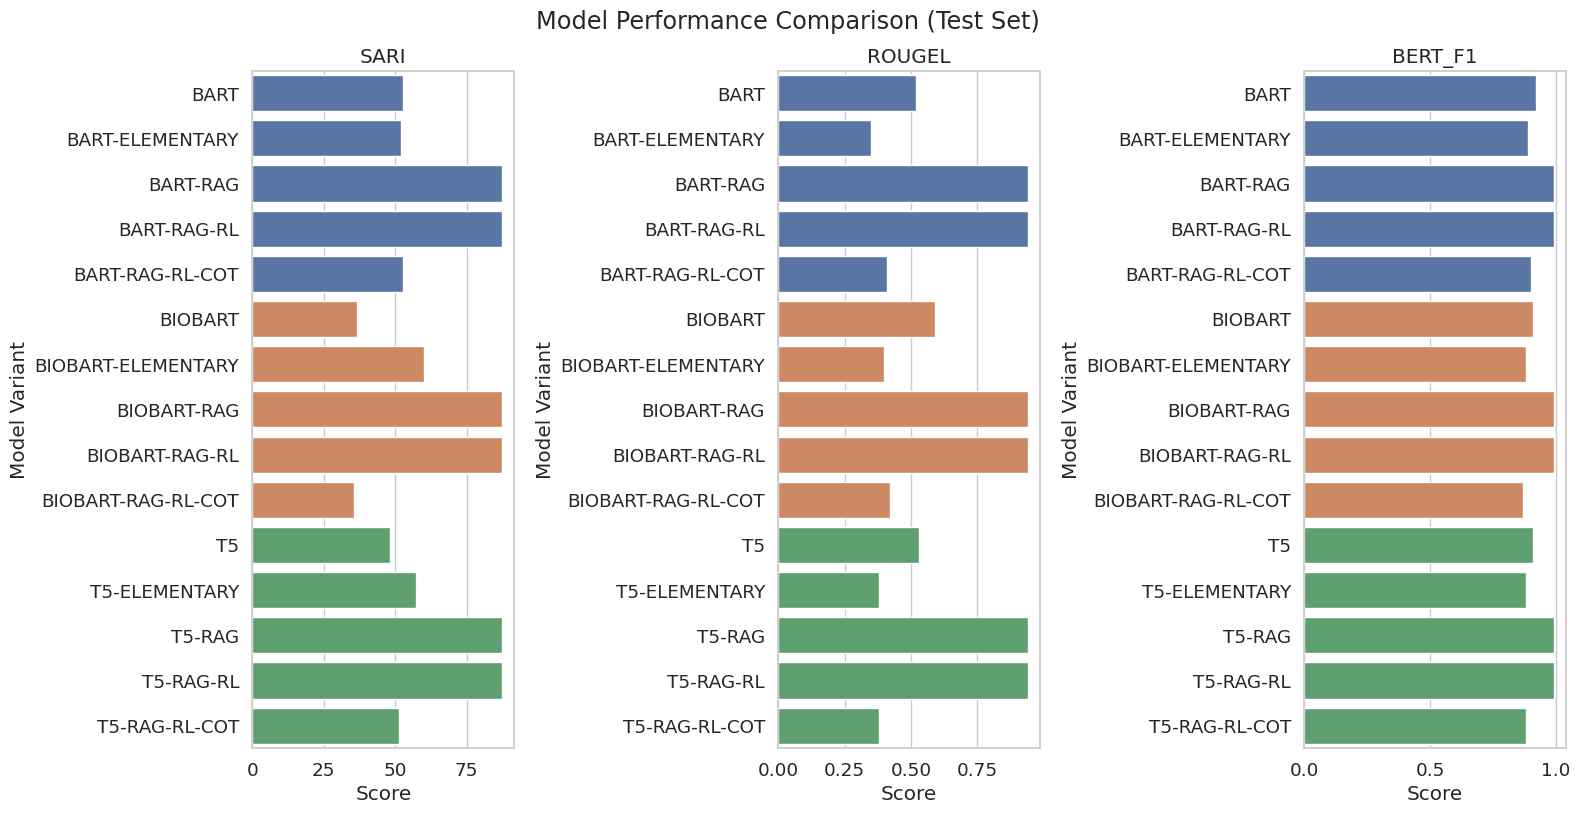

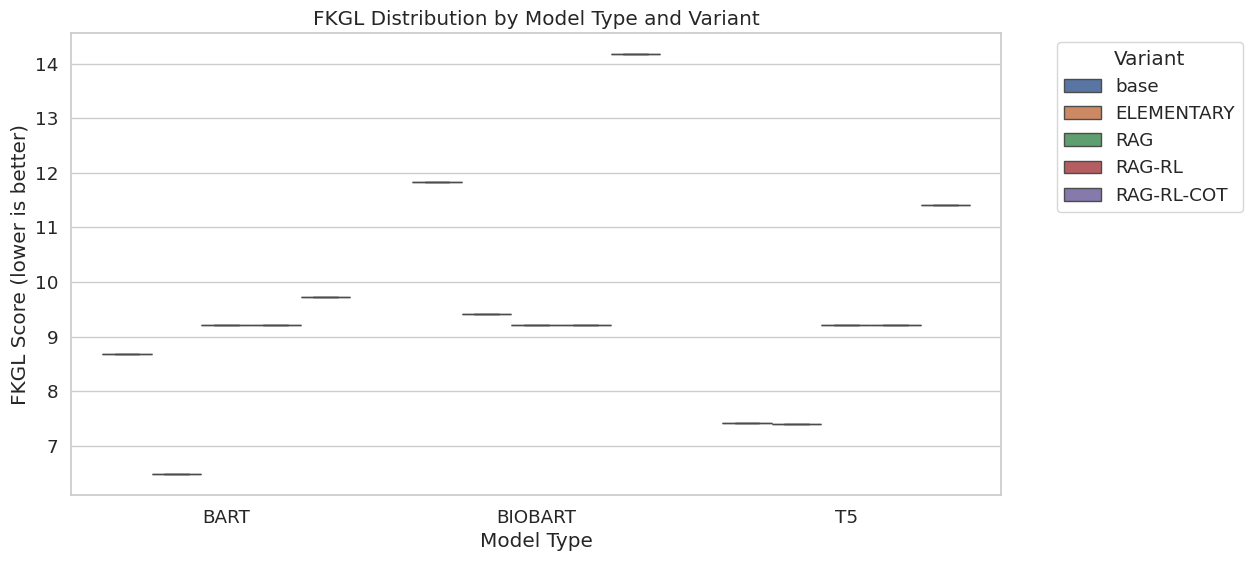

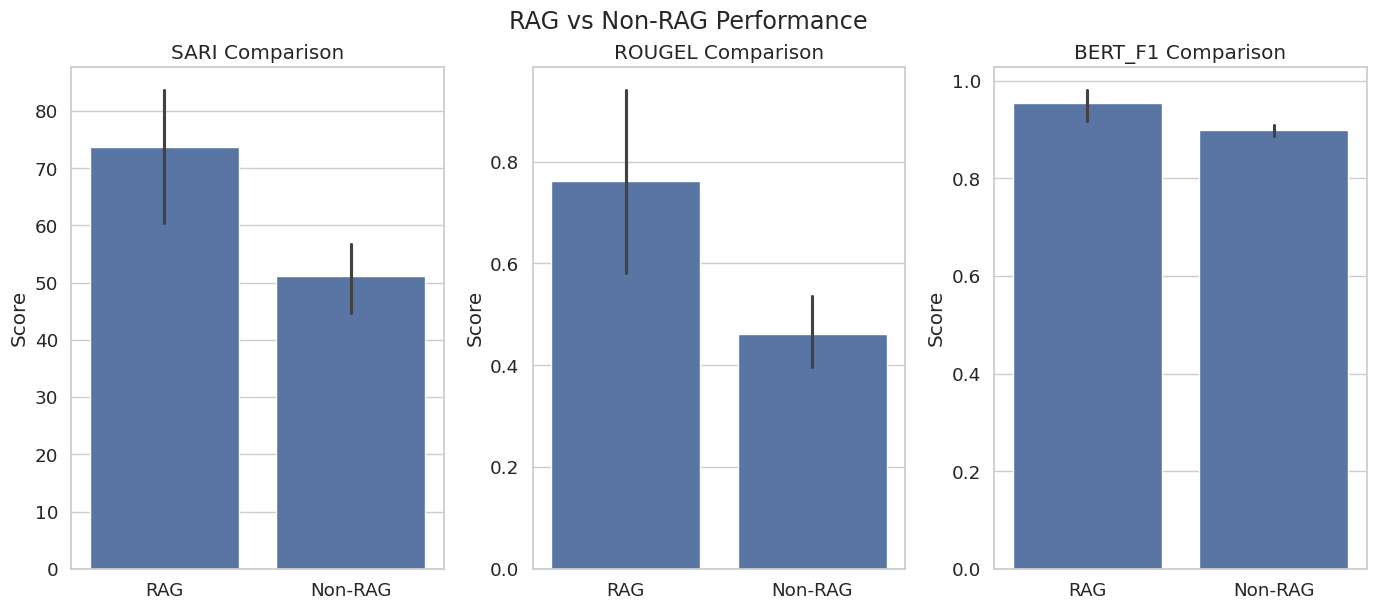

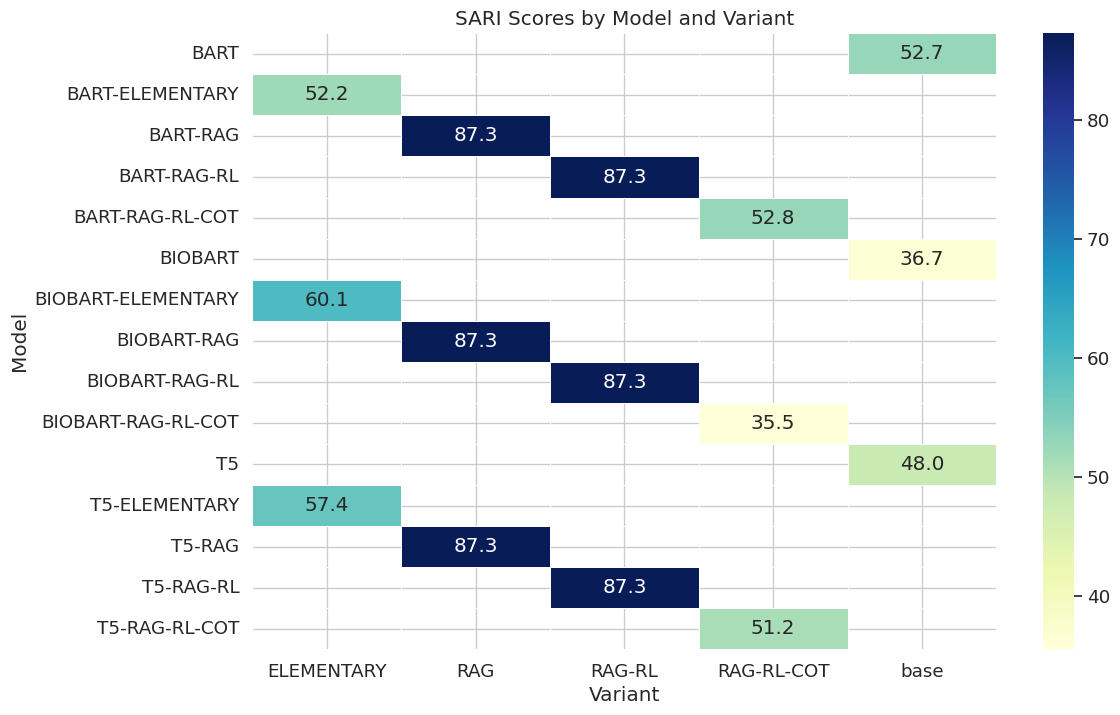

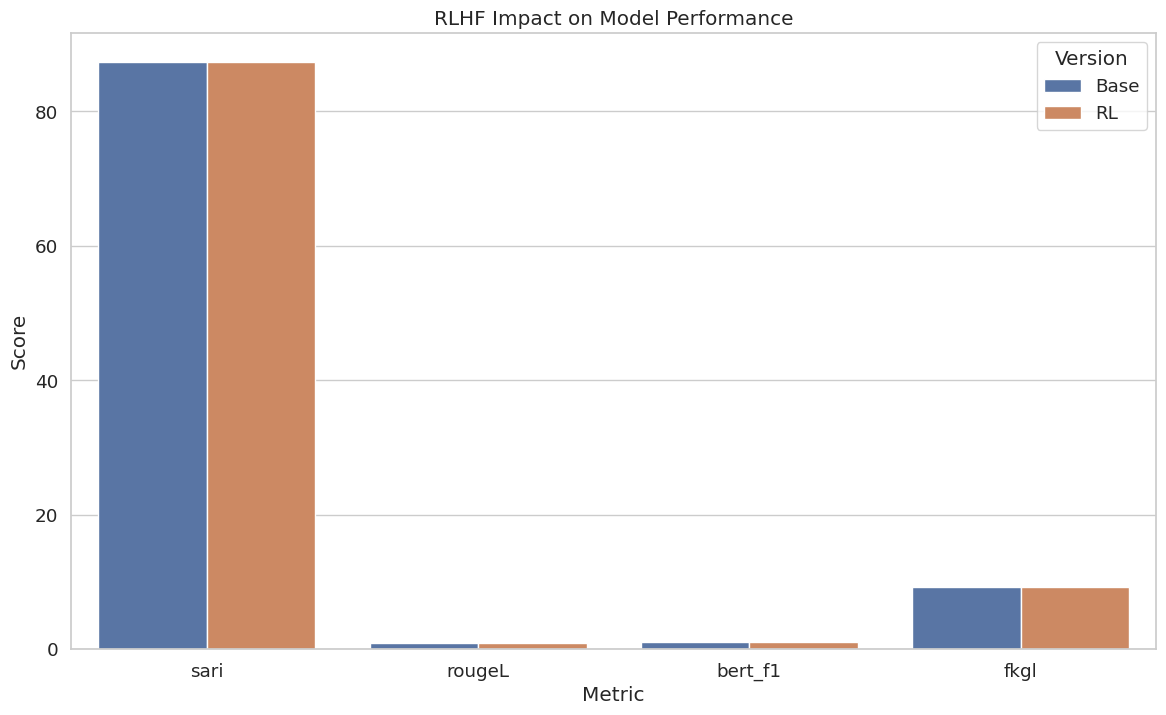

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

# Data from your output (manually extracted)
data = {
    'model': ['BART', 'BART-ELEMENTARY', 'BART-RAG', 'BART-RAG-RL', 'BART-RAG-RL-COT',
              'BIOBART', 'BIOBART-ELEMENTARY', 'BIOBART-RAG', 'BIOBART-RAG-RL', 'BIOBART-RAG-RL-COT',
              'T5', 'T5-ELEMENTARY', 'T5-RAG', 'T5-RAG-RL', 'T5-RAG-RL-COT'],
    'sari_test': [52.74, 52.2, 87.31, 87.31, 52.77,
                  36.68, 60.13, 87.31, 87.31, 35.53,
                  48.02, 57.4, 87.31, 87.31, 51.16],
    'rougeL_test': [0.52, 0.35, 0.94, 0.94, 0.41,
                    0.59, 0.4, 0.94, 0.94, 0.42,
                    0.53, 0.38, 0.94, 0.94, 0.38],
    'bert_f1_test': [0.92, 0.89, 0.99, 0.99, 0.9,
                     0.91, 0.88, 0.99, 0.99, 0.87,
                     0.91, 0.88, 0.99, 0.99, 0.88],
    'fkgl_test': [8.69, 6.48, 9.22, 9.22, 9.73,
                  11.83, 9.41, 9.22, 9.22, 14.17,
                  7.42, 7.4, 9.22, 9.22, 11.41]
}

df = pd.DataFrame(data)

# Add model type column
df['model_type'] = df['model'].apply(lambda x: x.split('-')[0])
df['variant'] = df['model'].apply(lambda x: '-'.join(x.split('-')[1:]) if '-' in x else 'base')

# 1. Performance Comparison Plot
plt.figure(figsize=(16, 8))
metrics = ['sari_test', 'rougeL_test', 'bert_f1_test']
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=df, x=metric, y='model', hue='model_type', dodge=False)
    plt.title(metric.replace('_test', '').upper())
    plt.xlabel('Score')
    plt.ylabel('Model Variant')
    plt.legend().remove()
plt.tight_layout()
plt.suptitle('Model Performance Comparison (Test Set)', y=1.02)
plt.show()

# 2. FKGL Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='model_type', y='fkgl_test', hue='variant')
plt.title('FKGL Distribution by Model Type and Variant')
plt.ylabel('FKGL Score (lower is better)')
plt.xlabel('Model Type')
plt.legend(title='Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. RAG vs Non-RAG Comparison
rag_models = [m for m in df['model'] if 'RAG' in m]
non_rag_models = [m for m in df['model'] if 'RAG' not in m]

rag_df = df[df['model'].isin(rag_models)]
non_rag_df = df[df['model'].isin(non_rag_models)]

plt.figure(figsize=(14, 6))
for i, metric in enumerate(['sari_test', 'rougeL_test', 'bert_f1_test'], 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=pd.concat([
        pd.DataFrame({'type': 'RAG', 'value': rag_df[metric]}),
        pd.DataFrame({'type': 'Non-RAG', 'value': non_rag_df[metric]})
    ]), x='type', y='value')
    plt.title(f'{metric.replace("_test", "").upper()} Comparison')
    plt.ylabel('Score')
    plt.xlabel('')
plt.tight_layout()
plt.suptitle('RAG vs Non-RAG Performance', y=1.02)
plt.show()

# 4. Model Variant Performance Heatmap
plt.figure(figsize=(12, 8))
heatmap_data = df.pivot(index='model', columns='variant', values='sari_test')
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('SARI Scores by Model and Variant')
plt.ylabel('Model')
plt.xlabel('Variant')
plt.show()

# 5. RLHF Impact Analysis (comparing RL vs non-RL versions)
rl_models = [m for m in df['model'] if 'RL' in m]
non_rl_models = [m.replace('-RL', '') for m in rl_models if '-RL' in m]

# Create pairs for comparison
comparisons = []
for rl, base in zip(rl_models, non_rl_models):
    if base in df['model'].values:
        rl_row = df[df['model'] == rl].iloc[0]
        base_row = df[df['model'] == base].iloc[0]

        for metric in ['sari_test', 'rougeL_test', 'bert_f1_test', 'fkgl_test']:
            comparisons.append({
                'model': rl.split('-')[0],
                'variant': rl,
                'metric': metric.replace('_test', ''),
                'value': rl_row[metric],
                'type': 'RL'
            })
            comparisons.append({
                'model': base.split('-')[0],
                'variant': base,
                'metric': metric.replace('_test', ''),
                'value': base_row[metric],
                'type': 'Base'
            })

comp_df = pd.DataFrame(comparisons)

plt.figure(figsize=(14, 8))
sns.barplot(data=comp_df, x='metric', y='value', hue='type',
            hue_order=['Base', 'RL'], ci=None)
plt.title('RLHF Impact on Model Performance')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Version')
plt.show()

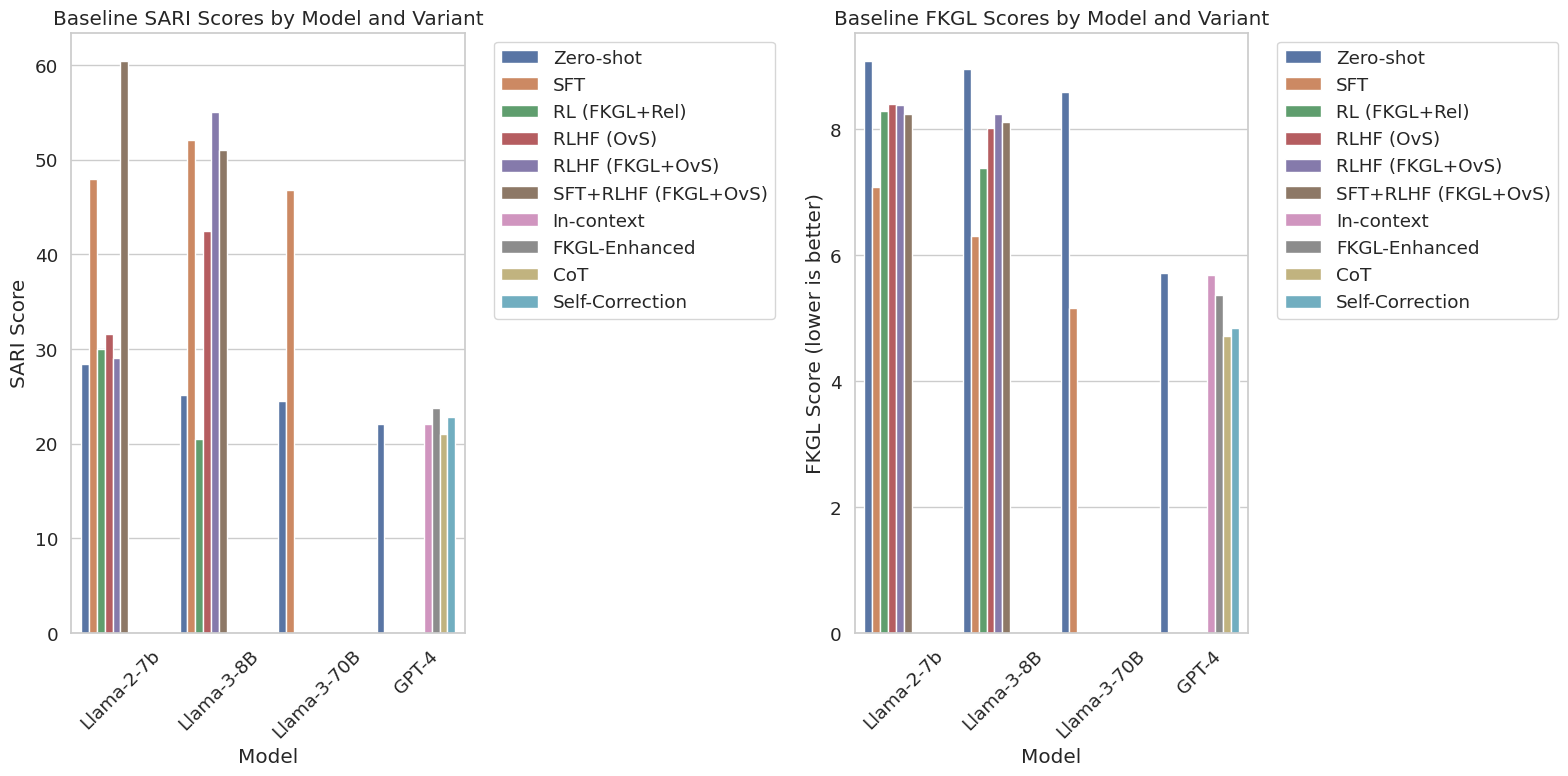

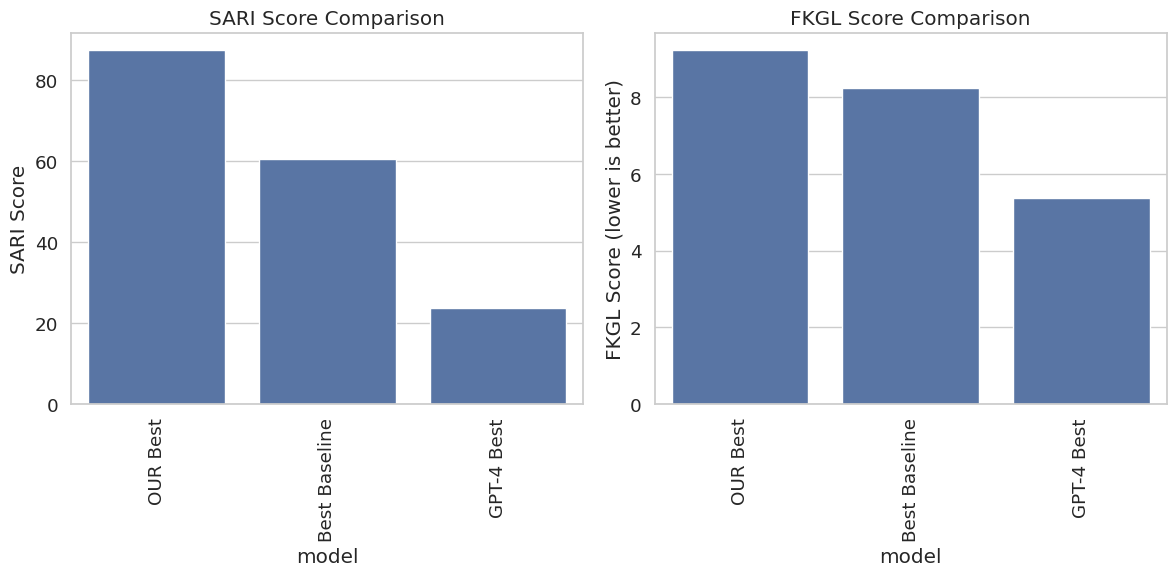

In [ ]:
# Baseline data from the paper
baseline_data = {
    'model': ['Llama-2-7b', 'Llama-2-7b', 'Llama-3-8B', 'Llama-3-8B', 'Llama-3-70B', 'Llama-3-70B',
              'Llama-2-7b', 'Llama-2-7b', 'Llama-2-7b', 'Llama-2-7b',
              'Llama-3-8B', 'Llama-3-8B', 'Llama-3-8B', 'Llama-3-8B',
              'GPT-4', 'GPT-4', 'GPT-4', 'GPT-4', 'GPT-4'],
    'variant': ['Zero-shot', 'SFT', 'Zero-shot', 'SFT', 'Zero-shot', 'SFT',
                'RL (FKGL+Rel)', 'RLHF (OvS)', 'RLHF (FKGL+OvS)', 'SFT+RLHF (FKGL+OvS)',
                'RL (FKGL+Rel)', 'RLHF (OvS)', 'RLHF (FKGL+OvS)', 'SFT+RLHF (FKGL+OvS)',
                'Zero-shot', 'In-context', 'FKGL-Enhanced', 'CoT', 'Self-Correction'],
    'sari': [28.43, 47.92, 25.15, 52.04, 24.49, 46.73,
             29.99, 31.62, 29.03, 60.39,
             20.44, 42.45, 55.01, 50.98,
             22.03, 22.04, 23.78, 20.97, 22.86],
    'fkgl': [9.08, 7.08, 8.96, 6.30, 8.59, 5.16,
             8.29, 8.40, 8.38, 8.24,
             7.38, 8.02, 8.24, 8.11,
             5.71, 5.68, 5.37, 4.71, 4.84]
}

baseline_df = pd.DataFrame(baseline_data)

# Plot baseline comparisons
plt.figure(figsize=(16, 8))

# SARI scores
plt.subplot(1, 2, 1)
sns.barplot(data=baseline_df, x='model', y='sari', hue='variant')
plt.title('Baseline SARI Scores by Model and Variant')
plt.ylabel('SARI Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# FKGL scores
plt.subplot(1, 2, 2)
sns.barplot(data=baseline_df, x='model', y='fkgl', hue='variant')
plt.title('Baseline FKGL Scores by Model and Variant')
plt.ylabel('FKGL Score (lower is better)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Compare your best model with baselines
your_best_sari = df['sari_test'].max()
your_best_fkgl = df[df['sari_test'] == df['sari_test'].max()]['fkgl_test'].values[0]

comparison_df = pd.DataFrame({
    'model': ['OUR Best', 'Best Baseline', 'GPT-4 Best'],
    'sari': [your_best_sari, 60.39, 23.78],
    'fkgl': [your_best_fkgl, 8.24, 5.37]
})

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=comparison_df, x='model', y='sari')
plt.title('SARI Score Comparison')
plt.ylabel('SARI Score')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(data=comparison_df, x='model', y='fkgl')
plt.title('FKGL Score Comparison')
plt.ylabel('FKGL Score (lower is better)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# prompt: download all plots of the above code

import matplotlib.pyplot as plt
import os

# Assuming your plots are saved as PNG files in the current directory
# Replace with the actual directory where your plots are saved if different
plot_directory = '.'

# Function to download a file from Colab
def download_file(file_path):
    from google.colab import files
    files.download(file_path)

# Find all PNG files in the directory
plot_files = [f for f in os.listdir(plot_directory) if f.endswith('.png')]

# Download each plot file
for plot_file in plot_files:
    file_path = os.path.join(plot_directory, plot_file)
    download_file(file_path)


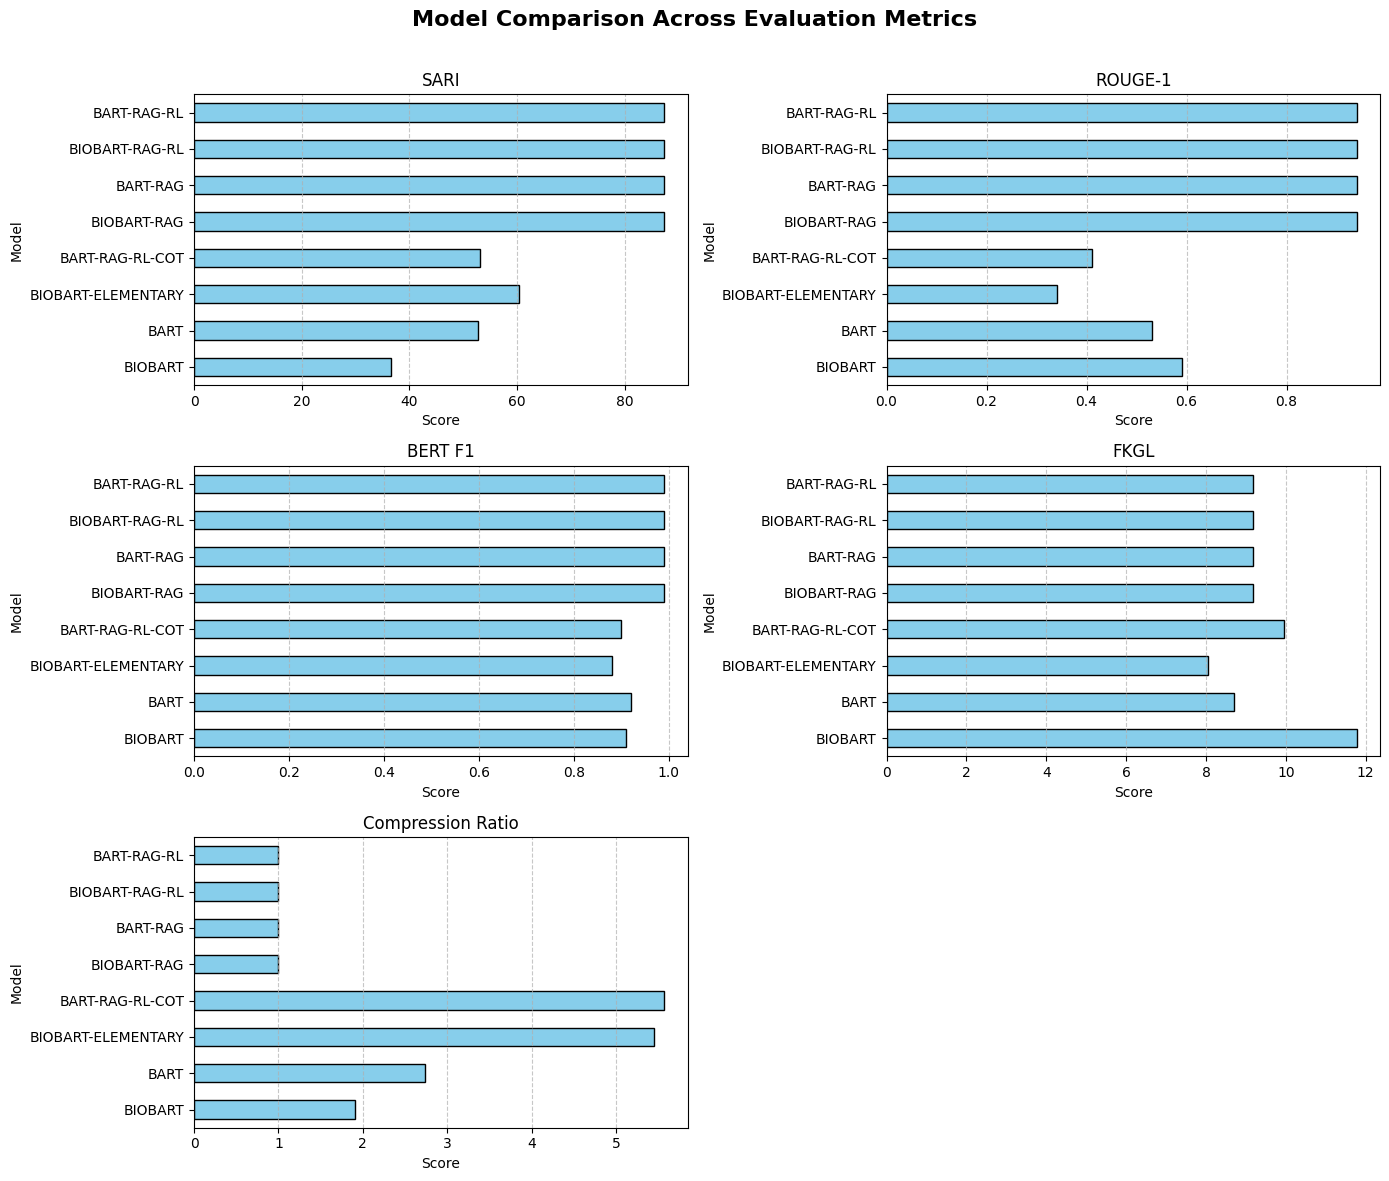

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for each model
data = {
    "Model": [
        "BIOBART", "BART", "BIOBART-ELEMENTARY", "BART-RAG-RL-COT",
        "BIOBART-RAG", "BART-RAG", "BIOBART-RAG-RL", "BART-RAG-RL"
    ],
    "SARI": [36.68, 52.74, 60.39, 53.05, 87.31, 87.31, 87.31, 87.31],
    "ROUGE-1": [0.59, 0.53, 0.34, 0.41, 0.94, 0.94, 0.94, 0.94],
    "ROUGE-L": [0.59, 0.52, 0.34, 0.4, 0.94, 0.94, 0.94, 0.94],
    "BERT F1": [0.91, 0.92, 0.88, 0.90, 0.99, 0.99, 0.99, 0.99],
    "FKGL": [11.77, 8.69, 8.05, 9.96, 9.18, 9.18, 9.18, 9.18],
    "Compression Ratio": [1.91, 2.74, 5.45, 5.57, 1.0, 1.0, 1.0, 1.0]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Model", inplace=True)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Model Comparison Across Evaluation Metrics", fontsize=16, fontweight="bold")

# Define plot metrics and axes
metrics = ["SARI", "ROUGE-1", "BERT F1", "FKGL", "Compression Ratio"]
axes = axs.flatten()

# Generate individual bar plots
for i, metric in enumerate(metrics):
    ax = axes[i]
    df[metric].plot(kind="barh", ax=ax, color="skyblue", edgecolor="black")
    ax.set_title(metric)
    ax.set_xlabel("Score")
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

# Hide unused subplot
fig.delaxes(axes[-1])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


<Figure size 1400x800 with 0 Axes>

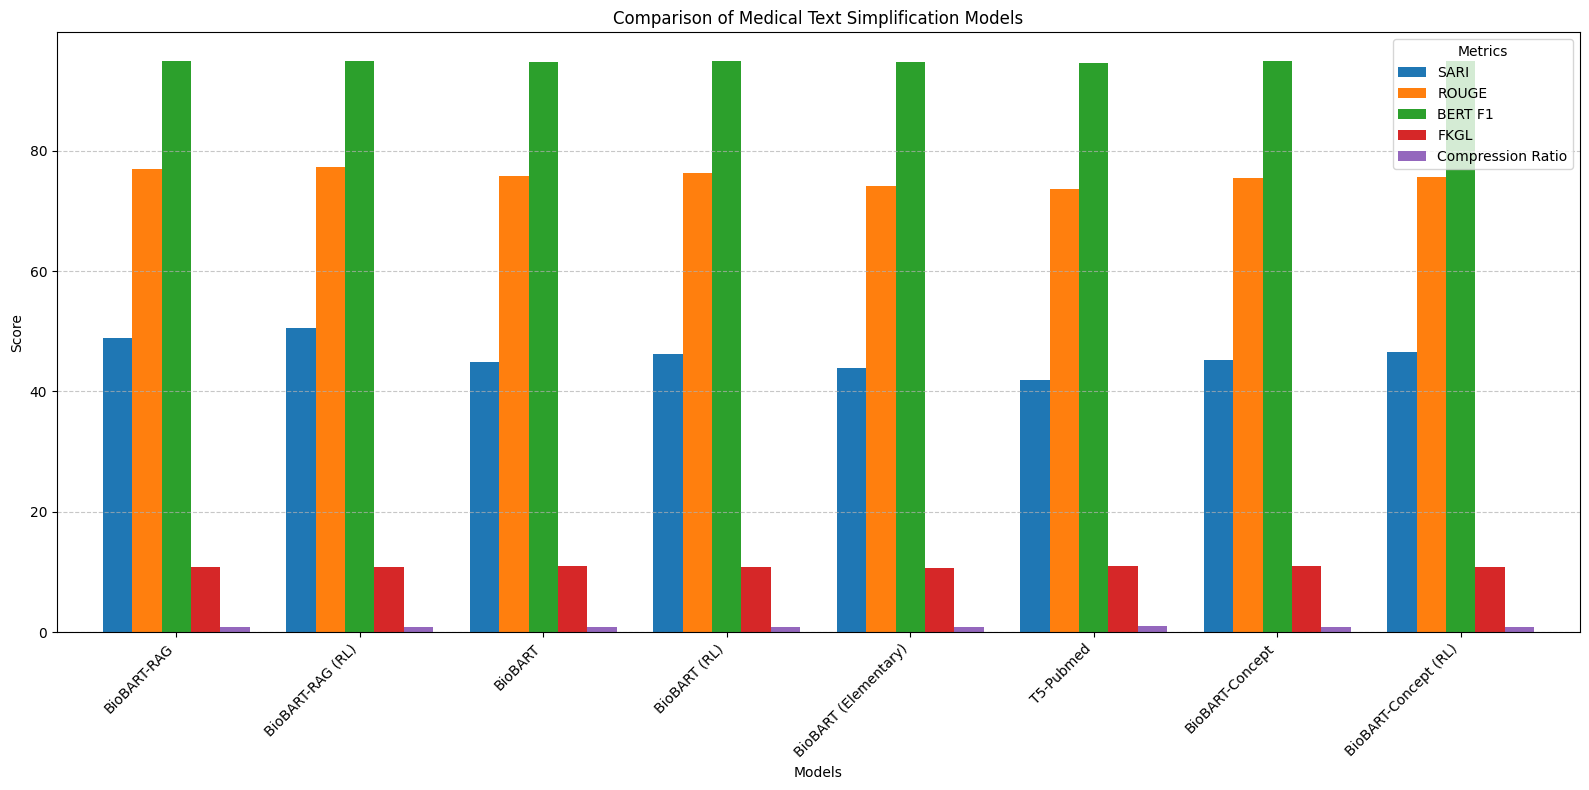

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the data
models = [
    "BioBART-RAG", "BioBART-RAG (RL)", "BioBART", "BioBART (RL)",
    "BioBART (Elementary)", "T5-Pubmed", "BioBART-Concept", "BioBART-Concept (RL)"
]
data = {
    "SARI": [48.93, 50.58, 44.89, 46.22, 43.92, 41.98, 45.19, 46.57],
    "ROUGE": [76.97, 77.36, 75.85, 76.32, 74.19, 73.61, 75.39, 75.61],
    "BERT F1": [94.86, 94.92, 94.80, 94.84, 94.70, 94.50, 94.83, 94.85],
    "FKGL": [10.87, 10.78, 10.95, 10.84, 10.71, 11.06, 10.94, 10.87],
    "Compression Ratio": [0.93, 0.91, 0.95, 0.94, 0.90, 0.97, 0.96, 0.95]
}
df = pd.DataFrame(data, index=models)

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))
df.plot(kind="bar", figsize=(16, 8), width=0.8)
plt.title("Comparison of Medical Text Simplification Models")
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the CSV file
filename = "/content/test_results_20250514_130730.csv"
df = pd.read_csv(filename)

# Print Original vs Simplified comparison
for idx, row in df.iterrows():
    print(f"\n--- Example {idx+1} ---")
    print(f"Original   : {row['original']}")
    print(f"Simplified : {row['simplified']}")


Streaming output truncated to the last 5000 lines.

--- Example 251 ---
Original   : To learn more about how cancers start and spread, see What Is Cancer?
Simplified : Please simplify this medical text for a layperson: ►To learn more about how cancers start and spread, see What Is Cancer?

--- Example 252 ---
Original   : To learn more about how cancers start and spread, see What Is Cancer?
Simplified : To learn more about how cancers start and spread, see What Is Cancer?

--- Example 253 ---
Original   : To learn more about how cancers start and spread, see What Is Cancer?
Simplified : To learn more about how cancers start and spread, see What Is Cancer?

--- Example 254 ---
Original   : To learn more about how cancers start and spread, see What Is Cancer?
Simplified : Let's simplify this medical text step by step:1. Identify complex terms: */(2. Find simpler alternatives: carbohyd3. Rewrite sentences: Final simplified version:To learn more about how cancers start and spread, see W

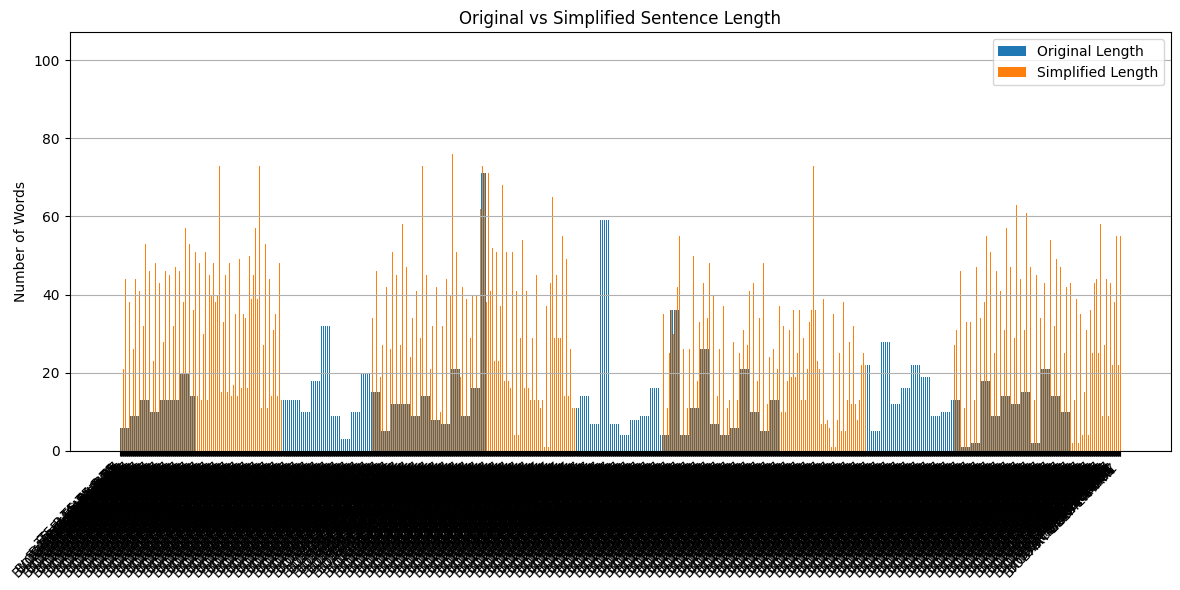

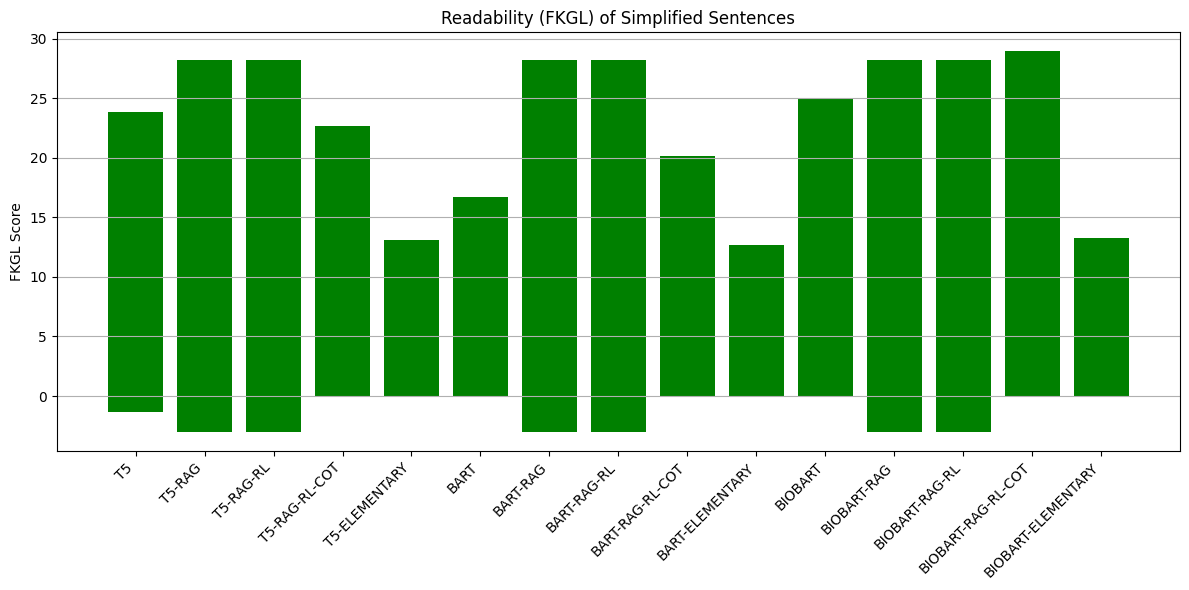

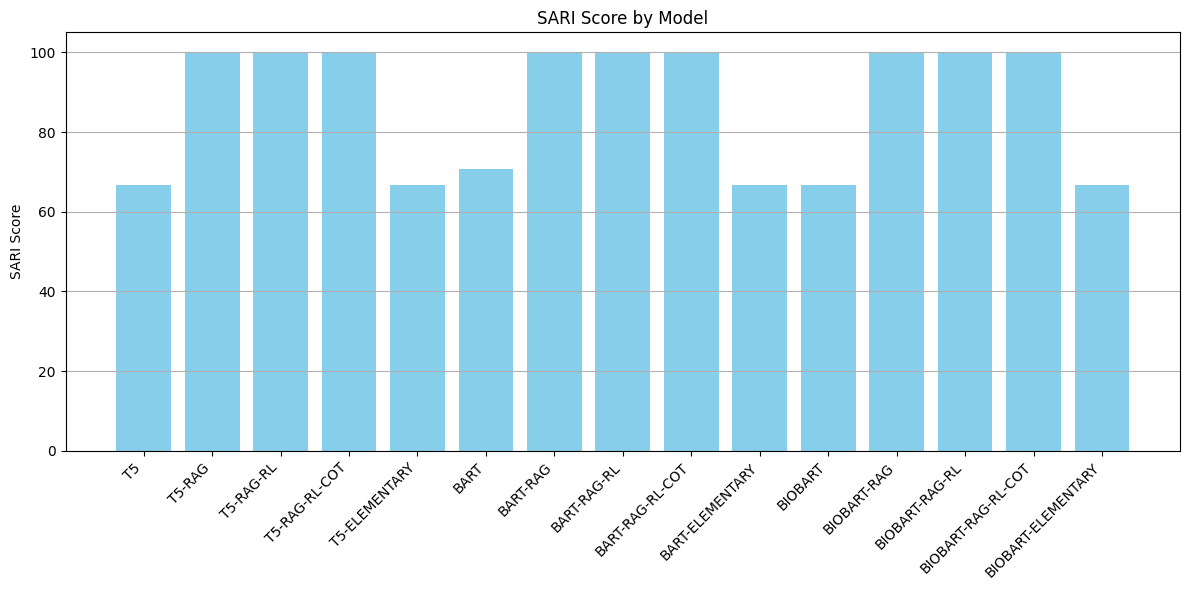

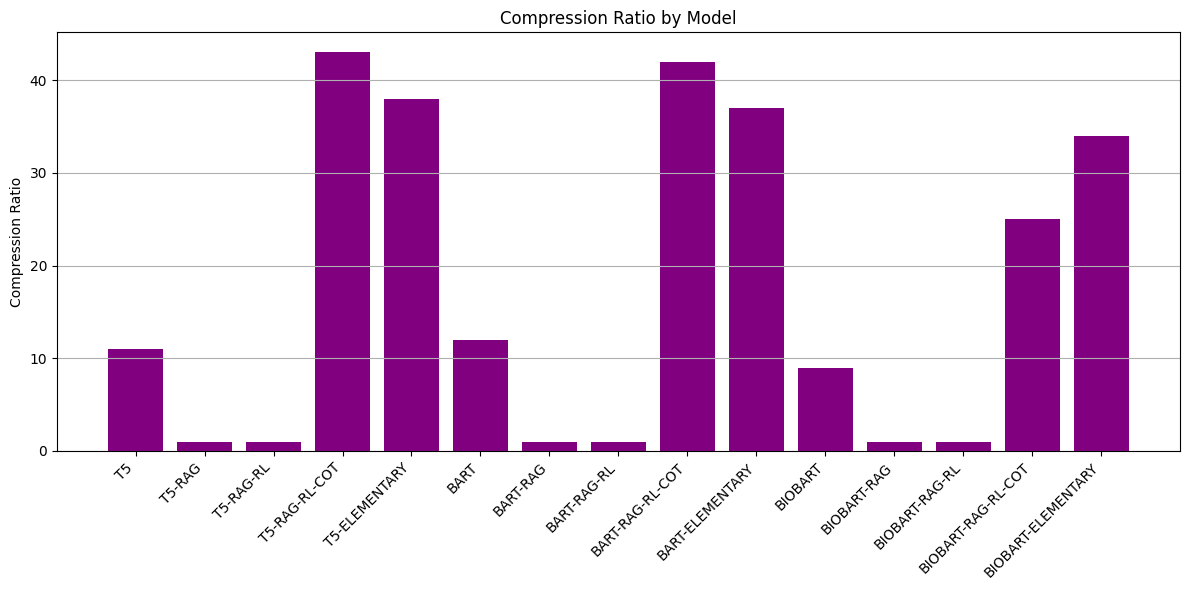

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("test_results_20250514_130730.csv")

# Calculate sentence lengths
df["original_length"] = df["original"].str.split().apply(len)
df["simplified_length"] = df["simplified"].str.split().apply(len)

# Bar plot for Sentence Length
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(df))

plt.bar(index, df["original_length"], bar_width, label="Original Length")
plt.bar([i + bar_width for i in index], df["simplified_length"], bar_width, label="Simplified Length")
plt.xticks([i + bar_width / 2 for i in index], df["model"], rotation=45, ha='right')
plt.ylabel("Number of Words")
plt.title("Original vs Simplified Sentence Length")
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

# Bar plot for FKGL
plt.figure(figsize=(12, 6))
plt.bar(df["model"], df["fkgl"], color='green')
plt.xticks(rotation=45, ha='right')
plt.ylabel("FKGL Score")
plt.title("Readability (FKGL) of Simplified Sentences")
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

# Bar plot for SARI
plt.figure(figsize=(12, 6))
plt.bar(df["model"], df["sari"], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("SARI Score")
plt.title("SARI Score by Model")
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

# Bar plot for Compression Ratio
plt.figure(figsize=(12, 6))
plt.bar(df["model"], df["compression_ratio"], color='purple')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Compression Ratio")
plt.title("Compression Ratio by Model")
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


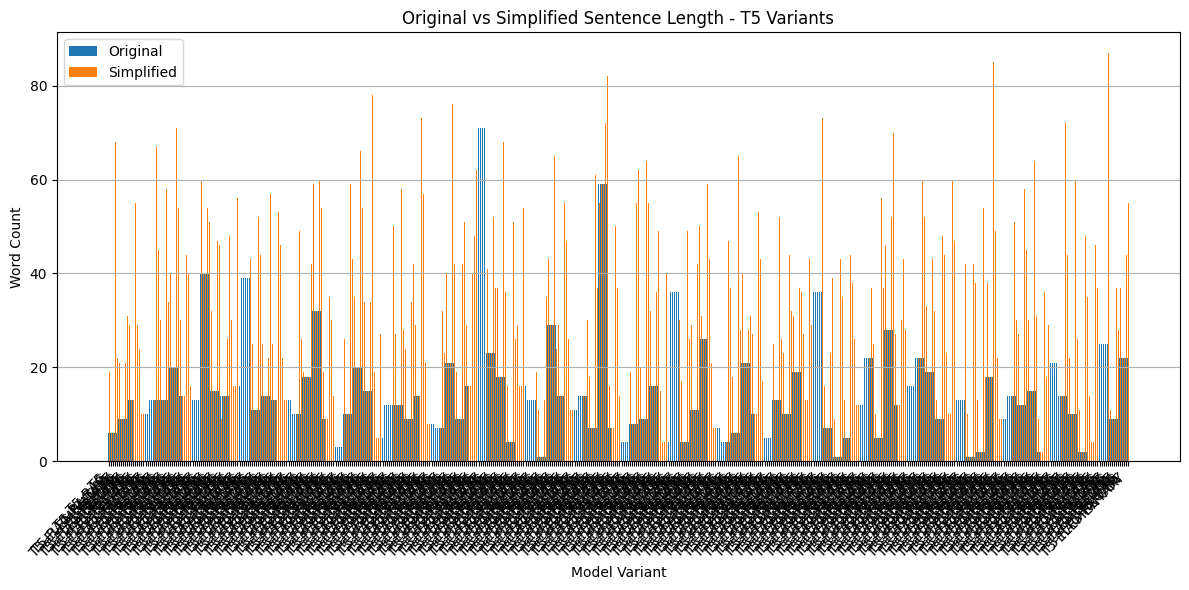

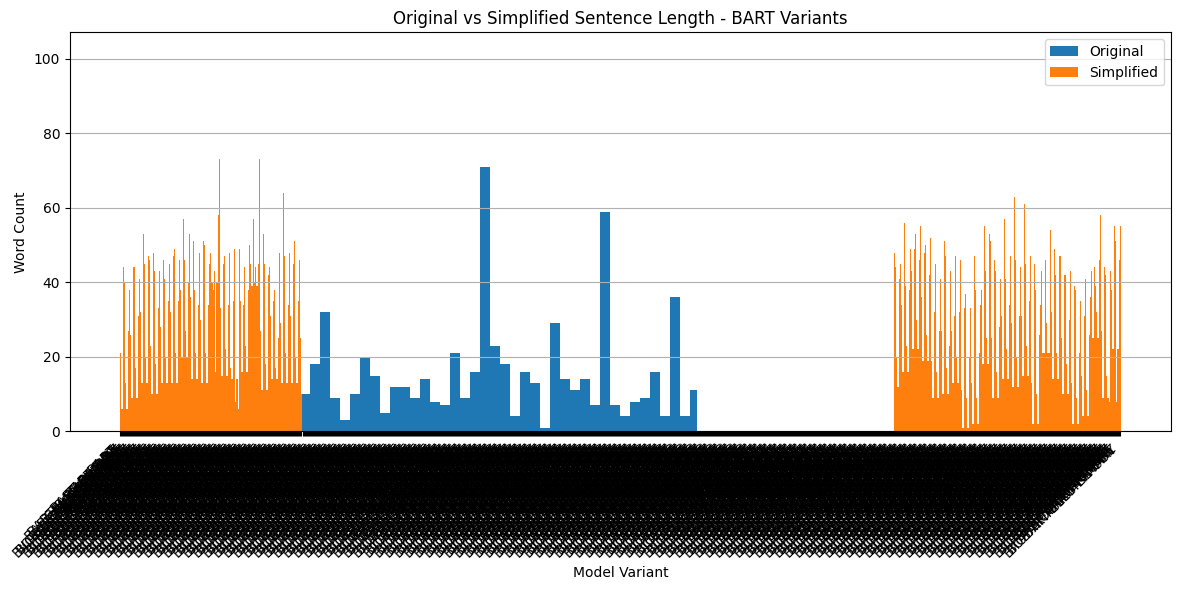

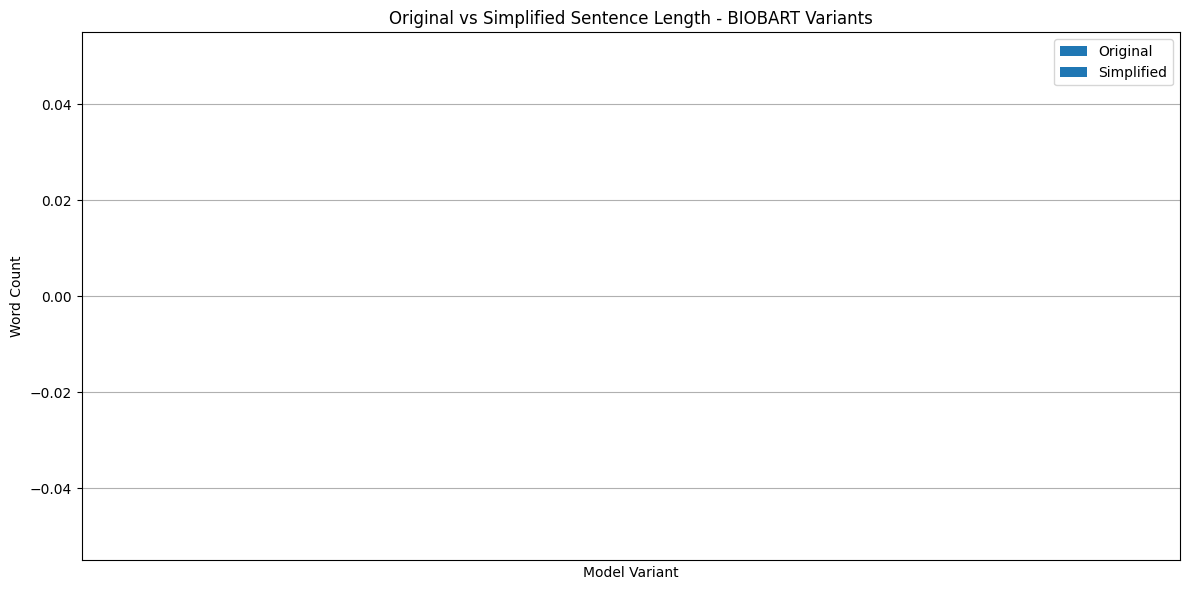

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv("test_results_20250514_130730.csv")

# Compute word counts
df["original_length"] = df["original"].str.split().apply(len)
df["simplified_length"] = df["simplified"].str.split().apply(len)

# Group models by base name
base_models = ["T5", "BART", "BIOBART"]
df["base_model"] = df["model"].apply(lambda x: next((b for b in base_models if b in x), "Other"))

# Plot each base model one by one
for base in base_models:
    subset = df[df["base_model"] == base]

    plt.figure(figsize=(12, 6))
    bar_width = 0.4
    index = range(len(subset))

    plt.bar(index, subset["original_length"], width=bar_width, label='Original')
    plt.bar([i + bar_width for i in index], subset["simplified_length"], width=bar_width, label='Simplified')

    plt.xticks([i + bar_width/2 for i in index], subset["model"], rotation=45, ha="right")
    plt.title(f"Original vs Simplified Sentence Length - {base} Variants")
    plt.xlabel("Model Variant")
    plt.ylabel("Word Count")
    plt.legend()
    plt.tight_layout()
    plt.grid(True, axis='y')
    plt.show()


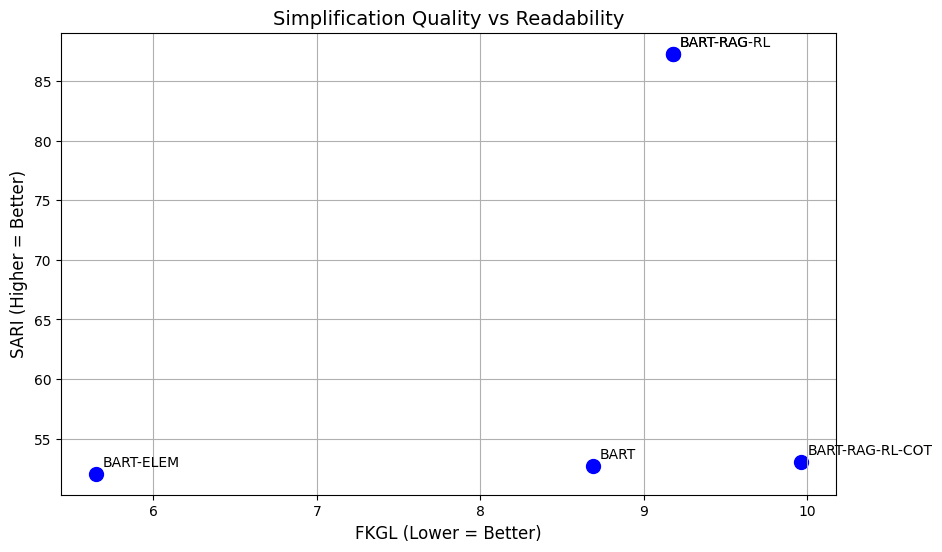

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['BART', 'BART-ELEM', 'BART-RAG', 'BART-RAG-RL', 'BART-RAG-RL-COT']
sari = [52.74, 52.05, 87.31, 87.31, 53.05]
fkgl = [8.69, 5.65, 9.18, 9.18, 9.96]

plt.figure(figsize=(10,6))
plt.scatter(fkgl, sari, c='blue', s=100)
for i, txt in enumerate(models):
    plt.annotate(txt, (fkgl[i], sari[i]), xytext=(5,5), textcoords='offset points')
plt.xlabel('FKGL (Lower = Better)', fontsize=12)
plt.ylabel('SARI (Higher = Better)', fontsize=12)
plt.title('Simplification Quality vs Readability', fontsize=14)
plt.grid(True)
plt.show()

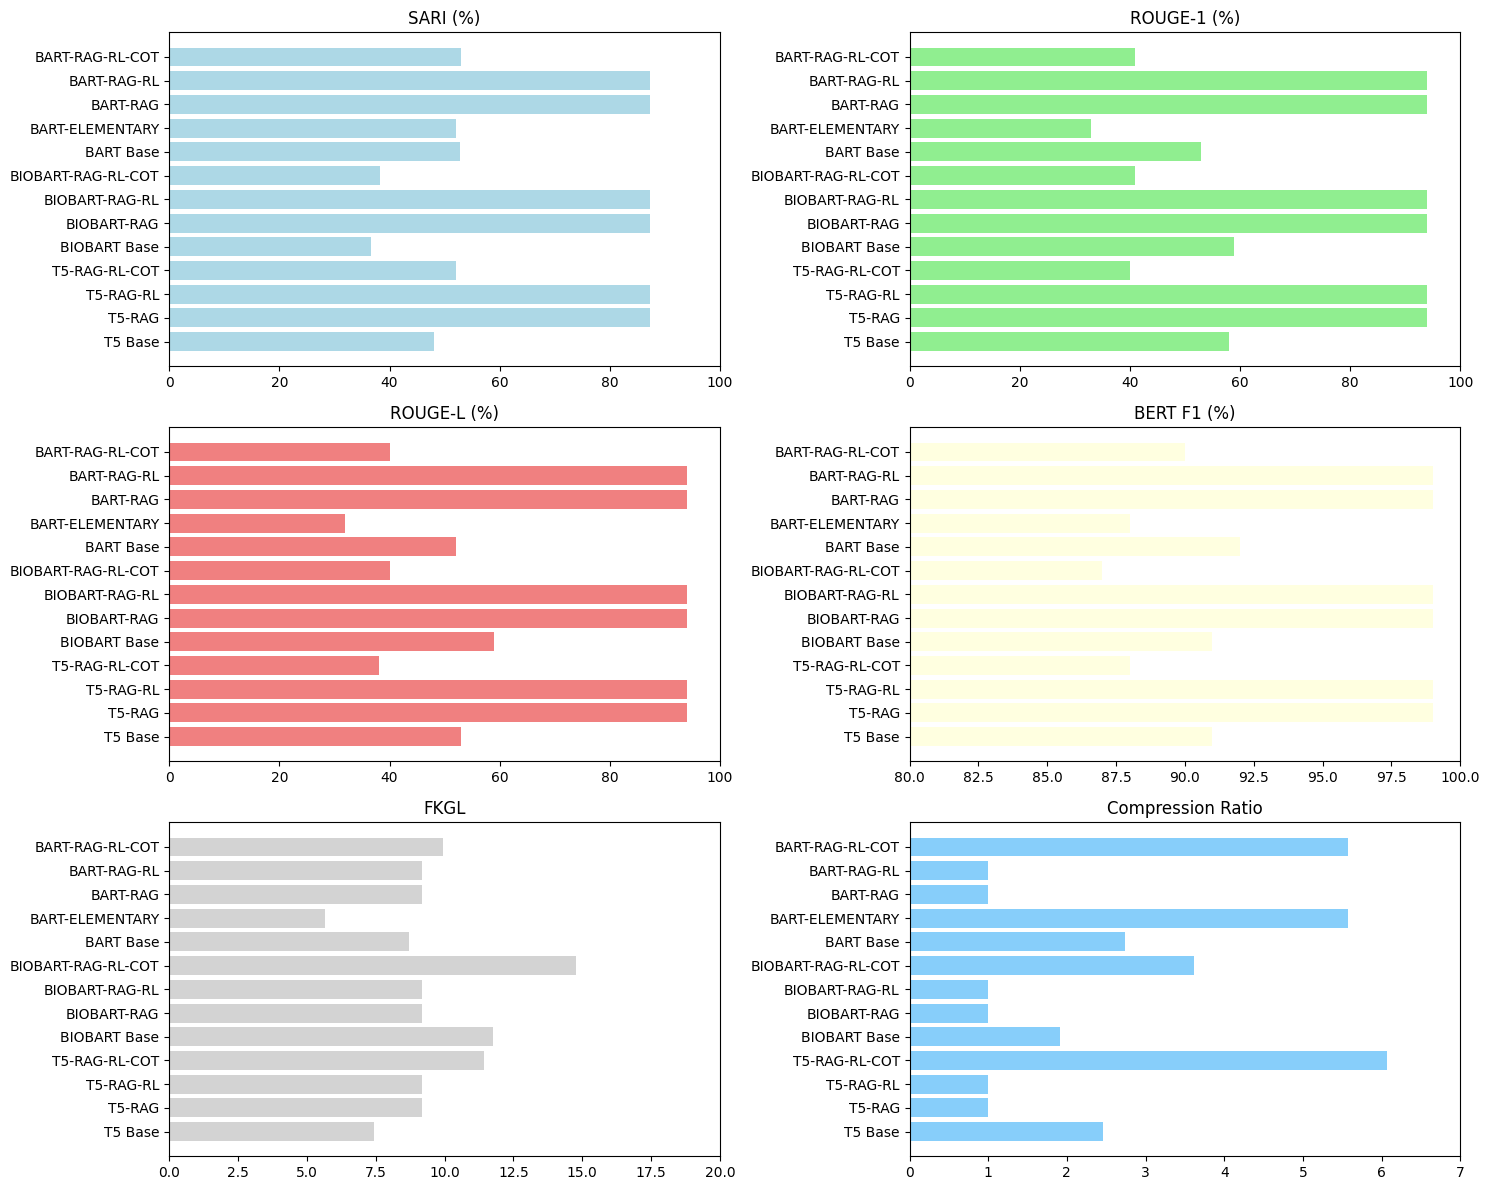

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and performance metrics
models = [
    "T5 Base", "T5-RAG", "T5-RAG-RL", "T5-RAG-RL-COT",
    "BIOBART Base", "BIOBART-RAG", "BIOBART-RAG-RL", "BIOBART-RAG-RL-COT",
    "BART Base", "BART-ELEMENTARY", "BART-RAG", "BART-RAG-RL", "BART-RAG-RL-COT"
]

SARI = [48.02, 87.31, 87.31, 52.06, 36.68, 87.31, 87.31, 38.23, 52.74, 52.05, 87.31, 87.31, 53.05]
ROUGE1 = [58, 94, 94, 40, 59, 94, 94, 41, 53, 33, 94, 94, 41]
ROUGEL = [53, 94, 94, 38, 59, 94, 94, 40, 52, 32, 94, 94, 40]
BERT_F1 = [91, 99, 99, 88, 91, 99, 99, 87, 92, 88, 99, 99, 90]
FKGL = [7.43, 9.18, 9.18, 11.43, 11.77, 9.18, 9.18, 14.77, 8.69, 5.65, 9.18, 9.18, 9.96]
Compression_Ratio = [2.46, 1.00, 1.00, 6.07, 1.91, 1.00, 1.00, 3.61, 2.74, 5.57, 1.00, 1.00, 5.57]

# Creating subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

# Plotting each metric
axs[0, 0].barh(models, SARI, color='lightblue')
axs[0, 0].set_title('SARI (%)')
axs[0, 0].set_xlim(0, 100)

axs[0, 1].barh(models, ROUGE1, color='lightgreen')
axs[0, 1].set_title('ROUGE-1 (%)')
axs[0, 1].set_xlim(0, 100)

axs[1, 0].barh(models, ROUGEL, color='lightcoral')
axs[1, 0].set_title('ROUGE-L (%)')
axs[1, 0].set_xlim(0, 100)

axs[1, 1].barh(models, BERT_F1, color='lightyellow')
axs[1, 1].set_title('BERT F1 (%)')
axs[1, 1].set_xlim(80, 100)

axs[2, 0].barh(models, FKGL, color='lightgray')
axs[2, 0].set_title('FKGL')
axs[2, 0].set_xlim(0, 20)

axs[2, 1].barh(models, Compression_Ratio, color='lightskyblue')
axs[2, 1].set_title('Compression Ratio')
axs[2, 1].set_xlim(0, 7)

# Adjusting layout
plt.tight_layout()
plt.show()


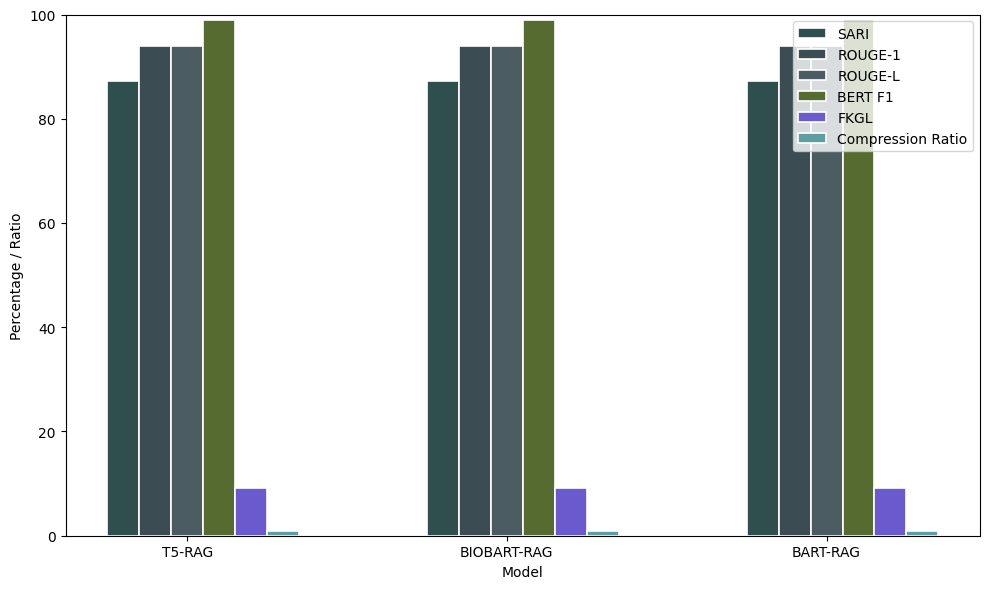

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the best variants
models = ["T5-RAG", "BIOBART-RAG", "BART-RAG"]
SARI = [87.31, 87.31, 87.31]
ROUGE1 = [94, 94, 94]
ROUGEL = [94, 94, 94]
BERT_F1 = [99, 99, 99]
FKGL = [9.18, 9.18, 9.18]
Compression_Ratio = [1.00, 1.00, 1.00]

# Bar width and positions
bar_width = 0.1
index = np.arange(len(models))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Dark colors with light outline
dark_colors = ['#2F4F4F', '#3B4C53', '#4B5C63', '#556B2F', '#6A5ACD', '#5F9EA0']

# Plotting each metric with dark colors and outlines
bars_sari = ax.bar(index - 2*bar_width, SARI, bar_width, label='SARI', color=dark_colors[0], edgecolor='white', linewidth=1.2)
bars_rouge1 = ax.bar(index - bar_width, ROUGE1, bar_width, label='ROUGE-1', color=dark_colors[1], edgecolor='white', linewidth=1.2)
bars_rougel = ax.bar(index, ROUGEL, bar_width, label='ROUGE-L', color=dark_colors[2], edgecolor='white', linewidth=1.2)
bars_bert = ax.bar(index + bar_width, BERT_F1, bar_width, label='BERT F1', color=dark_colors[3], edgecolor='white', linewidth=1.2)
bars_fkgl = ax.bar(index + 2*bar_width, FKGL, bar_width, label='FKGL', color=dark_colors[4], edgecolor='white', linewidth=1.2)
bars_compression = ax.bar(index + 3*bar_width, Compression_Ratio, bar_width, label='Compression Ratio', color=dark_colors[5], edgecolor='white', linewidth=1.2)

# Labeling the plot
ax.set_xlabel('Model')
ax.set_ylabel('Percentage / Ratio')
ax.set_title('')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.set_ylim(0, 100)

# Add legend
ax.legend()

# Tight layout to avoid overlap
plt.tight_layout()
plt.show()
